In [14]:
# Display column headings
print("Column Headings:")
print(df.columns.tolist())
print("\n")  # Add a blank line



Column Headings:
['Molecular Weight', 'XLogP3-AA', 'Hydrogen Bond Donor Count', 'Hydrogen Bond Acceptor Count', 'Rotational bond count', 'Topological surface area', 'Heavy atom count', 'Complexity', 'LogS', 'DOSE', 'Weight(mg)', 'Bulk Density', 'Tapped Density', 'Carrs Compressibility Index', 'Hausner Ratio', 'Angle of Repose', 'Thickness', 'Wetting time', 'Microcrystalline Cellulose', 'Mannitol', 'Magnesium Stearate', 'Talc', 'Sodium croscarmellose', 'Aspartame', 'Hydroxypropyl Cellulose (HPC)', 'Gum', 'Chitosan', 'Sodium saccharin', 'Sodium lauryl sulfate(SLS)', 'Sodium stearyl fumarate ', 'Polyvinylpyrrolidone (Crospovidone)', 'Sodium starch glycolate', 'polyvinyl acetate', 'Lactose', 'Colloidal silicon dioxide (Aerosil)', 'Citric acid', 'Menthol', 'B-cyclodextrin', 'Stevia leaf Powder ', 'Clove oil ', 'Starch', 'sodium bicarbonate (NaHCO3)', 'Plantago ovata', 'Pharmaburst', 'parteck', 'Polyethylene Glycol', 'Eudragit EPO', 'Precirol', 'acesulfame potassium', 'Polacrilin Potassium',

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("ML Class/drug_disintegration_ml/data/raw/final_data_all_excipients.csv")

# Define features and target
X = df.drop(columns=['DISINTEGRATION_TIME'])
y = df['DISINTEGRATION_TIME']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


FileNotFoundError: [Errno 2] No such file or directory: 'ML Class/drug_disintegration_ml/data/raw/final_data_all_excipients.csv'

Model with All Features - RMSE: 25.130240122594483, R²: 0.6530697625117727
Model with Selected Features - RMSE: 25.200206135942896, R²: 0.6511352711872335


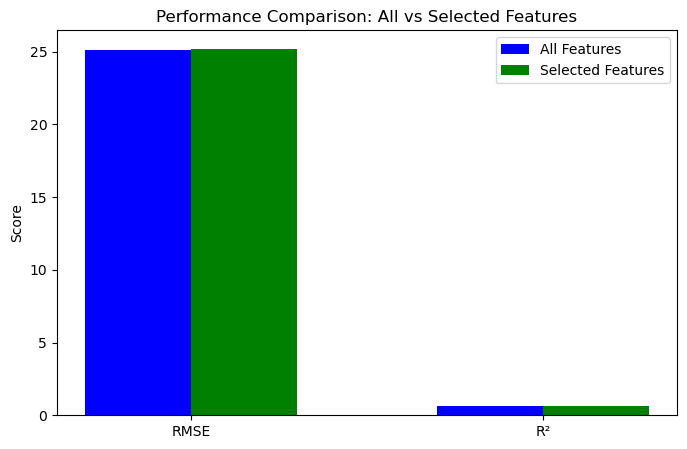

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df.drop(columns=['DISINTEGRATION_TIME'])
y = df['DISINTEGRATION_TIME']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest on all features
rf_all = RandomForestRegressor(n_estimators=100, random_state=42)
rf_all.fit(X_train, y_train)
y_pred_all = rf_all.predict(X_test)

# Feature Selection (Importance > 0.005)
feature_importance = rf_all.feature_importances_
important_features = X.columns[feature_importance > 0.001]
X_selected = X[important_features]

# Train-Test Split with Selected Features
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train Random Forest on Selected Features
rf_selected = RandomForestRegressor(n_estimators=100, random_state=42)
rf_selected.fit(X_train_sel, y_train_sel)
y_pred_sel = rf_selected.predict(X_test_sel)

# Compute Performance Metrics
rmse_all = np.sqrt(mean_squared_error(y_test, y_pred_all))
r2_all = r2_score(y_test, y_pred_all)

rmse_sel = np.sqrt(mean_squared_error(y_test_sel, y_pred_sel))
r2_sel = r2_score(y_test_sel, y_pred_sel)

# Print Metrics
print(f"Model with All Features - RMSE: {rmse_all}, R²: {r2_all}")
print(f"Model with Selected Features - RMSE: {rmse_sel}, R²: {r2_sel}")

# Plot Performance Metrics
metrics = ['RMSE', 'R²']
values_all = [rmse_all, r2_all]
values_sel = [rmse_sel, r2_sel]

plt.figure(figsize=(8, 5))
x = np.arange(len(metrics))
width = 0.3

plt.bar(x - width/2, values_all, width, label='All Features', color='blue')
plt.bar(x + width/2, values_sel, width, label='Selected Features', color='green')

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Performance Comparison: All vs Selected Features")
plt.legend()
plt.show()


LightGBM - RMSE: 23.9844, R²: 0.6840
XGBoost - RMSE: 25.1163, R²: 0.6535
Random Forest - RMSE: 26.6606, R²: 0.6095
Stacking (Avg) - RMSE: 24.3822, R²: 0.6734


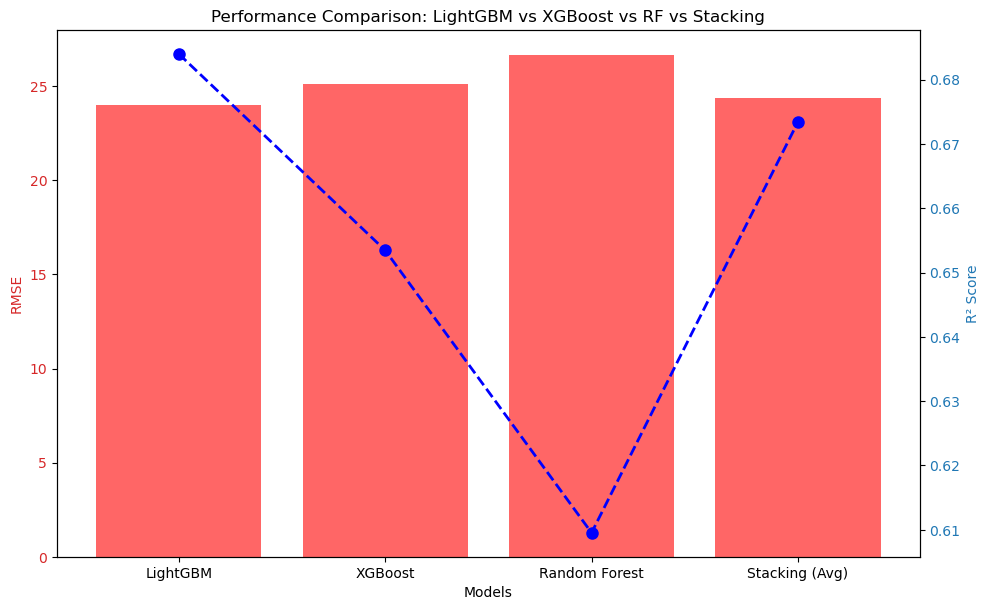

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import lightgbm as lgb

# Load dataset
df = pd.read_csv("final Data All Exipients.csv")  
df.columns = df.columns.str.replace(' ', '_')  # Clean column names

# Define features and target
X = df.drop(columns=['DISINTEGRATION_TIME'])
y = df['DISINTEGRATION_TIME']

# Check dataset validity
if X.shape[0] == 0 or y.shape[0] == 0:
    raise ValueError("Dataset is empty. Check data preprocessing.")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ====== LightGBM Model (Manually Tuned) ======
lgbm_model = lgb.LGBMRegressor(
    n_estimators=300, 
    learning_rate=0.05, 
    max_depth=7, 
    num_leaves=50,
    colsample_bytree=0.8,
    subsample=0.8,
    reg_alpha=0.1, 
    reg_lambda=0.1,
    random_state=42, 
    n_jobs=-1,
    verbose=-1
)

lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

# ====== Feature Selection Using LightGBM Importance ======
feature_importances = pd.Series(lgbm_model.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(15).index  # Select top 15 features

X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# ====== Train XGBoost (Manually Tuned) ======
xgb_model = XGBRegressor(
    n_estimators=300, 
    learning_rate=0.05, 
    max_depth=6, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    reg_alpha=0.1, 
    reg_lambda=0.1, 
    random_state=42, 
    n_jobs=-1
)

xgb_model.fit(X_train_selected, y_train)
y_pred_xgb = xgb_model.predict(X_test_selected)

# ====== Train Random Forest ======
rf_model = RandomForestRegressor(
    n_estimators=100, 
    max_depth=10,  
    random_state=42, 
    n_jobs=-1
)

rf_model.fit(X_train_selected, y_train)
y_pred_rf = rf_model.predict(X_test_selected)

# ====== Stacking Model (Simple Averaging for Speed) ======
y_pred_stacked = (y_pred_lgbm + y_pred_xgb + y_pred_rf) / 3  # Simple averaging instead of meta-model

# ====== Performance Evaluation ======
metrics = {
    "LightGBM": {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lgbm)),
        "R²": r2_score(y_test, y_pred_lgbm)
    },
    "XGBoost": {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
        "R²": r2_score(y_test, y_pred_xgb)
    },
    "Random Forest": {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        "R²": r2_score(y_test, y_pred_rf)
    },
    "Stacking (Avg)": {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_stacked)),
        "R²": r2_score(y_test, y_pred_stacked)
    }
}

for model, results in metrics.items():
    print(f"{model} - RMSE: {results['RMSE']:.4f}, R²: {results['R²']:.4f}")

# ====== Performance Visualization ======
models = list(metrics.keys())
rmse_values = [metrics[m]["RMSE"] for m in models]
r2_values = [metrics[m]["R²"] for m in models]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel("Models")
ax1.set_ylabel("RMSE", color="tab:red")
ax1.bar(models, rmse_values, color="red", alpha=0.6, label="RMSE")
ax1.tick_params(axis="y", labelcolor="tab:red")

ax2 = ax1.twinx()
ax2.set_ylabel("R² Score", color="tab:blue")
ax2.plot(models, r2_values, color="blue", marker="o", linestyle="dashed", linewidth=2, markersize=8, label="R² Score")
ax2.tick_params(axis="y", labelcolor="tab:blue")

fig.tight_layout()
plt.title("Performance Comparison: LightGBM vs XGBoost vs RF vs Stacking")
plt.show()


[I 2025-02-02 22:05:43,577] A new study created in memory with name: no-name-95e068ce-898f-47fe-86d1-e443bcb45320
[I 2025-02-02 22:05:44,397] Trial 0 finished with value: 23.918342768387316 and parameters: {'n_estimators': 564, 'learning_rate': 0.050313256831582706, 'max_depth': 10, 'num_leaves': 46, 'min_child_samples': 17, 'colsample_bytree': 0.7318900029650925, 'subsample': 0.8814581805656776, 'reg_alpha': 0.05927415447957314, 'reg_lambda': 0.05318976852348373}. Best is trial 0 with value: 23.918342768387316.
[I 2025-02-02 22:05:45,250] Trial 1 finished with value: 23.37409961271531 and parameters: {'n_estimators': 668, 'learning_rate': 0.05021888952354177, 'max_depth': 6, 'num_leaves': 123, 'min_child_samples': 10, 'colsample_bytree': 0.8137995974112128, 'subsample': 0.7993844526924474, 'reg_alpha': 0.0851514319931243, 'reg_lambda': 0.09932884257060312}. Best is trial 1 with value: 23.37409961271531.
[I 2025-02-02 22:05:46,572] Trial 2 finished with value: 22.95641578831156 and par

Optimized LightGBM - RMSE: 21.6759, R²: 0.7419
XGBoost - RMSE: 26.3088, R²: 0.6198
Stacking (Avg) - RMSE: 23.4886, R²: 0.6969


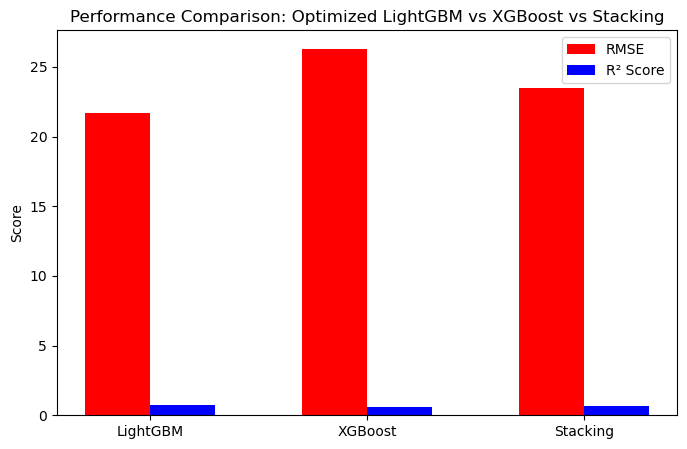

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load data
df = pd.read_csv("final Data All Exipients.csv")
df.columns = df.columns.str.replace(' ', '_')  # Sanitize feature names

# Define features and target
X = df.drop(columns=['DISINTEGRATION_TIME'])
y = df['DISINTEGRATION_TIME']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ====== Feature Selection using LightGBM Importance ======
importance_model = lgb.LGBMRegressor()
importance_model.fit(X_train, y_train)
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importance_model.feature_importances_})
important_features = feature_importances[feature_importances['importance'] > 0.005]['feature'].tolist()
X_train, X_test = X_train[important_features], X_test[important_features]

# ====== Feature Engineering: Interaction Terms ======
top_features = feature_importances.sort_values(by='importance', ascending=False)['feature'].tolist()[:5]
for i in range(len(top_features)):
    for j in range(i + 1, len(top_features)):
        X_train[f'{top_features[i]}_x_{top_features[j]}'] = X_train[top_features[i]] * X_train[top_features[j]]
        X_test[f'{top_features[i]}_x_{top_features[j]}'] = X_test[top_features[i]] * X_test[top_features[j]]

# ====== Optuna Hyperparameter Optimization ======
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 300, 700),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 31, 127),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 20),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 0.9),
        'subsample': trial.suggest_float('subsample', 0.7, 0.9),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 0.1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 0.1),
        'random_state': 42
    }
    model = lgb.LGBMRegressor(**params, verbose = -1)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_squared_error(y_test, preds, squared=False)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)
best_params = study.best_params

# Train Optimized LightGBM
lgbm_best = lgb.LGBMRegressor(**best_params, random_state=42)
lgbm_best.fit(X_train, y_train)
y_pred_lgbm = lgbm_best.predict(X_test)

# Train Optimized XGBoost
xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# ====== Stacking LightGBM + XGBoost ======
stacked_preds = (y_pred_lgbm + y_pred_xgb) / 2

# ====== Performance Evaluation ======
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.4f}, R²: {r2:.4f}")
    return rmse, r2

evaluate_model(y_test, y_pred_lgbm, "Optimized LightGBM")
evaluate_model(y_test, y_pred_xgb, "XGBoost")
evaluate_model(y_test, stacked_preds, "Stacking (Avg)")

# ====== Performance Visualization ======
models = ['LightGBM', 'XGBoost', 'Stacking']
rmse_values = [np.sqrt(mean_squared_error(y_test, y_pred_lgbm)),
               np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
               np.sqrt(mean_squared_error(y_test, stacked_preds))]
r2_values = [r2_score(y_test, y_pred_lgbm),
             r2_score(y_test, y_pred_xgb),
             r2_score(y_test, stacked_preds)]

plt.figure(figsize=(8, 5))
x = np.arange(len(models))
width = 0.3

plt.bar(x - width/2, rmse_values, width, label='RMSE', color='red')
plt.bar(x + width/2, r2_values, width, label='R² Score', color='blue')
plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Performance Comparison: Optimized LightGBM vs XGBoost vs Stacking")
plt.legend()
plt.show()


In [ ]:
print(X_train.columns)

Index(['Molecular_Weight', 'XLogP3-AA', 'Hydrogen_Bond_Donor_Count',
       'Hydrogen_Bond_Acceptor_Count', 'Rotational_bond_count',
       'Topological_surface_area', 'Heavy_atom_count', 'Complexity', 'LogS',
       'DOSE', 'Weight(mg)', 'Bulk_Density', 'Tapped_Density',
       'Carrs_Compressibility_Index', 'Hausner_Ratio', 'Angle_of_Repose',
       'Thickness', 'Wetting_time', 'Microcrystalline_Cellulose', 'Mannitol',
       'Magnesium_Stearate', 'Talc', 'Sodium_croscarmellose', 'Aspartame',
       'Hydroxypropyl_Cellulose_(HPC)', 'Gum', 'Chitosan', 'Sodium_saccharin',
       'Sodium_lauryl_sulfate(SLS)', 'Sodium_stearyl_fumarate_',
       'Polyvinylpyrrolidone_(Crospovidone)', 'Sodium_starch_glycolate',
       'polyvinyl_acetate', 'Lactose', 'Colloidal_silicon_dioxide_(Aerosil)',
       'Citric_acid', 'Menthol', 'B-cyclodextrin', 'Stevia_leaf_Powder_',
       'Clove_oil_', 'Starch', 'sodium_bicarbonate_(NaHCO3)', 'Plantago_ovata',
       'Pharmaburst', 'parteck', 'Polyethylene_Glyc

[I 2025-02-02 21:58:24,078] A new study created in memory with name: no-name-c7ec2b01-677a-4c7d-8416-85b18a1e1ec3


Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:24,698] Trial 0 finished with value: 33.82539167601964 and parameters: {'n_estimators': 928, 'learning_rate': 0.003910723722901893, 'num_leaves': 437, 'max_depth': 7, 'min_child_samples': 85, 'subsample': 0.9002382001358352, 'colsample_bytree': 0.654727750935117, 'reg_alpha': 2.292841538866197e-05, 'reg_lambda': 0.02630308744872756}. Best is trial 0 with value: 33.82539167601964.


Did not meet early stopping. Best iteration is:
[928]	valid_0's rmse: 33.8254
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:25,415] Trial 1 finished with value: 33.74699551468801 and parameters: {'n_estimators': 1483, 'learning_rate': 0.004028107296442997, 'num_leaves': 338, 'max_depth': 4, 'min_child_samples': 80, 'subsample': 0.8941172469435347, 'colsample_bytree': 0.834655935381975, 'reg_alpha': 1.1773661347723034e-07, 'reg_lambda': 2.9474133212468883e-08}. Best is trial 1 with value: 33.74699551468801.


Did not meet early stopping. Best iteration is:
[1483]	valid_0's rmse: 33.747
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:26,662] Trial 2 finished with value: 30.551538434716452 and parameters: {'n_estimators': 1032, 'learning_rate': 0.004395994465027259, 'num_leaves': 139, 'max_depth': 11, 'min_child_samples': 33, 'subsample': 0.7130383629804629, 'colsample_bytree': 0.6202415704179796, 'reg_alpha': 9.114270984114422e-07, 'reg_lambda': 1.6666129628439532e-08}. Best is trial 2 with value: 30.551538434716452.


Did not meet early stopping. Best iteration is:
[1032]	valid_0's rmse: 30.5515
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:28,089] Trial 3 finished with value: 33.76785445162983 and parameters: {'n_estimators': 1896, 'learning_rate': 0.001815925832624818, 'num_leaves': 373, 'max_depth': 12, 'min_child_samples': 85, 'subsample': 0.8254066975119628, 'colsample_bytree': 0.8732293743300703, 'reg_alpha': 1.1021268413944668e-08, 'reg_lambda': 3.331382105372226e-05}. Best is trial 2 with value: 30.551538434716452.


Did not meet early stopping. Best iteration is:
[1894]	valid_0's rmse: 33.7679
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:28,444] Trial 4 finished with value: 27.945518097423903 and parameters: {'n_estimators': 1221, 'learning_rate': 0.07114768348053821, 'num_leaves': 285, 'max_depth': 3, 'min_child_samples': 15, 'subsample': 0.607694458538757, 'colsample_bytree': 0.7169569869586064, 'reg_alpha': 0.018574953779520353, 'reg_lambda': 1.5233503979776088e-07}. Best is trial 4 with value: 27.945518097423903.


Early stopping, best iteration is:
[692]	valid_0's rmse: 27.9455
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:29,130] Trial 5 finished with value: 26.617898588718866 and parameters: {'n_estimators': 1620, 'learning_rate': 0.07346812045440956, 'num_leaves': 79, 'max_depth': 7, 'min_child_samples': 75, 'subsample': 0.9661934403661765, 'colsample_bytree': 0.9583053943130139, 'reg_alpha': 2.3913653052942753e-06, 'reg_lambda': 1.6381068607083033e-08}. Best is trial 5 with value: 26.617898588718866.


Early stopping, best iteration is:
[942]	valid_0's rmse: 26.6179
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:29,726] Trial 6 finished with value: 31.59397438209125 and parameters: {'n_estimators': 1060, 'learning_rate': 0.006946433490632144, 'num_leaves': 388, 'max_depth': 5, 'min_child_samples': 52, 'subsample': 0.9417494258932408, 'colsample_bytree': 0.8448134943525355, 'reg_alpha': 0.00030432906476022295, 'reg_lambda': 0.00022808816918120465}. Best is trial 5 with value: 26.617898588718866.


Did not meet early stopping. Best iteration is:
[1060]	valid_0's rmse: 31.594
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:30,903] Trial 7 finished with value: 26.28660235965625 and parameters: {'n_estimators': 1743, 'learning_rate': 0.03566544751541906, 'num_leaves': 347, 'max_depth': 8, 'min_child_samples': 92, 'subsample': 0.7263360913748047, 'colsample_bytree': 0.8109976842266994, 'reg_alpha': 0.0009472492565956628, 'reg_lambda': 0.7074865071501222}. Best is trial 7 with value: 26.28660235965625.


Did not meet early stopping. Best iteration is:
[1693]	valid_0's rmse: 26.2866
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:32,310] Trial 8 finished with value: 27.410036015135926 and parameters: {'n_estimators': 1548, 'learning_rate': 0.03343747302505614, 'num_leaves': 390, 'max_depth': 8, 'min_child_samples': 20, 'subsample': 0.9033863228343249, 'colsample_bytree': 0.9899500202084652, 'reg_alpha': 4.33229946617357e-06, 'reg_lambda': 0.014237395218922819}. Best is trial 7 with value: 26.28660235965625.


Early stopping, best iteration is:
[1313]	valid_0's rmse: 27.41
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:32,923] Trial 9 finished with value: 33.88006854580885 and parameters: {'n_estimators': 1102, 'learning_rate': 0.0022853221349278434, 'num_leaves': 223, 'max_depth': 5, 'min_child_samples': 38, 'subsample': 0.6232540924286255, 'colsample_bytree': 0.6196231151528626, 'reg_alpha': 4.507647722668073e-07, 'reg_lambda': 1.1691028221874275e-07}. Best is trial 7 with value: 26.28660235965625.


Did not meet early stopping. Best iteration is:
[1102]	valid_0's rmse: 33.8801
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:33,348] Trial 10 finished with value: 30.711341359529445 and parameters: {'n_estimators': 501, 'learning_rate': 0.02129006000853254, 'num_leaves': 511, 'max_depth': 9, 'min_child_samples': 100, 'subsample': 0.7368631983253171, 'colsample_bytree': 0.7496213422780609, 'reg_alpha': 4.182737518878626, 'reg_lambda': 2.6421380673883315}. Best is trial 7 with value: 26.28660235965625.


Did not meet early stopping. Best iteration is:
[501]	valid_0's rmse: 30.7113
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:34,046] Trial 11 finished with value: 27.15203530180807 and parameters: {'n_estimators': 1980, 'learning_rate': 0.08503107750851108, 'num_leaves': 36, 'max_depth': 7, 'min_child_samples': 66, 'subsample': 0.9864694509425319, 'colsample_bytree': 0.954202530472557, 'reg_alpha': 0.003104119157092149, 'reg_lambda': 7.190223349590966}. Best is trial 7 with value: 26.28660235965625.


Early stopping, best iteration is:
[798]	valid_0's rmse: 27.152
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:35,447] Trial 12 finished with value: 27.048389654761564 and parameters: {'n_estimators': 1666, 'learning_rate': 0.02767118433613908, 'num_leaves': 36, 'max_depth': 9, 'min_child_samples': 100, 'subsample': 0.8032201868440377, 'colsample_bytree': 0.911401591270824, 'reg_alpha': 0.1342097746546264, 'reg_lambda': 1.1645056046955969e-05}. Best is trial 7 with value: 26.28660235965625.


Did not meet early stopping. Best iteration is:
[1666]	valid_0's rmse: 27.0484
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:36,924] Trial 13 finished with value: 28.010699165112708 and parameters: {'n_estimators': 1740, 'learning_rate': 0.015166554198855021, 'num_leaves': 183, 'max_depth': 6, 'min_child_samples': 70, 'subsample': 0.7163190042583523, 'colsample_bytree': 0.7753303846708718, 'reg_alpha': 0.00021132621701451068, 'reg_lambda': 1.8305620513078831e-09}. Best is trial 7 with value: 26.28660235965625.


Did not meet early stopping. Best iteration is:
[1675]	valid_0's rmse: 28.0107
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:38,508] Trial 14 finished with value: 26.184966830999652 and parameters: {'n_estimators': 1407, 'learning_rate': 0.04666176275864535, 'num_leaves': 125, 'max_depth': 10, 'min_child_samples': 58, 'subsample': 0.7611428283712603, 'colsample_bytree': 0.9128817583049511, 'reg_alpha': 3.444643645501398e-09, 'reg_lambda': 0.060219819425779426}. Best is trial 14 with value: 26.184966830999652.


Early stopping, best iteration is:
[1222]	valid_0's rmse: 26.185
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:39,932] Trial 15 finished with value: 25.735024764184793 and parameters: {'n_estimators': 1366, 'learning_rate': 0.039255334218357835, 'num_leaves': 265, 'max_depth': 10, 'min_child_samples': 56, 'subsample': 0.6605091618154572, 'colsample_bytree': 0.8941323769604508, 'reg_alpha': 3.781455079912217e-09, 'reg_lambda': 0.13088141354564756}. Best is trial 15 with value: 25.735024764184793.


Early stopping, best iteration is:
[1238]	valid_0's rmse: 25.735
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:41,451] Trial 16 finished with value: 27.499320693439717 and parameters: {'n_estimators': 1378, 'learning_rate': 0.011815888322529597, 'num_leaves': 264, 'max_depth': 10, 'min_child_samples': 55, 'subsample': 0.6600204119253142, 'colsample_bytree': 0.9043959988774577, 'reg_alpha': 1.8710126208180136e-09, 'reg_lambda': 0.009145361718518374}. Best is trial 15 with value: 25.735024764184793.


Did not meet early stopping. Best iteration is:
[1378]	valid_0's rmse: 27.4993
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:42,517] Trial 17 finished with value: 26.97234412129286 and parameters: {'n_estimators': 837, 'learning_rate': 0.052165377407354795, 'num_leaves': 136, 'max_depth': 12, 'min_child_samples': 46, 'subsample': 0.6675961348765809, 'colsample_bytree': 0.9016766083947548, 'reg_alpha': 1.0576386799181073e-09, 'reg_lambda': 0.10634917698880998}. Best is trial 15 with value: 25.735024764184793.


Did not meet early stopping. Best iteration is:
[797]	valid_0's rmse: 26.9723
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:43,496] Trial 18 finished with value: 26.957615802069384 and parameters: {'n_estimators': 1353, 'learning_rate': 0.04666565538129513, 'num_leaves': 186, 'max_depth': 10, 'min_child_samples': 63, 'subsample': 0.7741698513353558, 'colsample_bytree': 0.9467396981378258, 'reg_alpha': 1.99151433545545e-08, 'reg_lambda': 0.0009506859201587562}. Best is trial 15 with value: 25.735024764184793.


Early stopping, best iteration is:
[871]	valid_0's rmse: 26.9576
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:44,991] Trial 19 finished with value: 30.229990774516306 and parameters: {'n_estimators': 725, 'learning_rate': 0.008104436549841743, 'num_leaves': 282, 'max_depth': 10, 'min_child_samples': 30, 'subsample': 0.8444335472521987, 'colsample_bytree': 0.8821446116570559, 'reg_alpha': 3.764095274109413e-08, 'reg_lambda': 0.4020198283517571}. Best is trial 15 with value: 25.735024764184793.


Did not meet early stopping. Best iteration is:
[725]	valid_0's rmse: 30.23
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:47,027] Trial 20 finished with value: 27.79252531899588 and parameters: {'n_estimators': 1244, 'learning_rate': 0.02121320902238973, 'num_leaves': 127, 'max_depth': 11, 'min_child_samples': 46, 'subsample': 0.6682712063721933, 'colsample_bytree': 0.9953115599708185, 'reg_alpha': 5.157333988897849e-09, 'reg_lambda': 2.850761936436884e-06}. Best is trial 15 with value: 25.735024764184793.


Did not meet early stopping. Best iteration is:
[1244]	valid_0's rmse: 27.7925
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:48,292] Trial 21 finished with value: 26.032879750311622 and parameters: {'n_estimators': 1785, 'learning_rate': 0.043530395865821, 'num_leaves': 327, 'max_depth': 9, 'min_child_samples': 56, 'subsample': 0.7591964508221097, 'colsample_bytree': 0.8099841606398919, 'reg_alpha': 0.001072593631093242, 'reg_lambda': 0.49730746125837066}. Best is trial 15 with value: 25.735024764184793.


Early stopping, best iteration is:
[987]	valid_0's rmse: 26.0329
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:50,082] Trial 22 finished with value: 34.767600356980765 and parameters: {'n_estimators': 1418, 'learning_rate': 0.0010089459844911624, 'num_leaves': 234, 'max_depth': 9, 'min_child_samples': 61, 'subsample': 0.7622996947984545, 'colsample_bytree': 0.8434186522389119, 'reg_alpha': 1.8837440345584272e-05, 'reg_lambda': 0.002245601294451914}. Best is trial 15 with value: 25.735024764184793.


Did not meet early stopping. Best iteration is:
[1418]	valid_0's rmse: 34.7676
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:51,094] Trial 23 finished with value: 25.706766679026714 and parameters: {'n_estimators': 1835, 'learning_rate': 0.09795587076012566, 'num_leaves': 310, 'max_depth': 11, 'min_child_samples': 55, 'subsample': 0.6891889092185168, 'colsample_bytree': 0.7196379000315936, 'reg_alpha': 0.08197034423434586, 'reg_lambda': 0.1297400370664259}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[622]	valid_0's rmse: 25.7068
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:52,071] Trial 24 finished with value: 25.936086973494533 and parameters: {'n_estimators': 1866, 'learning_rate': 0.09804618364261285, 'num_leaves': 317, 'max_depth': 11, 'min_child_samples': 51, 'subsample': 0.6846169010055582, 'colsample_bytree': 0.7053556531952068, 'reg_alpha': 0.30074705658633494, 'reg_lambda': 0.45940510450172756}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[615]	valid_0's rmse: 25.9361
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:53,489] Trial 25 finished with value: 26.295920218297738 and parameters: {'n_estimators': 1984, 'learning_rate': 0.08999460950056509, 'num_leaves': 434, 'max_depth': 11, 'min_child_samples': 45, 'subsample': 0.686789589927043, 'colsample_bytree': 0.6912655088870259, 'reg_alpha': 8.42131213797836, 'reg_lambda': 0.003174283414877663}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[866]	valid_0's rmse: 26.2959
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:54,464] Trial 26 finished with value: 26.147068005588867 and parameters: {'n_estimators': 1853, 'learning_rate': 0.09547432948200169, 'num_leaves': 296, 'max_depth': 12, 'min_child_samples': 72, 'subsample': 0.6393519942577089, 'colsample_bytree': 0.7233969684517747, 'reg_alpha': 0.33056781136712704, 'reg_lambda': 2.377349196482513}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[717]	valid_0's rmse: 26.1471
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:55,417] Trial 27 finished with value: 27.095188740695278 and parameters: {'n_estimators': 1854, 'learning_rate': 0.056425019930843534, 'num_leaves': 239, 'max_depth': 11, 'min_child_samples': 40, 'subsample': 0.6926017661344395, 'colsample_bytree': 0.6783249876736555, 'reg_alpha': 0.8006537895635812, 'reg_lambda': 0.1745734193198895}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[551]	valid_0's rmse: 27.0952
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:58:57,239] Trial 28 finished with value: 26.423369386727078 and parameters: {'n_estimators': 1605, 'learning_rate': 0.06413668873035841, 'num_leaves': 312, 'max_depth': 12, 'min_child_samples': 26, 'subsample': 0.6007260492445483, 'colsample_bytree': 0.7736903716798353, 'reg_alpha': 0.02387247093170275, 'reg_lambda': 0.00032171118845341186}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[1076]	valid_0's rmse: 26.4234
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1697]	valid_0's rmse: 26.1047


[I 2025-02-02 21:58:59,569] Trial 29 finished with value: 26.104713775011994 and parameters: {'n_estimators': 1699, 'learning_rate': 0.02179135046888802, 'num_leaves': 448, 'max_depth': 11, 'min_child_samples': 51, 'subsample': 0.6400894111438391, 'colsample_bytree': 0.6579501865500063, 'reg_alpha': 0.05242971143227198, 'reg_lambda': 9.68971677862842}. Best is trial 23 with value: 25.706766679026714.


Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:00,502] Trial 30 finished with value: 26.939939828649663 and parameters: {'n_estimators': 1512, 'learning_rate': 0.09295097206480442, 'num_leaves': 256, 'max_depth': 10, 'min_child_samples': 39, 'subsample': 0.6855035595784428, 'colsample_bytree': 0.7305510429484133, 'reg_alpha': 1.091144776558253, 'reg_lambda': 0.023130308151668787}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[581]	valid_0's rmse: 26.9399
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:01,692] Trial 31 finished with value: 25.951365091214534 and parameters: {'n_estimators': 1807, 'learning_rate': 0.041443114488948274, 'num_leaves': 326, 'max_depth': 9, 'min_child_samples': 56, 'subsample': 0.7332574568375304, 'colsample_bytree': 0.784803313370688, 'reg_alpha': 0.0051297939007739456, 'reg_lambda': 0.8008462490704127}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[1029]	valid_0's rmse: 25.9514
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:03,078] Trial 32 finished with value: 26.492966069327426 and parameters: {'n_estimators': 1882, 'learning_rate': 0.03265863247012292, 'num_leaves': 344, 'max_depth': 9, 'min_child_samples': 65, 'subsample': 0.7070989824340128, 'colsample_bytree': 0.7712435361271948, 'reg_alpha': 0.00483100607803447, 'reg_lambda': 1.352336394192901}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[1503]	valid_0's rmse: 26.493
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:04,649] Trial 33 finished with value: 27.202467173812366 and parameters: {'n_estimators': 1799, 'learning_rate': 0.014540772365163645, 'num_leaves': 211, 'max_depth': 8, 'min_child_samples': 49, 'subsample': 0.7396777294304566, 'colsample_bytree': 0.6959738622384741, 'reg_alpha': 0.007745204866041432, 'reg_lambda': 0.05756504547110624}. Best is trial 23 with value: 25.706766679026714.


Did not meet early stopping. Best iteration is:
[1799]	valid_0's rmse: 27.2025
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:05,645] Trial 34 finished with value: 25.987115545210994 and parameters: {'n_estimators': 1996, 'learning_rate': 0.06598260626131024, 'num_leaves': 364, 'max_depth': 11, 'min_child_samples': 77, 'subsample': 0.6586726295388861, 'colsample_bytree': 0.6534116071639966, 'reg_alpha': 4.5684744245141086e-05, 'reg_lambda': 0.19669879670729862}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[868]	valid_0's rmse: 25.9871
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:07,050] Trial 35 finished with value: 26.59021985509511 and parameters: {'n_estimators': 1579, 'learning_rate': 0.03933103879722762, 'num_leaves': 416, 'max_depth': 10, 'min_child_samples': 59, 'subsample': 0.7933875088796791, 'colsample_bytree': 0.7450679130158693, 'reg_alpha': 0.07830946661577537, 'reg_lambda': 0.005459819074078303}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[1188]	valid_0's rmse: 26.5902
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:08,315] Trial 36 finished with value: 26.988599577194915 and parameters: {'n_estimators': 1154, 'learning_rate': 0.026737144301153502, 'num_leaves': 312, 'max_depth': 12, 'min_child_samples': 68, 'subsample': 0.6338252906831248, 'colsample_bytree': 0.7996566462327548, 'reg_alpha': 2.0129505557963534, 'reg_lambda': 0.04586459775428399}. Best is trial 23 with value: 25.706766679026714.


Did not meet early stopping. Best iteration is:
[1154]	valid_0's rmse: 26.9886
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:09,415] Trial 37 finished with value: 27.10166709083805 and parameters: {'n_estimators': 950, 'learning_rate': 0.07049698619105997, 'num_leaves': 304, 'max_depth': 11, 'min_child_samples': 42, 'subsample': 0.7020943310679846, 'colsample_bytree': 0.7536993481049894, 'reg_alpha': 0.3320746135733447, 'reg_lambda': 2.2780074146485507}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[764]	valid_0's rmse: 27.1017
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:11,116] Trial 38 finished with value: 30.3142431040467 and parameters: {'n_estimators': 1911, 'learning_rate': 0.00536095378311375, 'num_leaves': 270, 'max_depth': 9, 'min_child_samples': 83, 'subsample': 0.7360014646311741, 'colsample_bytree': 0.6521503721363907, 'reg_alpha': 0.018434853978497256, 'reg_lambda': 0.24695899483980532}. Best is trial 23 with value: 25.706766679026714.


Did not meet early stopping. Best iteration is:
[1911]	valid_0's rmse: 30.3142
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:12,782] Trial 39 finished with value: 26.509894881710107 and parameters: {'n_estimators': 1667, 'learning_rate': 0.0593714491635146, 'num_leaves': 366, 'max_depth': 8, 'min_child_samples': 33, 'subsample': 0.8334801036026069, 'colsample_bytree': 0.6027092817030791, 'reg_alpha': 0.0007540295027908616, 'reg_lambda': 0.0006273868066503536}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[1524]	valid_0's rmse: 26.5099
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:13,724] Trial 40 finished with value: 25.90769073147454 and parameters: {'n_estimators': 1305, 'learning_rate': 0.08086817624264221, 'num_leaves': 196, 'max_depth': 10, 'min_child_samples': 50, 'subsample': 0.6508738298182203, 'colsample_bytree': 0.8701305027709387, 'reg_alpha': 1.1712906653617206e-07, 'reg_lambda': 4.119825354222916e-05}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[658]	valid_0's rmse: 25.9077
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:14,741] Trial 41 finished with value: 26.268128401889527 and parameters: {'n_estimators': 1464, 'learning_rate': 0.07542952381895926, 'num_leaves': 191, 'max_depth': 10, 'min_child_samples': 52, 'subsample': 0.6814103392284928, 'colsample_bytree': 0.8524555044429399, 'reg_alpha': 0.19083968782259833, 'reg_lambda': 1.8493284626698855e-06}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[838]	valid_0's rmse: 26.2681
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:15,249] Trial 42 finished with value: 27.94963386424811 and parameters: {'n_estimators': 1332, 'learning_rate': 0.09894603026397152, 'num_leaves': 162, 'max_depth': 3, 'min_child_samples': 54, 'subsample': 0.620025756000566, 'colsample_bytree': 0.8744116282441002, 'reg_alpha': 1.383185405389565e-07, 'reg_lambda': 1.055519272026225e-05}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[1077]	valid_0's rmse: 27.9496
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:16,609] Trial 43 finished with value: 26.097217733030263 and parameters: {'n_estimators': 1268, 'learning_rate': 0.05537166879645216, 'num_leaves': 334, 'max_depth': 11, 'min_child_samples': 49, 'subsample': 0.6444275076153123, 'colsample_bytree': 0.8268610754345036, 'reg_alpha': 9.862845419936116e-08, 'reg_lambda': 8.158427353409126e-05}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[1123]	valid_0's rmse: 26.0972
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:17,729] Trial 44 finished with value: 26.19442113203339 and parameters: {'n_estimators': 1800, 'learning_rate': 0.07242298847373581, 'num_leaves': 254, 'max_depth': 10, 'min_child_samples': 59, 'subsample': 0.7152000359701732, 'colsample_bytree': 0.7051920525077252, 'reg_alpha': 4.247036857322157e-06, 'reg_lambda': 7.128554067992429e-05}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[1031]	valid_0's rmse: 26.1944
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:18,893] Trial 45 finished with value: 26.251254578801927 and parameters: {'n_estimators': 1199, 'learning_rate': 0.039271505446016264, 'num_leaves': 284, 'max_depth': 9, 'min_child_samples': 36, 'subsample': 0.6529977318626138, 'colsample_bytree': 0.7947738421750409, 'reg_alpha': 6.79776843589927e-07, 'reg_lambda': 0.8769592470934024}. Best is trial 23 with value: 25.706766679026714.


Did not meet early stopping. Best iteration is:
[1176]	valid_0's rmse: 26.2513
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:20,036] Trial 46 finished with value: 26.920070360815256 and parameters: {'n_estimators': 1908, 'learning_rate': 0.07935982541675547, 'num_leaves': 394, 'max_depth': 11, 'min_child_samples': 43, 'subsample': 0.6207227154298344, 'colsample_bytree': 0.9356885231145342, 'reg_alpha': 9.634661365837541e-09, 'reg_lambda': 4.308883751635009}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[828]	valid_0's rmse: 26.9201
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:20,778] Trial 47 finished with value: 27.673127356829273 and parameters: {'n_estimators': 992, 'learning_rate': 0.030081471746600627, 'num_leaves': 211, 'max_depth': 7, 'min_child_samples': 63, 'subsample': 0.6752063319944551, 'colsample_bytree': 0.8598937920733781, 'reg_alpha': 0.02521767802194689, 'reg_lambda': 3.4393982110791934e-07}. Best is trial 23 with value: 25.706766679026714.


Did not meet early stopping. Best iteration is:
[990]	valid_0's rmse: 27.6731
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:21,821] Trial 48 finished with value: 26.64907861447121 and parameters: {'n_estimators': 1521, 'learning_rate': 0.05636372371946728, 'num_leaves': 322, 'max_depth': 8, 'min_child_samples': 74, 'subsample': 0.7261273248616671, 'colsample_bytree': 0.8306358009581123, 'reg_alpha': 0.0024032374316987335, 'reg_lambda': 0.022540837278896043}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[980]	valid_0's rmse: 26.6491
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:22,720] Trial 49 finished with value: 27.254216202952378 and parameters: {'n_estimators': 1296, 'learning_rate': 0.04693496136832758, 'num_leaves': 88, 'max_depth': 4, 'min_child_samples': 13, 'subsample': 0.7006290156441433, 'colsample_bytree': 0.6735785501130302, 'reg_alpha': 1.7232449651061618e-05, 'reg_lambda': 1.2224865944658429e-05}. Best is trial 23 with value: 25.706766679026714.


Did not meet early stopping. Best iteration is:
[1236]	valid_0's rmse: 27.2542
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:23,781] Trial 50 finished with value: 32.444846903033984 and parameters: {'n_estimators': 830, 'learning_rate': 0.0030135923647702178, 'num_leaves': 357, 'max_depth': 12, 'min_child_samples': 56, 'subsample': 0.8658289905423718, 'colsample_bytree': 0.7381169818447818, 'reg_alpha': 1.8411187466610498e-07, 'reg_lambda': 0.9774534213122359}. Best is trial 23 with value: 25.706766679026714.


Did not meet early stopping. Best iteration is:
[830]	valid_0's rmse: 32.4448
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:24,933] Trial 51 finished with value: 25.962852825697958 and parameters: {'n_estimators': 1739, 'learning_rate': 0.07436876227838282, 'num_leaves': 380, 'max_depth': 10, 'min_child_samples': 78, 'subsample': 0.657913041540574, 'colsample_bytree': 0.6246518456679969, 'reg_alpha': 0.00017926684254076125, 'reg_lambda': 0.12104451834374823}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[1019]	valid_0's rmse: 25.9629
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:25,846] Trial 52 finished with value: 26.355793564597995 and parameters: {'n_estimators': 1723, 'learning_rate': 0.07892566882862423, 'num_leaves': 383, 'max_depth': 10, 'min_child_samples': 92, 'subsample': 0.6557058536213289, 'colsample_bytree': 0.6369651994960946, 'reg_alpha': 0.0003342179858637628, 'reg_lambda': 0.06881470796386067}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[971]	valid_0's rmse: 26.3558
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:26,726] Trial 53 finished with value: 26.16715501191024 and parameters: {'n_estimators': 1626, 'learning_rate': 0.09899820223817302, 'num_leaves': 343, 'max_depth': 10, 'min_child_samples': 88, 'subsample': 0.6204857212511532, 'colsample_bytree': 0.8902265988275566, 'reg_alpha': 7.883731641166558e-05, 'reg_lambda': 0.32616280673124176}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[854]	valid_0's rmse: 26.1672
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:27,613] Trial 54 finished with value: 26.732018991333522 and parameters: {'n_estimators': 1938, 'learning_rate': 0.06460867446415133, 'num_leaves': 480, 'max_depth': 9, 'min_child_samples': 79, 'subsample': 0.6745314076449206, 'colsample_bytree': 0.9707499061471042, 'reg_alpha': 1.5236302666485932e-06, 'reg_lambda': 0.008533296439402144}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[876]	valid_0's rmse: 26.732
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1734]	valid_0's rmse: 25.8152


[I 2025-02-02 21:59:29,412] Trial 55 finished with value: 25.81524550266013 and parameters: {'n_estimators': 1772, 'learning_rate': 0.03858149758065766, 'num_leaves': 408, 'max_depth': 10, 'min_child_samples': 49, 'subsample': 0.7221096780758056, 'colsample_bytree': 0.7101053298609707, 'reg_alpha': 0.009334209473107992, 'reg_lambda': 0.12524269272281568}. Best is trial 23 with value: 25.706766679026714.


Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:30,844] Trial 56 finished with value: 27.259340972533536 and parameters: {'n_estimators': 1797, 'learning_rate': 0.02619002722265959, 'num_leaves': 292, 'max_depth': 6, 'min_child_samples': 49, 'subsample': 0.7904500293716444, 'colsample_bytree': 0.7073594811428845, 'reg_alpha': 0.06702750809568152, 'reg_lambda': 0.001953092792021945}. Best is trial 23 with value: 25.706766679026714.


Did not meet early stopping. Best iteration is:
[1797]	valid_0's rmse: 27.2593
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1833]	valid_0's rmse: 26.1605


[I 2025-02-02 21:59:33,925] Trial 57 finished with value: 26.160470228875965 and parameters: {'n_estimators': 1835, 'learning_rate': 0.017207029006091903, 'num_leaves': 409, 'max_depth': 11, 'min_child_samples': 53, 'subsample': 0.7526837345286378, 'colsample_bytree': 0.9233965464809306, 'reg_alpha': 0.006561198267449836, 'reg_lambda': 0.5234559489785278}. Best is trial 23 with value: 25.706766679026714.


Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:35,548] Trial 58 finished with value: 27.268488553538486 and parameters: {'n_estimators': 1098, 'learning_rate': 0.035355403533348734, 'num_leaves': 170, 'max_depth': 9, 'min_child_samples': 46, 'subsample': 0.7242192654523195, 'colsample_bytree': 0.7812879655921178, 'reg_alpha': 0.010902432668516036, 'reg_lambda': 4.920133472903365}. Best is trial 23 with value: 25.706766679026714.


Did not meet early stopping. Best iteration is:
[1096]	valid_0's rmse: 27.2685
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:36,867] Trial 59 finished with value: 26.351458734381648 and parameters: {'n_estimators': 1454, 'learning_rate': 0.04984517567998763, 'num_leaves': 240, 'max_depth': 11, 'min_child_samples': 61, 'subsample': 0.7741621410556214, 'colsample_bytree': 0.7595027954291962, 'reg_alpha': 0.002381216576683431, 'reg_lambda': 0.00023604981082646866}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[908]	valid_0's rmse: 26.3515
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1663]	valid_0's rmse: 27.2859


[I 2025-02-02 21:59:39,158] Trial 60 finished with value: 27.285909986137224 and parameters: {'n_estimators': 1663, 'learning_rate': 0.010741450590340214, 'num_leaves': 459, 'max_depth': 12, 'min_child_samples': 57, 'subsample': 0.7449779935942057, 'colsample_bytree': 0.7170409032946494, 'reg_alpha': 0.49619181426182407, 'reg_lambda': 0.01586386333591061}. Best is trial 23 with value: 25.706766679026714.


Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:40,193] Trial 61 finished with value: 26.660214209157633 and parameters: {'n_estimators': 1750, 'learning_rate': 0.08262103393675437, 'num_leaves': 377, 'max_depth': 10, 'min_child_samples': 68, 'subsample': 0.6949474546643667, 'colsample_bytree': 0.6264350819965329, 'reg_alpha': 0.000556416030059851, 'reg_lambda': 0.12337705395152923}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[706]	valid_0's rmse: 26.6602
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:41,000] Trial 62 finished with value: 27.090103392566032 and parameters: {'n_estimators': 547, 'learning_rate': 0.03899320079370986, 'num_leaves': 413, 'max_depth': 10, 'min_child_samples': 50, 'subsample': 0.665937330748896, 'colsample_bytree': 0.6706845672237535, 'reg_alpha': 0.00016735969363654903, 'reg_lambda': 0.036607583895389026}. Best is trial 23 with value: 25.706766679026714.


Did not meet early stopping. Best iteration is:
[547]	valid_0's rmse: 27.0901
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:42,335] Trial 63 finished with value: 26.448055958483852 and parameters: {'n_estimators': 1929, 'learning_rate': 0.08232849221551428, 'num_leaves': 320, 'max_depth': 10, 'min_child_samples': 44, 'subsample': 0.7102361078252031, 'colsample_bytree': 0.815184397317069, 'reg_alpha': 2.982492019884916e-08, 'reg_lambda': 0.11201834755481654}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[873]	valid_0's rmse: 26.4481
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:43,647] Trial 64 finished with value: 26.492209065818 and parameters: {'n_estimators': 1762, 'learning_rate': 0.046589060345979816, 'num_leaves': 395, 'max_depth': 9, 'min_child_samples': 95, 'subsample': 0.6470052495665011, 'colsample_bytree': 0.6846963475578987, 'reg_alpha': 0.0014952205953084627, 'reg_lambda': 0.5771809631623518}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[1236]	valid_0's rmse: 26.4922
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1842]	valid_0's rmse: 26.5875


[I 2025-02-02 21:59:45,957] Trial 65 finished with value: 26.58750996291309 and parameters: {'n_estimators': 1842, 'learning_rate': 0.023180135257885856, 'num_leaves': 353, 'max_depth': 11, 'min_child_samples': 63, 'subsample': 0.6334839738374495, 'colsample_bytree': 0.7305927348973729, 'reg_alpha': 0.14819263612471534, 'reg_lambda': 1.713871097351458}. Best is trial 23 with value: 25.706766679026714.


Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:46,986] Trial 66 finished with value: 26.094182086406423 and parameters: {'n_estimators': 1558, 'learning_rate': 0.06578993559491438, 'num_leaves': 277, 'max_depth': 10, 'min_child_samples': 36, 'subsample': 0.6906754715657466, 'colsample_bytree': 0.6027207530166279, 'reg_alpha': 1.0020723630560394e-05, 'reg_lambda': 3.3558509938479456e-05}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[652]	valid_0's rmse: 26.0942
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1248]	valid_0's rmse: 26.673


[I 2025-02-02 21:59:49,880] Trial 67 finished with value: 26.672960354709957 and parameters: {'n_estimators': 1696, 'learning_rate': 0.04173084740099893, 'num_leaves': 432, 'max_depth': 11, 'min_child_samples': 22, 'subsample': 0.6050958782649405, 'colsample_bytree': 0.865294567744158, 'reg_alpha': 1.099512033060088e-09, 'reg_lambda': 0.2786295137705237}. Best is trial 23 with value: 25.706766679026714.


Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:51,915] Trial 68 finished with value: 26.792161640812086 and parameters: {'n_estimators': 1628, 'learning_rate': 0.051654890459847676, 'num_leaves': 302, 'max_depth': 9, 'min_child_samples': 48, 'subsample': 0.9160634148181359, 'colsample_bytree': 0.8915838452854133, 'reg_alpha': 3.856167399512204e-09, 'reg_lambda': 0.10609292874067278}. Best is trial 23 with value: 25.706766679026714.


Early stopping, best iteration is:
[1224]	valid_0's rmse: 26.7922
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:53,018] Trial 69 finished with value: 25.69420325077882 and parameters: {'n_estimators': 1959, 'learning_rate': 0.08546286580708941, 'num_leaves': 225, 'max_depth': 10, 'min_child_samples': 55, 'subsample': 0.6760931786894023, 'colsample_bytree': 0.7886117115580792, 'reg_alpha': 0.04060603162474469, 'reg_lambda': 4.421738437280623e-09}. Best is trial 69 with value: 25.69420325077882.


Early stopping, best iteration is:
[605]	valid_0's rmse: 25.6942
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1949]	valid_0's rmse: 27.5605


[I 2025-02-02 21:59:56,448] Trial 70 finished with value: 27.560530382817372 and parameters: {'n_estimators': 1949, 'learning_rate': 0.00796787740365352, 'num_leaves': 211, 'max_depth': 11, 'min_child_samples': 55, 'subsample': 0.6796068854432484, 'colsample_bytree': 0.790197409980001, 'reg_alpha': 0.05435412333826116, 'reg_lambda': 3.5995116737096713e-09}. Best is trial 69 with value: 25.69420325077882.


Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:57,796] Trial 71 finished with value: 25.683598228357287 and parameters: {'n_estimators': 1880, 'learning_rate': 0.08875075299307801, 'num_leaves': 156, 'max_depth': 10, 'min_child_samples': 52, 'subsample': 0.6696968062911843, 'colsample_bytree': 0.7573825124533924, 'reg_alpha': 0.026739409773433514, 'reg_lambda': 4.471290229868119e-08}. Best is trial 71 with value: 25.683598228357287.


Early stopping, best iteration is:
[714]	valid_0's rmse: 25.6836
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:59:59,328] Trial 72 finished with value: 25.684122870805794 and parameters: {'n_estimators': 1872, 'learning_rate': 0.08915419933088449, 'num_leaves': 109, 'max_depth': 10, 'min_child_samples': 52, 'subsample': 0.7182421270465202, 'colsample_bytree': 0.7599172594438202, 'reg_alpha': 0.033294478876505294, 'reg_lambda': 6.1537593387417115e-09}. Best is trial 71 with value: 25.683598228357287.


Early stopping, best iteration is:
[834]	valid_0's rmse: 25.6841
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:00,774] Trial 73 finished with value: 25.52929510841469 and parameters: {'n_estimators': 2000, 'learning_rate': 0.08780465300769699, 'num_leaves': 87, 'max_depth': 10, 'min_child_samples': 53, 'subsample': 0.6677495561038022, 'colsample_bytree': 0.7601098124931289, 'reg_alpha': 1.6073011992631083, 'reg_lambda': 1.4817624626259029e-08}. Best is trial 73 with value: 25.52929510841469.


Early stopping, best iteration is:
[611]	valid_0's rmse: 25.5293
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:02,260] Trial 74 finished with value: 25.43760172843804 and parameters: {'n_estimators': 1997, 'learning_rate': 0.0865003713497213, 'num_leaves': 101, 'max_depth': 10, 'min_child_samples': 53, 'subsample': 0.6684869564407228, 'colsample_bytree': 0.7602227818651768, 'reg_alpha': 1.6118557446503197, 'reg_lambda': 1.6206311066389056e-08}. Best is trial 74 with value: 25.43760172843804.


Early stopping, best iteration is:
[789]	valid_0's rmse: 25.4376
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:03,917] Trial 75 finished with value: 26.57265654074155 and parameters: {'n_estimators': 1965, 'learning_rate': 0.08814177952063826, 'num_leaves': 102, 'max_depth': 10, 'min_child_samples': 47, 'subsample': 0.6710531111571709, 'colsample_bytree': 0.7559025521326781, 'reg_alpha': 3.8402589250375443, 'reg_lambda': 2.143109481997765e-08}. Best is trial 74 with value: 25.43760172843804.


Early stopping, best iteration is:
[768]	valid_0's rmse: 26.5727
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:05,866] Trial 76 finished with value: 25.96821192592286 and parameters: {'n_estimators': 1888, 'learning_rate': 0.059999098534888495, 'num_leaves': 54, 'max_depth': 9, 'min_child_samples': 53, 'subsample': 0.7183529316017004, 'colsample_bytree': 0.7680589338576248, 'reg_alpha': 1.1197025863558299, 'reg_lambda': 8.911343049530324e-09}. Best is trial 74 with value: 25.43760172843804.


Early stopping, best iteration is:
[1047]	valid_0's rmse: 25.9682
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:07,056] Trial 77 finished with value: 26.758245532892364 and parameters: {'n_estimators': 1985, 'learning_rate': 0.0988235002149055, 'num_leaves': 109, 'max_depth': 10, 'min_child_samples': 60, 'subsample': 0.7020073030379985, 'colsample_bytree': 0.7464559665310591, 'reg_alpha': 7.12728266678624, 'reg_lambda': 4.9550525377487435e-08}. Best is trial 74 with value: 25.43760172843804.


Early stopping, best iteration is:
[611]	valid_0's rmse: 26.7582
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:08,355] Trial 78 finished with value: 27.355931943464324 and parameters: {'n_estimators': 1997, 'learning_rate': 0.06705526767733451, 'num_leaves': 149, 'max_depth': 10, 'min_child_samples': 42, 'subsample': 0.628740636862882, 'colsample_bytree': 0.7606649942064302, 'reg_alpha': 1.9540822246488119, 'reg_lambda': 5.722116954118971e-09}. Best is trial 74 with value: 25.43760172843804.


Early stopping, best iteration is:
[684]	valid_0's rmse: 27.3559
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:09,869] Trial 79 finished with value: 25.69439788714967 and parameters: {'n_estimators': 1870, 'learning_rate': 0.08677915594423866, 'num_leaves': 57, 'max_depth': 11, 'min_child_samples': 58, 'subsample': 0.6903674980912701, 'colsample_bytree': 0.8101893094997304, 'reg_alpha': 0.03105107349723959, 'reg_lambda': 1.92162943665618e-09}. Best is trial 74 with value: 25.43760172843804.


Early stopping, best iteration is:
[725]	valid_0's rmse: 25.6944
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:11,159] Trial 80 finished with value: 26.568548917584035 and parameters: {'n_estimators': 1888, 'learning_rate': 0.08894917759715448, 'num_leaves': 65, 'max_depth': 12, 'min_child_samples': 67, 'subsample': 0.6655418400487607, 'colsample_bytree': 0.8071962999606356, 'reg_alpha': 0.10728855701506987, 'reg_lambda': 1.387642121744082e-09}. Best is trial 74 with value: 25.43760172843804.


Early stopping, best iteration is:
[520]	valid_0's rmse: 26.5685
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:12,943] Trial 81 finished with value: 25.701665741264897 and parameters: {'n_estimators': 1942, 'learning_rate': 0.0739265440121326, 'num_leaves': 118, 'max_depth': 11, 'min_child_samples': 58, 'subsample': 0.6894174509476793, 'colsample_bytree': 0.7300948965256618, 'reg_alpha': 0.02362542940286597, 'reg_lambda': 3.9376662210437435e-08}. Best is trial 74 with value: 25.43760172843804.


Early stopping, best iteration is:
[775]	valid_0's rmse: 25.7017
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:14,852] Trial 82 finished with value: 25.338360560165796 and parameters: {'n_estimators': 1931, 'learning_rate': 0.07373712310467986, 'num_leaves': 114, 'max_depth': 11, 'min_child_samples': 57, 'subsample': 0.688859237770559, 'colsample_bytree': 0.7406641676380651, 'reg_alpha': 0.03201601806240224, 'reg_lambda': 6.130571930805701e-08}. Best is trial 82 with value: 25.338360560165796.


Early stopping, best iteration is:
[689]	valid_0's rmse: 25.3384
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:16,462] Trial 83 finished with value: 25.70141166921578 and parameters: {'n_estimators': 1947, 'learning_rate': 0.07204970390599957, 'num_leaves': 120, 'max_depth': 11, 'min_child_samples': 58, 'subsample': 0.6895414313930821, 'colsample_bytree': 0.7233439704224339, 'reg_alpha': 0.04003783674231753, 'reg_lambda': 7.046073205918744e-08}. Best is trial 82 with value: 25.338360560165796.


Early stopping, best iteration is:
[810]	valid_0's rmse: 25.7014
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:17,887] Trial 84 finished with value: 26.34244960400596 and parameters: {'n_estimators': 1925, 'learning_rate': 0.07278355574286278, 'num_leaves': 118, 'max_depth': 12, 'min_child_samples': 65, 'subsample': 0.6959402520846927, 'colsample_bytree': 0.736750086951035, 'reg_alpha': 0.034573572110311215, 'reg_lambda': 5.250795804922763e-08}. Best is trial 82 with value: 25.338360560165796.


Early stopping, best iteration is:
[682]	valid_0's rmse: 26.3424
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:18,965] Trial 85 finished with value: 26.127467178672727 and parameters: {'n_estimators': 1951, 'learning_rate': 0.05964992762870385, 'num_leaves': 86, 'max_depth': 11, 'min_child_samples': 58, 'subsample': 0.6836181922322055, 'colsample_bytree': 0.7770150172962814, 'reg_alpha': 0.01586040243194485, 'reg_lambda': 2.4464764260301613e-07}. Best is trial 82 with value: 25.338360560165796.


Early stopping, best iteration is:
[611]	valid_0's rmse: 26.1275
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:19,942] Trial 86 finished with value: 26.7542648220478 and parameters: {'n_estimators': 1868, 'learning_rate': 0.08712301527057484, 'num_leaves': 136, 'max_depth': 11, 'min_child_samples': 62, 'subsample': 0.6739974190597803, 'colsample_bytree': 0.7682484967171432, 'reg_alpha': 0.24253525910991067, 'reg_lambda': 1.1996987517323194e-08}. Best is trial 82 with value: 25.338360560165796.


Early stopping, best iteration is:
[576]	valid_0's rmse: 26.7543
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1824]	valid_0's rmse: 32.4019


[I 2025-02-02 22:00:22,560] Trial 87 finished with value: 32.40190321778324 and parameters: {'n_estimators': 1824, 'learning_rate': 0.0014005280500171205, 'num_leaves': 67, 'max_depth': 12, 'min_child_samples': 53, 'subsample': 0.702817331030788, 'colsample_bytree': 0.8194028569128398, 'reg_alpha': 0.5872763722827794, 'reg_lambda': 2.970418866315396e-09}. Best is trial 82 with value: 25.338360560165796.


Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:23,811] Trial 88 finished with value: 26.220542858153024 and parameters: {'n_estimators': 1902, 'learning_rate': 0.0730805738736499, 'num_leaves': 97, 'max_depth': 11, 'min_child_samples': 71, 'subsample': 0.7111326566795342, 'colsample_bytree': 0.7265909151652548, 'reg_alpha': 0.03336290150365399, 'reg_lambda': 9.870666991538879e-08}. Best is trial 82 with value: 25.338360560165796.


Early stopping, best iteration is:
[875]	valid_0's rmse: 26.2205
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:24,761] Trial 89 finished with value: 25.485708359952156 and parameters: {'n_estimators': 1953, 'learning_rate': 0.08606819000450885, 'num_leaves': 43, 'max_depth': 11, 'min_child_samples': 57, 'subsample': 0.6907672061044026, 'colsample_bytree': 0.7381506122173378, 'reg_alpha': 0.0039032915746169358, 'reg_lambda': 5.841929955128488e-07}. Best is trial 82 with value: 25.338360560165796.


Early stopping, best iteration is:
[544]	valid_0's rmse: 25.4857
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:26,042] Trial 90 finished with value: 25.64153948539273 and parameters: {'n_estimators': 1967, 'learning_rate': 0.08936059854409581, 'num_leaves': 31, 'max_depth': 12, 'min_child_samples': 52, 'subsample': 0.6624412527863909, 'colsample_bytree': 0.7421314950303612, 'reg_alpha': 0.003325475826245157, 'reg_lambda': 1.0767260928424073e-09}. Best is trial 82 with value: 25.338360560165796.


Early stopping, best iteration is:
[785]	valid_0's rmse: 25.6415
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:27,252] Trial 91 finished with value: 25.267087186505798 and parameters: {'n_estimators': 1993, 'learning_rate': 0.08690282352871537, 'num_leaves': 62, 'max_depth': 12, 'min_child_samples': 52, 'subsample': 0.6623368498124401, 'colsample_bytree': 0.7443399659460004, 'reg_alpha': 0.004111549856501208, 'reg_lambda': 2.791517121654801e-09}. Best is trial 91 with value: 25.267087186505798.


Early stopping, best iteration is:
[652]	valid_0's rmse: 25.2671
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:28,573] Trial 92 finished with value: 25.40373209832043 and parameters: {'n_estimators': 1993, 'learning_rate': 0.08653843782039439, 'num_leaves': 49, 'max_depth': 12, 'min_child_samples': 52, 'subsample': 0.6469270862565089, 'colsample_bytree': 0.7457387977991465, 'reg_alpha': 0.004259018383464592, 'reg_lambda': 1.1384948913159814e-09}. Best is trial 91 with value: 25.267087186505798.


Early stopping, best iteration is:
[685]	valid_0's rmse: 25.4037
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:29,956] Trial 93 finished with value: 25.40210363605008 and parameters: {'n_estimators': 1992, 'learning_rate': 0.0901048784754862, 'num_leaves': 33, 'max_depth': 12, 'min_child_samples': 51, 'subsample': 0.6419589743791071, 'colsample_bytree': 0.7431160887064359, 'reg_alpha': 0.0018923072192923807, 'reg_lambda': 7.380606255087336e-09}. Best is trial 91 with value: 25.267087186505798.


Early stopping, best iteration is:
[681]	valid_0's rmse: 25.4021
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:31,741] Trial 94 finished with value: 25.49391209893686 and parameters: {'n_estimators': 1992, 'learning_rate': 0.062389220123065345, 'num_leaves': 32, 'max_depth': 12, 'min_child_samples': 51, 'subsample': 0.6421157774247189, 'colsample_bytree': 0.7406645678519062, 'reg_alpha': 0.004381386821515675, 'reg_lambda': 1.0869295773576661e-09}. Best is trial 91 with value: 25.267087186505798.


Early stopping, best iteration is:
[964]	valid_0's rmse: 25.4939
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:33,263] Trial 95 finished with value: 26.63635328471307 and parameters: {'n_estimators': 2000, 'learning_rate': 0.06393699588503969, 'num_leaves': 32, 'max_depth': 12, 'min_child_samples': 46, 'subsample': 0.6132786540398762, 'colsample_bytree': 0.7397393610267331, 'reg_alpha': 0.002986379900038169, 'reg_lambda': 1.0422115487418506e-09}. Best is trial 91 with value: 25.267087186505798.


Early stopping, best iteration is:
[906]	valid_0's rmse: 26.6364
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:34,627] Trial 96 finished with value: 25.33246199209602 and parameters: {'n_estimators': 2000, 'learning_rate': 0.054504579200747416, 'num_leaves': 46, 'max_depth': 12, 'min_child_samples': 51, 'subsample': 0.6373634490938972, 'colsample_bytree': 0.7494699998343665, 'reg_alpha': 0.0013846744191909055, 'reg_lambda': 2.2849887330232566e-08}. Best is trial 91 with value: 25.267087186505798.


Early stopping, best iteration is:
[1014]	valid_0's rmse: 25.3325
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:36,124] Trial 97 finished with value: 27.07775274422233 and parameters: {'n_estimators': 1978, 'learning_rate': 0.0556646825572321, 'num_leaves': 45, 'max_depth': 12, 'min_child_samples': 41, 'subsample': 0.6420840625635584, 'colsample_bytree': 0.7473454135450275, 'reg_alpha': 0.0010815162386719473, 'reg_lambda': 1.9424217437493892e-08}. Best is trial 91 with value: 25.267087186505798.


Early stopping, best iteration is:
[1262]	valid_0's rmse: 27.0778
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:37,449] Trial 98 finished with value: 26.148561845111367 and parameters: {'n_estimators': 1915, 'learning_rate': 0.0610390866910811, 'num_leaves': 74, 'max_depth': 12, 'min_child_samples': 44, 'subsample': 0.630025871344746, 'colsample_bytree': 0.6988823793062643, 'reg_alpha': 0.0005006956655473165, 'reg_lambda': 1.083976429527571e-08}. Best is trial 91 with value: 25.267087186505798.


Early stopping, best iteration is:
[1042]	valid_0's rmse: 26.1486
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:00:38,541] Trial 99 finished with value: 26.280893784024173 and parameters: {'n_estimators': 1999, 'learning_rate': 0.07820452045598433, 'num_leaves': 44, 'max_depth': 12, 'min_child_samples': 47, 'subsample': 0.6123195052489635, 'colsample_bytree': 0.7136937805619108, 'reg_alpha': 0.003254758096577959, 'reg_lambda': 2.4234124235635892e-09}. Best is trial 91 with value: 25.267087186505798.


Early stopping, best iteration is:
[671]	valid_0's rmse: 26.2809
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[652]	valid_0's rmse: 25.2671	valid_0's l2: 638.426
Ensemble Performance - RMSE: 25.8006, R²: 0.6375


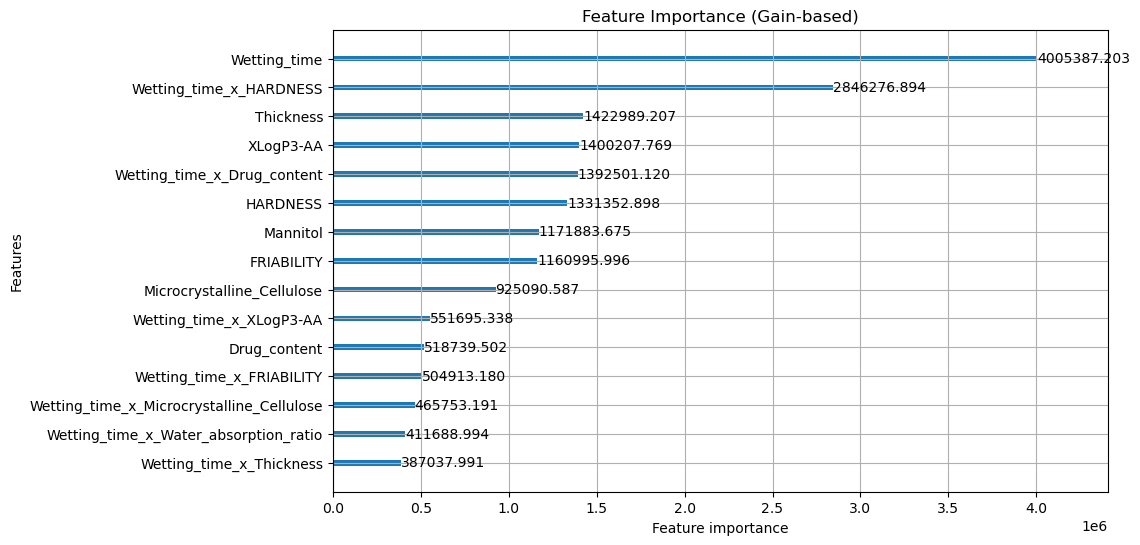

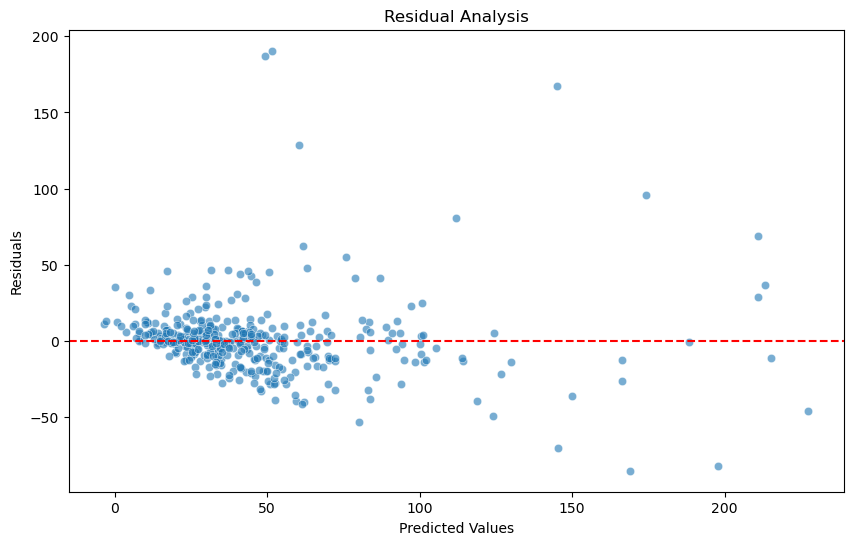

In [30]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import early_stopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load and prepare data
df = pd.read_csv("final Data All Exipients.csv")
df.columns = df.columns.str.replace(' ', '_')
X = df.drop(columns=['DISINTEGRATION_TIME'])
y = df['DISINTEGRATION_TIME']

# Split dataset with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=pd.qcut(y, q=5)  # Stratified split for skewed target
)

# Feature engineering pipeline
def create_features(X_df, top_features, key_feature):
    """Create interaction features dynamically"""
    X_processed = X_df[top_features].copy()
    for feature in top_features:
        if feature != key_feature:
            X_processed[f'{key_feature}_x_{feature}'] = X_df[key_feature] * X_df[feature]
    return X_processed

# Initial feature selection
base_model = lgb.LGBMRegressor(random_state=42, verbose=-1)
base_model.fit(X_train, y_train)

# Identify important features
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': base_model.feature_importances_
}).sort_values('Importance', ascending=False)

top_features = feature_importance.head(10)['Feature'].tolist()
key_feature = feature_importance.iloc[0]['Feature']

# Create enhanced features
X_train = create_features(X_train, top_features, key_feature)
X_test = create_features(X_test, top_features, key_feature)

# Optuna optimization with cross-validation
def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 31, 511),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 10.0, log=True),
        'verbosity': -1
    }
    
    model = lgb.LGBMRegressor(**params)
    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric = 'rmse',
        callbacks = [early_stopping(stopping_rounds=100)]
        
    )
    
    
    # Use best iteration from early stopping
    val_preds = model.predict(X_test, num_iteration=model.best_iteration_)
    return mean_squared_error(y_test, val_preds, squared=False)

# Optimize study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, timeout=3600)

# Best model training
best_params = study.best_params
best_params['verbosity'] = -1

final_model = lgb.LGBMRegressor(**best_params)
final_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric = 'rmse',
    callbacks = [early_stopping(stopping_rounds=100)]
    
)

# Ensemble with different seeds
ensemble_preds = np.column_stack([
    final_model.predict(X_test, num_iteration=final_model.best_iteration_),
    lgb.LGBMRegressor(**best_params, random_state=42).fit(X_train, y_train).predict(X_test),
    lgb.LGBMRegressor(**best_params, random_state=123).fit(X_train, y_train).predict(X_test)
])

# Trimmed mean ensemble
blended_preds = np.mean(np.sort(ensemble_preds, axis=1)[:, 1:-1], axis=1)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, blended_preds))
r2 = r2_score(y_test, blended_preds)
print(f"Ensemble Performance - RMSE: {rmse:.4f}, R²: {r2:.4f}")

# Feature importance visualization
lgb.plot_importance(final_model, figsize=(10, 6), max_num_features=15, importance_type='gain')
plt.title('Feature Importance (Gain-based)')
plt.show()

# Residual analysis
residuals = y_test - blended_preds
plt.figure(figsize=(10, 6))
sns.scatterplot(x=blended_preds, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

[I 2025-02-02 21:38:38,806] A new study created in memory with name: no-name-8037d04b-9ce8-4aa9-a0de-15c90cf917ee


Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:38:39,910] Trial 0 finished with value: 28.23458277878986 and parameters: {'n_estimators': 1387, 'learning_rate': 0.013995389610995243, 'num_leaves': 210, 'max_depth': 10, 'min_child_samples': 81, 'subsample': 0.6856605799408193, 'colsample_bytree': 0.6820371049770639, 'reg_alpha': 0.00010684951224065944, 'reg_lambda': 1.4818525802312875e-06}. Best is trial 0 with value: 28.23458277878986.


Did not meet early stopping. Best iteration is:
[1387]	valid_0's rmse: 28.2346
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:38:41,280] Trial 1 finished with value: 33.75843430757131 and parameters: {'n_estimators': 1754, 'learning_rate': 0.0017447290607541836, 'num_leaves': 311, 'max_depth': 7, 'min_child_samples': 75, 'subsample': 0.7883366864164605, 'colsample_bytree': 0.7900918557688189, 'reg_alpha': 3.950732568420996e-06, 'reg_lambda': 4.8238957012358874e-05}. Best is trial 0 with value: 28.23458277878986.


Did not meet early stopping. Best iteration is:
[1754]	valid_0's rmse: 33.7584
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:38:42,760] Trial 2 finished with value: 32.63275322942803 and parameters: {'n_estimators': 1060, 'learning_rate': 0.003059625141742225, 'num_leaves': 77, 'max_depth': 11, 'min_child_samples': 46, 'subsample': 0.8749242282285382, 'colsample_bytree': 0.6749244490395259, 'reg_alpha': 0.00019664290446956318, 'reg_lambda': 0.0012246608782977779}. Best is trial 0 with value: 28.23458277878986.


Did not meet early stopping. Best iteration is:
[1060]	valid_0's rmse: 32.6328
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:38:44,139] Trial 3 finished with value: 34.828973876982666 and parameters: {'n_estimators': 1834, 'learning_rate': 0.0010445653681059465, 'num_leaves': 214, 'max_depth': 7, 'min_child_samples': 90, 'subsample': 0.6094070140026427, 'colsample_bytree': 0.7470851324703732, 'reg_alpha': 6.10744795226276e-08, 'reg_lambda': 1.1555054330122654e-05}. Best is trial 0 with value: 28.23458277878986.


Did not meet early stopping. Best iteration is:
[1834]	valid_0's rmse: 34.829
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:38:45,309] Trial 4 finished with value: 27.534477954928516 and parameters: {'n_estimators': 1309, 'learning_rate': 0.020046070559508203, 'num_leaves': 445, 'max_depth': 8, 'min_child_samples': 83, 'subsample': 0.7695973957609703, 'colsample_bytree': 0.9027106290373217, 'reg_alpha': 1.8205620743911748, 'reg_lambda': 1.0426324722645415e-07}. Best is trial 4 with value: 27.534477954928516.


Did not meet early stopping. Best iteration is:
[1309]	valid_0's rmse: 27.5345
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:38:46,235] Trial 5 finished with value: 32.35335250270997 and parameters: {'n_estimators': 1291, 'learning_rate': 0.0038490142640127084, 'num_leaves': 109, 'max_depth': 6, 'min_child_samples': 39, 'subsample': 0.835816380375744, 'colsample_bytree': 0.6502171381967513, 'reg_alpha': 0.057017759359640215, 'reg_lambda': 1.556854215632168e-06}. Best is trial 4 with value: 27.534477954928516.


Did not meet early stopping. Best iteration is:
[1291]	valid_0's rmse: 32.3534
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:38:47,323] Trial 6 finished with value: 32.35606735361187 and parameters: {'n_estimators': 1530, 'learning_rate': 0.003181398926287141, 'num_leaves': 146, 'max_depth': 8, 'min_child_samples': 77, 'subsample': 0.6171923721034044, 'colsample_bytree': 0.6639675295584146, 'reg_alpha': 7.84985412987022e-06, 'reg_lambda': 0.0016445066926031309}. Best is trial 4 with value: 27.534477954928516.


Did not meet early stopping. Best iteration is:
[1530]	valid_0's rmse: 32.3561
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:38:47,934] Trial 7 finished with value: 34.71731472446286 and parameters: {'n_estimators': 1046, 'learning_rate': 0.0016235997722591356, 'num_leaves': 291, 'max_depth': 5, 'min_child_samples': 41, 'subsample': 0.8956512782539361, 'colsample_bytree': 0.6251635265565733, 'reg_alpha': 3.983369459347472e-09, 'reg_lambda': 4.912563336684715e-07}. Best is trial 4 with value: 27.534477954928516.


Did not meet early stopping. Best iteration is:
[1046]	valid_0's rmse: 34.7173
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1357]	valid_0's rmse: 26.2786


[I 2025-02-02 21:38:50,936] Trial 8 finished with value: 26.278602395995332 and parameters: {'n_estimators': 1660, 'learning_rate': 0.009706498689092298, 'num_leaves': 492, 'max_depth': 11, 'min_child_samples': 11, 'subsample': 0.8286555869153167, 'colsample_bytree': 0.897422167903333, 'reg_alpha': 5.019362664064839e-07, 'reg_lambda': 1.6714472119999646e-09}. Best is trial 8 with value: 26.278602395995332.


Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:38:52,215] Trial 9 finished with value: 34.659503749866865 and parameters: {'n_estimators': 797, 'learning_rate': 0.001612134973142811, 'num_leaves': 424, 'max_depth': 10, 'min_child_samples': 40, 'subsample': 0.7142690490497217, 'colsample_bytree': 0.7962974086172457, 'reg_alpha': 2.8211412674490784e-07, 'reg_lambda': 0.37146452033557914}. Best is trial 8 with value: 26.278602395995332.


Did not meet early stopping. Best iteration is:
[797]	valid_0's rmse: 34.6595
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:38:53,290] Trial 10 finished with value: 27.169025686296475 and parameters: {'n_estimators': 1982, 'learning_rate': 0.07866917056450394, 'num_leaves': 493, 'max_depth': 3, 'min_child_samples': 17, 'subsample': 0.9727573644778775, 'colsample_bytree': 0.9976393961297727, 'reg_alpha': 0.014360312726146752, 'reg_lambda': 1.713954473498432e-09}. Best is trial 8 with value: 26.278602395995332.


Did not meet early stopping. Best iteration is:
[1978]	valid_0's rmse: 27.169
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:38:54,126] Trial 11 finished with value: 26.200740089463935 and parameters: {'n_estimators': 1999, 'learning_rate': 0.08707203331634207, 'num_leaves': 504, 'max_depth': 3, 'min_child_samples': 10, 'subsample': 0.9724458893925827, 'colsample_bytree': 0.9643550826859849, 'reg_alpha': 0.008489068888668771, 'reg_lambda': 1.3454834099709296e-09}. Best is trial 11 with value: 26.200740089463935.


Early stopping, best iteration is:
[1469]	valid_0's rmse: 26.2007
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:38:55,022] Trial 12 finished with value: 25.977741177375375 and parameters: {'n_estimators': 1643, 'learning_rate': 0.04819141516286309, 'num_leaves': 388, 'max_depth': 12, 'min_child_samples': 10, 'subsample': 0.990795196454655, 'colsample_bytree': 0.9131014300458137, 'reg_alpha': 0.004540653190995013, 'reg_lambda': 1.2466373465038735e-09}. Best is trial 12 with value: 25.977741177375375.


Early stopping, best iteration is:
[299]	valid_0's rmse: 25.9777
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:38:55,850] Trial 13 finished with value: 28.266623433811127 and parameters: {'n_estimators': 1985, 'learning_rate': 0.0929461218068256, 'num_leaves': 379, 'max_depth': 3, 'min_child_samples': 25, 'subsample': 0.9880011075142086, 'colsample_bytree': 0.9999746285016438, 'reg_alpha': 0.007989840863445242, 'reg_lambda': 2.0763071343216938e-08}. Best is trial 12 with value: 25.977741177375375.


Did not meet early stopping. Best iteration is:
[1978]	valid_0's rmse: 28.2666
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1574]	valid_0's rmse: 26.4614


[I 2025-02-02 21:38:58,235] Trial 14 finished with value: 26.46135797180133 and parameters: {'n_estimators': 1576, 'learning_rate': 0.03927071143767165, 'num_leaves': 379, 'max_depth': 12, 'min_child_samples': 26, 'subsample': 0.9449472796354335, 'colsample_bytree': 0.9011700855042538, 'reg_alpha': 8.698362329263817, 'reg_lambda': 2.6789540652368275e-08}. Best is trial 12 with value: 25.977741177375375.


Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:38:58,604] Trial 15 finished with value: 28.756409044828477 and parameters: {'n_estimators': 509, 'learning_rate': 0.0405772843599114, 'num_leaves': 392, 'max_depth': 5, 'min_child_samples': 58, 'subsample': 0.9216279337100655, 'colsample_bytree': 0.9464095793216405, 'reg_alpha': 0.0012639548340945192, 'reg_lambda': 2.7170272058226512}. Best is trial 12 with value: 25.977741177375375.


Did not meet early stopping. Best iteration is:
[509]	valid_0's rmse: 28.7564
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:00,194] Trial 16 finished with value: 26.99327613444334 and parameters: {'n_estimators': 1797, 'learning_rate': 0.04926613796093045, 'num_leaves': 506, 'max_depth': 9, 'min_child_samples': 25, 'subsample': 0.9892664770673715, 'colsample_bytree': 0.8528585725648985, 'reg_alpha': 0.17154154570957716, 'reg_lambda': 1.5169924694919947e-09}. Best is trial 12 with value: 25.977741177375375.


Early stopping, best iteration is:
[1352]	valid_0's rmse: 26.9933
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:01,348] Trial 17 finished with value: 28.653885211161775 and parameters: {'n_estimators': 1887, 'learning_rate': 0.024723223633982737, 'num_leaves': 330, 'max_depth': 4, 'min_child_samples': 61, 'subsample': 0.9348498080340738, 'colsample_bytree': 0.9367741543858531, 'reg_alpha': 0.0013245775659533729, 'reg_lambda': 0.007128372909938677}. Best is trial 12 with value: 25.977741177375375.


Did not meet early stopping. Best iteration is:
[1873]	valid_0's rmse: 28.6539
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:02,450] Trial 18 finished with value: 25.964476894700333 and parameters: {'n_estimators': 1481, 'learning_rate': 0.06151313452011143, 'num_leaves': 451, 'max_depth': 12, 'min_child_samples': 10, 'subsample': 0.8602743520722055, 'colsample_bytree': 0.8488740493927571, 'reg_alpha': 1.0329185164277166, 'reg_lambda': 2.1853612116008084e-08}. Best is trial 18 with value: 25.964476894700333.


Early stopping, best iteration is:
[271]	valid_0's rmse: 25.9645
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:03,778] Trial 19 finished with value: 30.84897889726149 and parameters: {'n_estimators': 1480, 'learning_rate': 0.007019024615416082, 'num_leaves': 237, 'max_depth': 12, 'min_child_samples': 99, 'subsample': 0.882719814780986, 'colsample_bytree': 0.853156395443761, 'reg_alpha': 0.6688430366291065, 'reg_lambda': 2.3420866626634573e-08}. Best is trial 18 with value: 25.964476894700333.


Did not meet early stopping. Best iteration is:
[1480]	valid_0's rmse: 30.849
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:05,439] Trial 20 finished with value: 27.272812266722866 and parameters: {'n_estimators': 1078, 'learning_rate': 0.02514008789779885, 'num_leaves': 341, 'max_depth': 11, 'min_child_samples': 20, 'subsample': 0.7450149909597292, 'colsample_bytree': 0.8405946281870721, 'reg_alpha': 0.294323385584404, 'reg_lambda': 9.974041419026472e-06}. Best is trial 18 with value: 25.964476894700333.


Did not meet early stopping. Best iteration is:
[1077]	valid_0's rmse: 27.2728
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:06,155] Trial 21 finished with value: 26.072940504159597 and parameters: {'n_estimators': 1675, 'learning_rate': 0.06229534565806418, 'num_leaves': 449, 'max_depth': 12, 'min_child_samples': 10, 'subsample': 0.951719183600262, 'colsample_bytree': 0.9544831312216395, 'reg_alpha': 0.011285652274209726, 'reg_lambda': 9.21797311755695e-09}. Best is trial 18 with value: 25.964476894700333.


Early stopping, best iteration is:
[180]	valid_0's rmse: 26.0729
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:07,866] Trial 22 finished with value: 26.49849866929909 and parameters: {'n_estimators': 1653, 'learning_rate': 0.05426714942117839, 'num_leaves': 459, 'max_depth': 12, 'min_child_samples': 30, 'subsample': 0.8588295441891919, 'colsample_bytree': 0.8694233298101727, 'reg_alpha': 0.04305456437547329, 'reg_lambda': 1.383292290388042e-07}. Best is trial 18 with value: 25.964476894700333.


Early stopping, best iteration is:
[1239]	valid_0's rmse: 26.4985
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:09,660] Trial 23 finished with value: 27.404924841474603 and parameters: {'n_estimators': 1436, 'learning_rate': 0.0320836847562282, 'num_leaves': 426, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9192708102270941, 'colsample_bytree': 0.9322613469373546, 'reg_alpha': 0.0013725807914079131, 'reg_lambda': 8.848378702662611e-09}. Best is trial 18 with value: 25.964476894700333.


Did not meet early stopping. Best iteration is:
[1381]	valid_0's rmse: 27.4049
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:11,068] Trial 24 finished with value: 26.493584252162254 and parameters: {'n_estimators': 1678, 'learning_rate': 0.06240296351654744, 'num_leaves': 362, 'max_depth': 12, 'min_child_samples': 33, 'subsample': 0.9531628220937222, 'colsample_bytree': 0.8246623494233022, 'reg_alpha': 5.848425939586736, 'reg_lambda': 1.6238864554289848e-07}. Best is trial 18 with value: 25.964476894700333.


Early stopping, best iteration is:
[971]	valid_0's rmse: 26.4936
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:13,409] Trial 25 finished with value: 25.885923308081423 and parameters: {'n_estimators': 1153, 'learning_rate': 0.017897931702962826, 'num_leaves': 412, 'max_depth': 11, 'min_child_samples': 10, 'subsample': 0.8289308380282379, 'colsample_bytree': 0.7300896836185694, 'reg_alpha': 1.37801420679677e-05, 'reg_lambda': 9.877906613960264e-09}. Best is trial 25 with value: 25.885923308081423.


Did not meet early stopping. Best iteration is:
[1085]	valid_0's rmse: 25.8859
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:14,715] Trial 26 finished with value: 27.42432212696851 and parameters: {'n_estimators': 1146, 'learning_rate': 0.01582830204888337, 'num_leaves': 413, 'max_depth': 9, 'min_child_samples': 19, 'subsample': 0.8181848115010751, 'colsample_bytree': 0.7505114959492777, 'reg_alpha': 1.1745240758337446e-05, 'reg_lambda': 1.102794637760821e-06}. Best is trial 25 with value: 25.885923308081423.


Did not meet early stopping. Best iteration is:
[1136]	valid_0's rmse: 27.4243
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:15,672] Trial 27 finished with value: 29.358949306570167 and parameters: {'n_estimators': 909, 'learning_rate': 0.009169220504412488, 'num_leaves': 254, 'max_depth': 11, 'min_child_samples': 51, 'subsample': 0.8493050818349513, 'colsample_bytree': 0.7071751388301372, 'reg_alpha': 2.3545070662317847e-05, 'reg_lambda': 8.429520277545613e-09}. Best is trial 25 with value: 25.885923308081423.


Did not meet early stopping. Best iteration is:
[909]	valid_0's rmse: 29.3589
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:16,899] Trial 28 finished with value: 27.10694295319588 and parameters: {'n_estimators': 1167, 'learning_rate': 0.033793203393447116, 'num_leaves': 462, 'max_depth': 9, 'min_child_samples': 19, 'subsample': 0.7610509394890947, 'colsample_bytree': 0.7291811159077163, 'reg_alpha': 0.00032262354307692346, 'reg_lambda': 6.030452802390734e-08}. Best is trial 25 with value: 25.885923308081423.


Did not meet early stopping. Best iteration is:
[1165]	valid_0's rmse: 27.1069
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:18,366] Trial 29 finished with value: 27.80877772976916 and parameters: {'n_estimators': 1388, 'learning_rate': 0.013963578490715025, 'num_leaves': 354, 'max_depth': 10, 'min_child_samples': 33, 'subsample': 0.6505967518662752, 'colsample_bytree': 0.7773870034327819, 'reg_alpha': 1.7210479706031115e-06, 'reg_lambda': 4.376876646074145e-06}. Best is trial 25 with value: 25.885923308081423.


Did not meet early stopping. Best iteration is:
[1386]	valid_0's rmse: 27.8088
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:19,624] Trial 30 finished with value: 28.238207152403632 and parameters: {'n_estimators': 914, 'learning_rate': 0.014320712707751608, 'num_leaves': 402, 'max_depth': 11, 'min_child_samples': 16, 'subsample': 0.7965488154954243, 'colsample_bytree': 0.8219509445945845, 'reg_alpha': 0.00015541069028763427, 'reg_lambda': 0.00014142818798504165}. Best is trial 25 with value: 25.885923308081423.


Did not meet early stopping. Best iteration is:
[889]	valid_0's rmse: 28.2382
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:20,477] Trial 31 finished with value: 25.908765963928243 and parameters: {'n_estimators': 1346, 'learning_rate': 0.06374737416269563, 'num_leaves': 455, 'max_depth': 12, 'min_child_samples': 10, 'subsample': 0.8955504657515382, 'colsample_bytree': 0.8777562795275725, 'reg_alpha': 6.688203162554646e-05, 'reg_lambda': 6.3567628449217785e-09}. Best is trial 25 with value: 25.885923308081423.


Early stopping, best iteration is:
[230]	valid_0's rmse: 25.9088
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:21,917] Trial 32 finished with value: 27.115117506816475 and parameters: {'n_estimators': 1333, 'learning_rate': 0.06949466569314368, 'num_leaves': 475, 'max_depth': 12, 'min_child_samples': 13, 'subsample': 0.9059007319562692, 'colsample_bytree': 0.8777443599933417, 'reg_alpha': 5.420787403785687e-05, 'reg_lambda': 6.9391836535442794e-09}. Best is trial 25 with value: 25.885923308081423.


Early stopping, best iteration is:
[620]	valid_0's rmse: 27.1151
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:23,443] Trial 33 finished with value: 26.575428164027688 and parameters: {'n_estimators': 1441, 'learning_rate': 0.046840834966513166, 'num_leaves': 296, 'max_depth': 11, 'min_child_samples': 64, 'subsample': 0.8586870308016409, 'colsample_bytree': 0.7692425418484222, 'reg_alpha': 2.0887153601316647e-06, 'reg_lambda': 5.382255942963187e-09}. Best is trial 25 with value: 25.885923308081423.


Early stopping, best iteration is:
[1189]	valid_0's rmse: 26.5754
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:25,298] Trial 34 finished with value: 26.86932335098956 and parameters: {'n_estimators': 1191, 'learning_rate': 0.027405273886062356, 'num_leaves': 429, 'max_depth': 11, 'min_child_samples': 24, 'subsample': 0.8106317320248466, 'colsample_bytree': 0.6957631713822755, 'reg_alpha': 0.0008328050297665341, 'reg_lambda': 5.9488774372660025e-08}. Best is trial 25 with value: 25.885923308081423.


Did not meet early stopping. Best iteration is:
[1190]	valid_0's rmse: 26.8693
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1543]	valid_0's rmse: 26.4578


[I 2025-02-02 21:39:28,975] Trial 35 finished with value: 26.457756610444665 and parameters: {'n_estimators': 1543, 'learning_rate': 0.00573344076047135, 'num_leaves': 313, 'max_depth': 12, 'min_child_samples': 10, 'subsample': 0.8788659211931972, 'colsample_bytree': 0.823703704016899, 'reg_alpha': 4.902622619508252e-05, 'reg_lambda': 3.9472923956182693e-07}. Best is trial 25 with value: 25.885923308081423.


Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:30,147] Trial 36 finished with value: 27.422887132722643 and parameters: {'n_estimators': 1221, 'learning_rate': 0.019098888815228632, 'num_leaves': 472, 'max_depth': 10, 'min_child_samples': 68, 'subsample': 0.7715513436756373, 'colsample_bytree': 0.8800267296792362, 'reg_alpha': 3.27867388050611e-08, 'reg_lambda': 0.00012020928947978098}. Best is trial 25 with value: 25.885923308081423.


Did not meet early stopping. Best iteration is:
[1218]	valid_0's rmse: 27.4229
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:30,952] Trial 37 finished with value: 26.73819406163274 and parameters: {'n_estimators': 1365, 'learning_rate': 0.09685044537017837, 'num_leaves': 38, 'max_depth': 10, 'min_child_samples': 21, 'subsample': 0.8492171578594566, 'colsample_bytree': 0.9153297132167711, 'reg_alpha': 1.3280006934128024, 'reg_lambda': 4.274435603986708e-09}. Best is trial 25 with value: 25.885923308081423.


Early stopping, best iteration is:
[573]	valid_0's rmse: 26.7382
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:32,776] Trial 38 finished with value: 26.817171628966133 and parameters: {'n_estimators': 1571, 'learning_rate': 0.0420833008012036, 'num_leaves': 179, 'max_depth': 11, 'min_child_samples': 31, 'subsample': 0.7910385464053238, 'colsample_bytree': 0.8080278603043753, 'reg_alpha': 0.00045711593254200777, 'reg_lambda': 2.6970776835628265e-07}. Best is trial 25 with value: 25.885923308081423.


Did not meet early stopping. Best iteration is:
[1566]	valid_0's rmse: 26.8172
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:33,736] Trial 39 finished with value: 26.96755995236055 and parameters: {'n_estimators': 1254, 'learning_rate': 0.056878371417360137, 'num_leaves': 399, 'max_depth': 7, 'min_child_samples': 47, 'subsample': 0.9017455944378633, 'colsample_bytree': 0.7302920478492922, 'reg_alpha': 7.237862695281421e-06, 'reg_lambda': 1.481456074911619e-06}. Best is trial 25 with value: 25.885923308081423.


Did not meet early stopping. Best iteration is:
[1253]	valid_0's rmse: 26.9676
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:35,230] Trial 40 finished with value: 26.51162329041674 and parameters: {'n_estimators': 1761, 'learning_rate': 0.03165739534452723, 'num_leaves': 370, 'max_depth': 8, 'min_child_samples': 14, 'subsample': 0.8301900251379891, 'colsample_bytree': 0.9160578122038391, 'reg_alpha': 0.003734811159705946, 'reg_lambda': 0.04956421685999201}. Best is trial 25 with value: 25.885923308081423.


Early stopping, best iteration is:
[1236]	valid_0's rmse: 26.5116
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:36,354] Trial 41 finished with value: 25.86613518050499 and parameters: {'n_estimators': 1686, 'learning_rate': 0.06996239001811576, 'num_leaves': 442, 'max_depth': 12, 'min_child_samples': 10, 'subsample': 0.9580432769825713, 'colsample_bytree': 0.9618321846452991, 'reg_alpha': 0.05830664575426657, 'reg_lambda': 2.769075180564992e-08}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[290]	valid_0's rmse: 25.8661
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:37,371] Trial 42 finished with value: 26.362043301432898 and parameters: {'n_estimators': 1883, 'learning_rate': 0.0712217287995625, 'num_leaves': 440, 'max_depth': 12, 'min_child_samples': 14, 'subsample': 0.9961132941064227, 'colsample_bytree': 0.9675884482258187, 'reg_alpha': 0.06864365559811496, 'reg_lambda': 2.8120651467894183e-08}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[321]	valid_0's rmse: 26.362
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:38,937] Trial 43 finished with value: 26.56341275897843 and parameters: {'n_estimators': 1617, 'learning_rate': 0.07481440365751989, 'num_leaves': 472, 'max_depth': 11, 'min_child_samples': 22, 'subsample': 0.9690701086852774, 'colsample_bytree': 0.9848608802628791, 'reg_alpha': 0.20204818877254482, 'reg_lambda': 2.3296218890875375e-09}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[659]	valid_0's rmse: 26.5634
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:41,485] Trial 44 finished with value: 26.813866275179468 and parameters: {'n_estimators': 1491, 'learning_rate': 0.020605942349154752, 'num_leaves': 413, 'max_depth': 12, 'min_child_samples': 28, 'subsample': 0.9237452304958771, 'colsample_bytree': 0.8892924641288286, 'reg_alpha': 0.031554041673423606, 'reg_lambda': 1.1752098558298297e-09}. Best is trial 41 with value: 25.86613518050499.


Did not meet early stopping. Best iteration is:
[1491]	valid_0's rmse: 26.8139
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:42,769] Trial 45 finished with value: 26.745824859110268 and parameters: {'n_estimators': 1705, 'learning_rate': 0.049986052293252814, 'num_leaves': 444, 'max_depth': 11, 'min_child_samples': 37, 'subsample': 0.8918620922366316, 'colsample_bytree': 0.6077569030002964, 'reg_alpha': 0.0032616192606512626, 'reg_lambda': 3.9164320655224264e-08}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[884]	valid_0's rmse: 26.7458
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:44,137] Trial 46 finished with value: 26.95104621634814 and parameters: {'n_estimators': 1274, 'learning_rate': 0.09602232344656704, 'num_leaves': 492, 'max_depth': 12, 'min_child_samples': 15, 'subsample': 0.8693280941014081, 'colsample_bytree': 0.9257691507866551, 'reg_alpha': 3.786192085993502, 'reg_lambda': 1.2639585765723602e-08}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[482]	valid_0's rmse: 26.951
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:45,233] Trial 47 finished with value: 26.122298534740864 and parameters: {'n_estimators': 1393, 'learning_rate': 0.03729339271676035, 'num_leaves': 389, 'max_depth': 6, 'min_child_samples': 10, 'subsample': 0.9801004133730071, 'colsample_bytree': 0.8653528593003085, 'reg_alpha': 5.47813032664614e-07, 'reg_lambda': 3.8827417303601565e-05}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[888]	valid_0's rmse: 26.1223
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1034]	valid_0's rmse: 30.1568


[I 2025-02-02 21:39:47,182] Trial 48 finished with value: 30.156786233056128 and parameters: {'n_estimators': 1034, 'learning_rate': 0.002303596557628598, 'num_leaves': 483, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9543633159430317, 'colsample_bytree': 0.6565878082856276, 'reg_alpha': 0.6916783812940858, 'reg_lambda': 3.461913984695888e-09}. Best is trial 41 with value: 25.86613518050499.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1810]	valid_0's rmse: 29.1325


[I 2025-02-02 21:39:54,084] Trial 49 finished with value: 29.132497064213116 and parameters: {'n_estimators': 1810, 'learning_rate': 0.0011209845939761445, 'num_leaves': 431, 'max_depth': 12, 'min_child_samples': 14, 'subsample': 0.93648097826244, 'colsample_bytree': 0.9767643274257201, 'reg_alpha': 0.10380745735313433, 'reg_lambda': 6.57191989416781e-08}. Best is trial 41 with value: 25.86613518050499.


Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:54,929] Trial 50 finished with value: 26.271263755376033 and parameters: {'n_estimators': 1722, 'learning_rate': 0.08246122792388455, 'num_leaves': 328, 'max_depth': 12, 'min_child_samples': 87, 'subsample': 0.9080046175992939, 'colsample_bytree': 0.908971794852993, 'reg_alpha': 7.07083577066023e-05, 'reg_lambda': 1.1020888733235534e-09}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[832]	valid_0's rmse: 26.2713
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:55,663] Trial 51 finished with value: 26.090896513995837 and parameters: {'n_estimators': 1604, 'learning_rate': 0.06378808785628293, 'num_leaves': 461, 'max_depth': 11, 'min_child_samples': 10, 'subsample': 0.9630598468450503, 'colsample_bytree': 0.9469499927404431, 'reg_alpha': 0.010495064521842712, 'reg_lambda': 1.4128666905761133e-08}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[229]	valid_0's rmse: 26.0909
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:56,847] Trial 52 finished with value: 26.69469972476115 and parameters: {'n_estimators': 1508, 'learning_rate': 0.05915770866877348, 'num_leaves': 445, 'max_depth': 12, 'min_child_samples': 22, 'subsample': 0.998275718013518, 'colsample_bytree': 0.956607339417579, 'reg_alpha': 0.004585459592499394, 'reg_lambda': 3.61558319443246e-09}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[741]	valid_0's rmse: 26.6947
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:57,907] Trial 53 finished with value: 26.32446747646251 and parameters: {'n_estimators': 1630, 'learning_rate': 0.049183959056095496, 'num_leaves': 505, 'max_depth': 12, 'min_child_samples': 12, 'subsample': 0.9415994645689335, 'colsample_bytree': 0.8454074013493559, 'reg_alpha': 0.015581049702769486, 'reg_lambda': 1.625380609080255e-08}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[439]	valid_0's rmse: 26.3245
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:58,810] Trial 54 finished with value: 27.00688450001336 and parameters: {'n_estimators': 1875, 'learning_rate': 0.0785912479696195, 'num_leaves': 451, 'max_depth': 11, 'min_child_samples': 17, 'subsample': 0.9241977184838807, 'colsample_bytree': 0.8993730551200638, 'reg_alpha': 0.4391988535908554, 'reg_lambda': 1.337319742726685e-07}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[503]	valid_0's rmse: 27.0069
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:39:59,570] Trial 55 finished with value: 27.32585003450016 and parameters: {'n_estimators': 1445, 'learning_rate': 0.042213593227955384, 'num_leaves': 408, 'max_depth': 12, 'min_child_samples': 27, 'subsample': 0.9551376852582665, 'colsample_bytree': 0.9406663996511392, 'reg_alpha': 0.03543135923098618, 'reg_lambda': 5.943761216041499e-07}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[402]	valid_0's rmse: 27.3259
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1757]	valid_0's rmse: 26.6801


[I 2025-02-02 21:40:03,150] Trial 56 finished with value: 26.680058620427534 and parameters: {'n_estimators': 1757, 'learning_rate': 0.004560244360451088, 'num_leaves': 421, 'max_depth': 12, 'min_child_samples': 12, 'subsample': 0.975146229442016, 'colsample_bytree': 0.8909923414951785, 'reg_alpha': 1.5260796454651384, 'reg_lambda': 4.526345971600521e-09}. Best is trial 41 with value: 25.86613518050499.


Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:04,965] Trial 57 finished with value: 27.549747691764708 and parameters: {'n_estimators': 1327, 'learning_rate': 0.028098357375784366, 'num_leaves': 382, 'max_depth': 11, 'min_child_samples': 23, 'subsample': 0.8446228559531671, 'colsample_bytree': 0.9239238387641371, 'reg_alpha': 2.558713753865563e-05, 'reg_lambda': 0.0004377337163636361}. Best is trial 41 with value: 25.86613518050499.


Did not meet early stopping. Best iteration is:
[1327]	valid_0's rmse: 27.5497
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:06,449] Trial 58 finished with value: 25.874562581304758 and parameters: {'n_estimators': 1535, 'learning_rate': 0.06282849151789598, 'num_leaves': 490, 'max_depth': 12, 'min_child_samples': 74, 'subsample': 0.8891717805490518, 'colsample_bytree': 0.9843499035093636, 'reg_alpha': 0.0002669513719455399, 'reg_lambda': 3.3628659991377635e-08}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[1431]	valid_0's rmse: 25.8746
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:07,213] Trial 59 finished with value: 26.218407547987063 and parameters: {'n_estimators': 1108, 'learning_rate': 0.0866130102690855, 'num_leaves': 485, 'max_depth': 10, 'min_child_samples': 76, 'subsample': 0.8827107775148373, 'colsample_bytree': 0.98599353871958, 'reg_alpha': 0.0007085349824644067, 'reg_lambda': 9.573812280806958e-08}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[675]	valid_0's rmse: 26.2184
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:08,166] Trial 60 finished with value: 27.044220120408824 and parameters: {'n_estimators': 978, 'learning_rate': 0.03643204070923203, 'num_leaves': 510, 'max_depth': 11, 'min_child_samples': 80, 'subsample': 0.813276721275261, 'colsample_bytree': 0.9655519778683742, 'reg_alpha': 0.00020948744398938623, 'reg_lambda': 2.5565312005682242e-08}. Best is trial 41 with value: 25.86613518050499.


Did not meet early stopping. Best iteration is:
[977]	valid_0's rmse: 27.0442
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:09,026] Trial 61 finished with value: 26.573031980545224 and parameters: {'n_estimators': 1556, 'learning_rate': 0.06948007880720929, 'num_leaves': 459, 'max_depth': 12, 'min_child_samples': 99, 'subsample': 0.8632319270188213, 'colsample_bytree': 0.9998199936342715, 'reg_alpha': 0.002537295893495756, 'reg_lambda': 8.893887197982653e-09}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[959]	valid_0's rmse: 26.573
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:10,169] Trial 62 finished with value: 26.16543108169741 and parameters: {'n_estimators': 1670, 'learning_rate': 0.05417548962206785, 'num_leaves': 437, 'max_depth': 12, 'min_child_samples': 71, 'subsample': 0.8911204551075778, 'colsample_bytree': 0.9531578144365827, 'reg_alpha': 0.0222074725015956, 'reg_lambda': 2.3308253268198553e-09}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[980]	valid_0's rmse: 26.1654
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:12,279] Trial 63 finished with value: 27.55964190643289 and parameters: {'n_estimators': 1514, 'learning_rate': 0.010979879150735217, 'num_leaves': 467, 'max_depth': 12, 'min_child_samples': 56, 'subsample': 0.9166645758381952, 'colsample_bytree': 0.9774906851824147, 'reg_alpha': 2.2923873290466922e-05, 'reg_lambda': 4.22051466306309e-06}. Best is trial 41 with value: 25.86613518050499.


Did not meet early stopping. Best iteration is:
[1514]	valid_0's rmse: 27.5596
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:13,571] Trial 64 finished with value: 26.53927702586954 and parameters: {'n_estimators': 1432, 'learning_rate': 0.06292911218986012, 'num_leaves': 492, 'max_depth': 11, 'min_child_samples': 93, 'subsample': 0.8372841465209208, 'colsample_bytree': 0.93949292184652, 'reg_alpha': 0.00021164736088209661, 'reg_lambda': 2.6145089485249765e-07}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[1093]	valid_0's rmse: 26.5393
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:14,114] Trial 65 finished with value: 26.980714950498264 and parameters: {'n_estimators': 593, 'learning_rate': 0.04533562180104764, 'num_leaves': 344, 'max_depth': 6, 'min_child_samples': 17, 'subsample': 0.9824486006009331, 'colsample_bytree': 0.8364207850816741, 'reg_alpha': 0.12519790139071937, 'reg_lambda': 3.2605044683052405e-08}. Best is trial 41 with value: 25.86613518050499.


Did not meet early stopping. Best iteration is:
[593]	valid_0's rmse: 26.9807
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:15,042] Trial 66 finished with value: 26.029449677697617 and parameters: {'n_estimators': 1615, 'learning_rate': 0.05428767305291404, 'num_leaves': 420, 'max_depth': 12, 'min_child_samples': 10, 'subsample': 0.9315581394086648, 'colsample_bytree': 0.8747456491718445, 'reg_alpha': 3.8174806417421235e-06, 'reg_lambda': 1.001009206000225e-09}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[263]	valid_0's rmse: 26.0294
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:16,387] Trial 67 finished with value: 27.602496863454295 and parameters: {'n_estimators': 1593, 'learning_rate': 0.030389884524762364, 'num_leaves': 416, 'max_depth': 11, 'min_child_samples': 19, 'subsample': 0.9335516276012176, 'colsample_bytree': 0.8662996657231816, 'reg_alpha': 4.383467039701711e-06, 'reg_lambda': 2.21160250697065e-09}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[945]	valid_0's rmse: 27.6025
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1058]	valid_0's rmse: 26.653


[I 2025-02-02 21:40:18,328] Trial 68 finished with value: 26.653005201821202 and parameters: {'n_estimators': 1303, 'learning_rate': 0.02105425939693336, 'num_leaves': 395, 'max_depth': 12, 'min_child_samples': 13, 'subsample': 0.6968660705352918, 'colsample_bytree': 0.8530832412182073, 'reg_alpha': 1.4325628192516634e-06, 'reg_lambda': 1.1485294141861165e-09}. Best is trial 41 with value: 25.86613518050499.


Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:19,027] Trial 69 finished with value: 26.75897004000944 and parameters: {'n_estimators': 1941, 'learning_rate': 0.08541325137954066, 'num_leaves': 116, 'max_depth': 9, 'min_child_samples': 10, 'subsample': 0.8750703968607272, 'colsample_bytree': 0.6742802260498922, 'reg_alpha': 1.3186796666760144e-07, 'reg_lambda': 7.504581875991783e-09}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[248]	valid_0's rmse: 26.759
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:20,673] Trial 70 finished with value: 26.793665947384547 and parameters: {'n_estimators': 1722, 'learning_rate': 0.053665716902418344, 'num_leaves': 372, 'max_depth': 12, 'min_child_samples': 46, 'subsample': 0.9135228384192079, 'colsample_bytree': 0.7991814914152573, 'reg_alpha': 1.3994384993291158e-09, 'reg_lambda': 0.00490266012113929}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[1093]	valid_0's rmse: 26.7937
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:21,915] Trial 71 finished with value: 27.646441579711972 and parameters: {'n_estimators': 1662, 'learning_rate': 0.06624147517240433, 'num_leaves': 455, 'max_depth': 12, 'min_child_samples': 16, 'subsample': 0.9470158998561875, 'colsample_bytree': 0.8716395737339598, 'reg_alpha': 9.330709322812623e-06, 'reg_lambda': 1.4979893121986245e-08}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[581]	valid_0's rmse: 27.6464
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:22,641] Trial 72 finished with value: 27.398105987130823 and parameters: {'n_estimators': 1466, 'learning_rate': 0.0996588860941204, 'num_leaves': 432, 'max_depth': 12, 'min_child_samples': 12, 'subsample': 0.9648949793689042, 'colsample_bytree': 0.8922928952637228, 'reg_alpha': 0.00013133000393416653, 'reg_lambda': 5.1312684739702525e-09}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[170]	valid_0's rmse: 27.3981
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:24,044] Trial 73 finished with value: 27.13946760982958 and parameters: {'n_estimators': 1549, 'learning_rate': 0.044939278865207884, 'num_leaves': 478, 'max_depth': 11, 'min_child_samples': 20, 'subsample': 0.931900569287316, 'colsample_bytree': 0.928269673294073, 'reg_alpha': 3.212192099399903e-05, 'reg_lambda': 5.6094989129135e-08}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[716]	valid_0's rmse: 27.1395
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:25,306] Trial 74 finished with value: 26.724995265294755 and parameters: {'n_estimators': 1392, 'learning_rate': 0.061850101760012766, 'num_leaves': 406, 'max_depth': 12, 'min_child_samples': 15, 'subsample': 0.8964989330215991, 'colsample_bytree': 0.912441537021477, 'reg_alpha': 0.001660156167174428, 'reg_lambda': 2.7561913234770635e-09}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[635]	valid_0's rmse: 26.725
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:26,285] Trial 75 finished with value: 26.822643947199648 and parameters: {'n_estimators': 1211, 'learning_rate': 0.03657335444381273, 'num_leaves': 206, 'max_depth': 11, 'min_child_samples': 13, 'subsample': 0.8265764627521534, 'colsample_bytree': 0.8125222032565846, 'reg_alpha': 0.007817739563276907, 'reg_lambda': 1.3793269592739586e-08}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[583]	valid_0's rmse: 26.8226
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:26,993] Trial 76 finished with value: 26.40165506376948 and parameters: {'n_estimators': 1796, 'learning_rate': 0.07641605119958543, 'num_leaves': 445, 'max_depth': 12, 'min_child_samples': 10, 'subsample': 0.8595559100276888, 'colsample_bytree': 0.8804765676999542, 'reg_alpha': 2.855614255427692e-06, 'reg_lambda': 6.905592514157763e-07}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[211]	valid_0's rmse: 26.4017
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:27,836] Trial 77 finished with value: 27.979005423947545 and parameters: {'n_estimators': 1694, 'learning_rate': 0.053795900466642906, 'num_leaves': 423, 'max_depth': 4, 'min_child_samples': 61, 'subsample': 0.9537302732396341, 'colsample_bytree': 0.9590921191913726, 'reg_alpha': 1.2238818159177706e-05, 'reg_lambda': 1.0019362128301478e-09}. Best is trial 41 with value: 25.86613518050499.


Did not meet early stopping. Best iteration is:
[1603]	valid_0's rmse: 27.979
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:29,873] Trial 78 finished with value: 26.592098929567438 and parameters: {'n_estimators': 1616, 'learning_rate': 0.04231143849121945, 'num_leaves': 498, 'max_depth': 11, 'min_child_samples': 18, 'subsample': 0.9842930058861492, 'colsample_bytree': 0.7770169008553346, 'reg_alpha': 1.2976780865806667e-06, 'reg_lambda': 1.5366855208994639}. Best is trial 41 with value: 25.86613518050499.


Did not meet early stopping. Best iteration is:
[1524]	valid_0's rmse: 26.5921
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:30,501] Trial 79 finished with value: 26.723840338918297 and parameters: {'n_estimators': 1352, 'learning_rate': 0.07085348482745678, 'num_leaves': 361, 'max_depth': 12, 'min_child_samples': 15, 'subsample': 0.8900683546483265, 'colsample_bytree': 0.9750758143344354, 'reg_alpha': 9.394656397010397e-05, 'reg_lambda': 6.016360191335393e-09}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[232]	valid_0's rmse: 26.7238
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1520]	valid_0's rmse: 28.1997


[I 2025-02-02 21:40:32,671] Trial 80 finished with value: 28.199729049086734 and parameters: {'n_estimators': 1520, 'learning_rate': 0.007593722060115112, 'num_leaves': 388, 'max_depth': 12, 'min_child_samples': 24, 'subsample': 0.905954379955145, 'colsample_bytree': 0.90509352399637, 'reg_alpha': 0.0005019863148268206, 'reg_lambda': 4.151742911370132e-08}. Best is trial 41 with value: 25.86613518050499.


Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:33,976] Trial 81 finished with value: 26.144602671426885 and parameters: {'n_estimators': 1643, 'learning_rate': 0.060291528186289266, 'num_leaves': 465, 'max_depth': 11, 'min_child_samples': 10, 'subsample': 0.9637926264091554, 'colsample_bytree': 0.9468315408631123, 'reg_alpha': 0.007837313904283275, 'reg_lambda': 9.731618274337358e-09}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[500]	valid_0's rmse: 26.1446
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:34,935] Trial 82 finished with value: 26.66040146647572 and parameters: {'n_estimators': 1588, 'learning_rate': 0.049993240320549366, 'num_leaves': 457, 'max_depth': 11, 'min_child_samples': 12, 'subsample': 0.9614380943132944, 'colsample_bytree': 0.9872689270758205, 'reg_alpha': 0.014456428062404127, 'reg_lambda': 2.1213666002249974e-08}. Best is trial 41 with value: 25.86613518050499.


Early stopping, best iteration is:
[407]	valid_0's rmse: 26.6604
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:35,891] Trial 83 finished with value: 25.79031384920635 and parameters: {'n_estimators': 1739, 'learning_rate': 0.06881941954526885, 'num_leaves': 479, 'max_depth': 10, 'min_child_samples': 10, 'subsample': 0.9451182862746246, 'colsample_bytree': 0.9194464186523229, 'reg_alpha': 0.05998850443135975, 'reg_lambda': 1.7812423394111128e-09}. Best is trial 83 with value: 25.79031384920635.


Early stopping, best iteration is:
[395]	valid_0's rmse: 25.7903
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:36,524] Trial 84 finished with value: 26.16703383312496 and parameters: {'n_estimators': 1745, 'learning_rate': 0.08708807616130952, 'num_leaves': 483, 'max_depth': 10, 'min_child_samples': 72, 'subsample': 0.9416845481914567, 'colsample_bytree': 0.9206125012815493, 'reg_alpha': 0.041916674341799125, 'reg_lambda': 1.892702880692785e-09}. Best is trial 83 with value: 25.79031384920635.


Early stopping, best iteration is:
[527]	valid_0's rmse: 26.167
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:37,712] Trial 85 finished with value: 27.19825593540891 and parameters: {'n_estimators': 1834, 'learning_rate': 0.07582634047779152, 'num_leaves': 434, 'max_depth': 12, 'min_child_samples': 20, 'subsample': 0.9934385064197852, 'colsample_bytree': 0.934098785262917, 'reg_alpha': 0.06764120984087278, 'reg_lambda': 3.554296106973145e-09}. Best is trial 83 with value: 25.79031384920635.


Early stopping, best iteration is:
[722]	valid_0's rmse: 27.1983
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:38,399] Trial 86 finished with value: 27.207193086537906 and parameters: {'n_estimators': 1773, 'learning_rate': 0.05729698362811991, 'num_leaves': 472, 'max_depth': 8, 'min_child_samples': 15, 'subsample': 0.9266677880465606, 'colsample_bytree': 0.634869605690618, 'reg_alpha': 6.186178458479692e-07, 'reg_lambda': 1.909007988720302e-09}. Best is trial 83 with value: 25.79031384920635.


Early stopping, best iteration is:
[490]	valid_0's rmse: 27.2072
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:39,667] Trial 87 finished with value: 26.201614663717297 and parameters: {'n_estimators': 1843, 'learning_rate': 0.03871492569868231, 'num_leaves': 443, 'max_depth': 12, 'min_child_samples': 12, 'subsample': 0.6233553528918282, 'colsample_bytree': 0.835377577415382, 'reg_alpha': 0.25642390488452754, 'reg_lambda': 1.0354566066687915e-07}. Best is trial 83 with value: 25.79031384920635.


Early stopping, best iteration is:
[550]	valid_0's rmse: 26.2016
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:40,936] Trial 88 finished with value: 27.34127223548768 and parameters: {'n_estimators': 1476, 'learning_rate': 0.06714939168601923, 'num_leaves': 418, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.8039045315003224, 'colsample_bytree': 0.883693946623547, 'reg_alpha': 3.4362397992519, 'reg_lambda': 6.916908057415106e-09}. Best is trial 83 with value: 25.79031384920635.


Early stopping, best iteration is:
[805]	valid_0's rmse: 27.3413
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1186]	valid_0's rmse: 26.5742


[I 2025-02-02 21:40:43,009] Trial 89 finished with value: 26.574176004289413 and parameters: {'n_estimators': 1684, 'learning_rate': 0.017061343493376614, 'num_leaves': 496, 'max_depth': 12, 'min_child_samples': 14, 'subsample': 0.911645743504446, 'colsample_bytree': 0.711972761445113, 'reg_alpha': 0.6262317426187107, 'reg_lambda': 2.6168005252812264e-07}. Best is trial 83 with value: 25.79031384920635.


Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:45,215] Trial 90 finished with value: 25.899216389109657 and parameters: {'n_estimators': 1124, 'learning_rate': 0.023624502759398168, 'num_leaves': 511, 'max_depth': 11, 'min_child_samples': 10, 'subsample': 0.9476266168710153, 'colsample_bytree': 0.7514282779164375, 'reg_alpha': 5.686472357454413e-06, 'reg_lambda': 3.841016422374377e-09}. Best is trial 83 with value: 25.79031384920635.


Early stopping, best iteration is:
[874]	valid_0's rmse: 25.8992
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:46,546] Trial 91 finished with value: 28.40159796924931 and parameters: {'n_estimators': 1137, 'learning_rate': 0.011023298291870095, 'num_leaves': 510, 'max_depth': 11, 'min_child_samples': 51, 'subsample': 0.9467912970991879, 'colsample_bytree': 0.7201651747523236, 'reg_alpha': 1.5813462318745962e-05, 'reg_lambda': 3.2435803048895467e-09}. Best is trial 83 with value: 25.79031384920635.


Did not meet early stopping. Best iteration is:
[1137]	valid_0's rmse: 28.4016
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:48,233] Trial 92 finished with value: 25.97691345031662 and parameters: {'n_estimators': 1024, 'learning_rate': 0.022800213575384216, 'num_leaves': 269, 'max_depth': 12, 'min_child_samples': 10, 'subsample': 0.9731369729191824, 'colsample_bytree': 0.7571087724298597, 'reg_alpha': 6.3191302794986504e-06, 'reg_lambda': 2.0903139715387272e-08}. Best is trial 83 with value: 25.79031384920635.


Early stopping, best iteration is:
[773]	valid_0's rmse: 25.9769
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:49,422] Trial 93 finished with value: 27.025398890696493 and parameters: {'n_estimators': 1043, 'learning_rate': 0.0234497410279757, 'num_leaves': 227, 'max_depth': 11, 'min_child_samples': 43, 'subsample': 0.9799663513448503, 'colsample_bytree': 0.7518614776301289, 'reg_alpha': 4.79210256847185e-06, 'reg_lambda': 2.1000003204130193e-08}. Best is trial 83 with value: 25.79031384920635.


Did not meet early stopping. Best iteration is:
[1042]	valid_0's rmse: 27.0254
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:51,209] Trial 94 finished with value: 26.463702545180166 and parameters: {'n_estimators': 1013, 'learning_rate': 0.022796552686809857, 'num_leaves': 296, 'max_depth': 12, 'min_child_samples': 12, 'subsample': 0.97431772854443, 'colsample_bytree': 0.7595469034359064, 'reg_alpha': 6.294823235676947e-06, 'reg_lambda': 1.5690999483471944e-09}. Best is trial 83 with value: 25.79031384920635.


Did not meet early stopping. Best iteration is:
[963]	valid_0's rmse: 26.4637
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:52,986] Trial 95 finished with value: 25.96711855344532 and parameters: {'n_estimators': 880, 'learning_rate': 0.012905466906263548, 'num_leaves': 268, 'max_depth': 12, 'min_child_samples': 10, 'subsample': 0.8503597527036522, 'colsample_bytree': 0.7327213117723921, 'reg_alpha': 3.956446617647601e-05, 'reg_lambda': 5.1311741906723455e-08}. Best is trial 83 with value: 25.79031384920635.


Did not meet early stopping. Best iteration is:
[880]	valid_0's rmse: 25.9671
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:53,880] Trial 96 finished with value: 29.637897621378354 and parameters: {'n_estimators': 801, 'learning_rate': 0.015962495684019494, 'num_leaves': 317, 'max_depth': 11, 'min_child_samples': 85, 'subsample': 0.8440737288198521, 'colsample_bytree': 0.7368145652560141, 'reg_alpha': 2.9238127995354404e-05, 'reg_lambda': 4.459964594303846e-08}. Best is trial 83 with value: 25.79031384920635.


Did not meet early stopping. Best iteration is:
[801]	valid_0's rmse: 29.6379
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:55,444] Trial 97 finished with value: 27.38653544112537 and parameters: {'n_estimators': 1108, 'learning_rate': 0.014178469867158884, 'num_leaves': 250, 'max_depth': 10, 'min_child_samples': 21, 'subsample': 0.989744747383162, 'colsample_bytree': 0.6962148471748525, 'reg_alpha': 5.010689265522236e-05, 'reg_lambda': 7.150100885786531e-08}. Best is trial 83 with value: 25.79031384920635.


Did not meet early stopping. Best iteration is:
[1108]	valid_0's rmse: 27.3865
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:56,301] Trial 98 finished with value: 29.118295265875364 and parameters: {'n_estimators': 854, 'learning_rate': 0.018372814426623217, 'num_leaves': 258, 'max_depth': 12, 'min_child_samples': 94, 'subsample': 0.8716640336136787, 'colsample_bytree': 0.7458098035968949, 'reg_alpha': 8.844241112728531e-07, 'reg_lambda': 1.5654022730850716e-07}. Best is trial 83 with value: 25.79031384920635.


Did not meet early stopping. Best iteration is:
[854]	valid_0's rmse: 29.1183
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 21:40:57,727] Trial 99 finished with value: 26.76160532354503 and parameters: {'n_estimators': 951, 'learning_rate': 0.028174518596342076, 'num_leaves': 280, 'max_depth': 12, 'min_child_samples': 14, 'subsample': 0.8246382015051188, 'colsample_bytree': 0.7376449544056983, 'reg_alpha': 0.0002916600462591526, 'reg_lambda': 1.1867227570186665e-08}. Best is trial 83 with value: 25.79031384920635.


Did not meet early stopping. Best iteration is:
[950]	valid_0's rmse: 26.7616
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[395]	valid_0's rmse: 25.7903	valid_0's l2: 665.14
Final Model - RMSE: 25.7903, R²: 0.6378


<Figure size 1000x600 with 0 Axes>

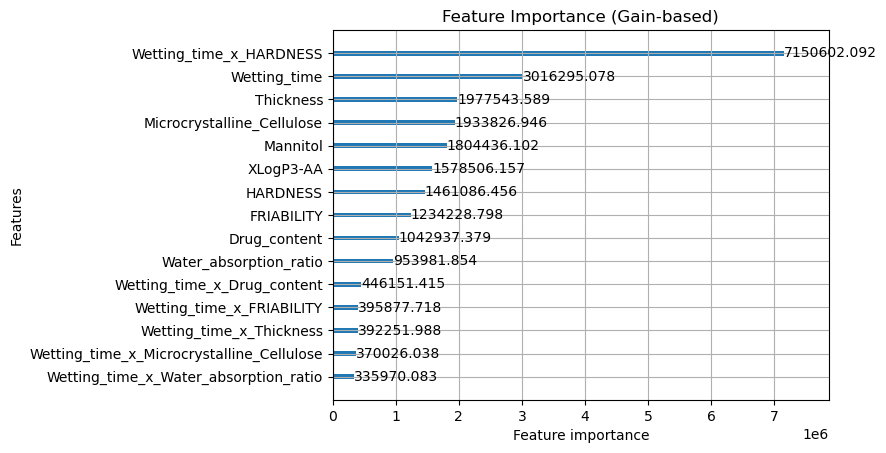

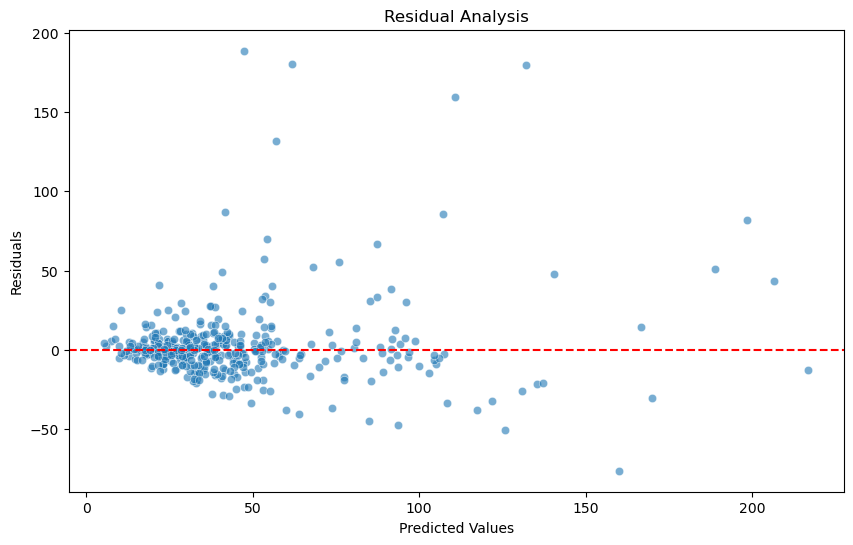

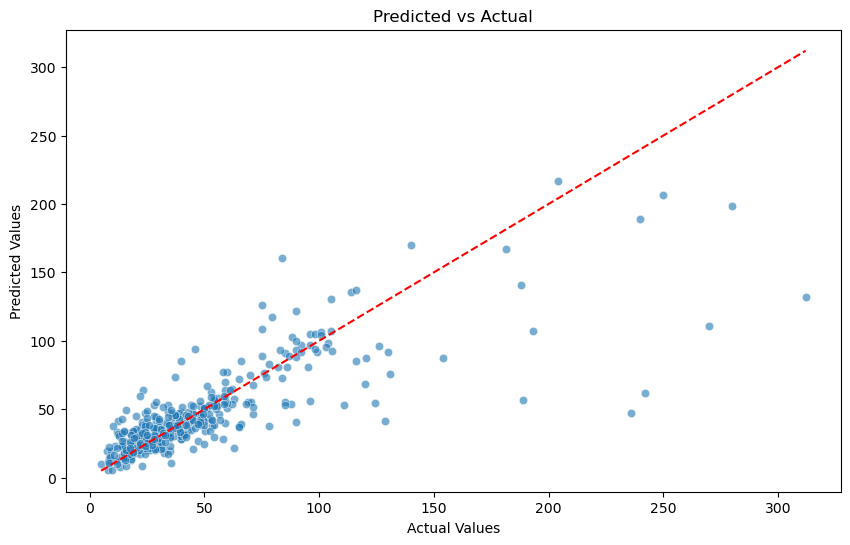

In [28]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import early_stopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load and prepare data
df = pd.read_csv("final Data All Exipients.csv")
df.columns = df.columns.str.replace(' ', '_')
X = df.drop(columns=['DISINTEGRATION_TIME'])
y = df['DISINTEGRATION_TIME']

# Split dataset with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=pd.qcut(y, q=5)  # Stratified split for skewed target
)

# Feature engineering pipeline
def create_features(X_df, top_features, key_feature):
    """Create interaction features dynamically"""
    X_processed = X_df[top_features].copy()
    for feature in top_features:
        if feature != key_feature:
            X_processed[f'{key_feature}_x_{feature}'] = X_df[key_feature] * X_df[feature]
    return X_processed

# Initial feature selection
base_model = lgb.LGBMRegressor(random_state=42)
base_model.fit(X_train, y_train)

# Identify important features
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': base_model.feature_importances_
}).sort_values('Importance', ascending=False)

top_features = feature_importance.head(10)['Feature'].tolist()
key_feature = feature_importance.iloc[0]['Feature']

# Create enhanced features
X_train = create_features(X_train, top_features, key_feature)
X_test = create_features(X_test, top_features, key_feature)

# Optuna optimization with cross-validation
def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 31, 511),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 10.0, log=True)
    }
    
    model = lgb.LGBMRegressor(**params)
    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='rmse',
        callbacks=[early_stopping(stopping_rounds=100)]
    )
    
    val_preds = model.predict(X_test, num_iteration=model.best_iteration_)
    return mean_squared_error(y_test, val_preds, squared=False)

# Optimize study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, timeout=3600)

# Best model training
best_params = study.best_params
final_model = lgb.LGBMRegressor(**best_params)
final_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='rmse',
    callbacks=[early_stopping(stopping_rounds=100)]
)

# Model evaluation
preds = final_model.predict(X_test, num_iteration=final_model.best_iteration_)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)
print(f"Final Model - RMSE: {rmse:.4f}, R²: {r2:.4f}")

# Feature importance plot
plt.figure(figsize=(10, 6))
lgb.plot_importance(final_model, max_num_features=15, importance_type='gain')
plt.title('Feature Importance (Gain-based)')
plt.show()

# Residual analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x=preds, y=y_test - preds, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

# Predicted vs Actual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual')
plt.show()


[I 2025-02-02 22:19:19,179] A new study created in memory with name: no-name-9ea3e973-8b53-450d-8a39-6c88795975d2
[I 2025-02-02 22:19:19,562] Trial 0 finished with value: 23.77793533853472 and parameters: {'n_estimators': 347, 'learning_rate': 0.08369214833538861, 'max_depth': 7, 'num_leaves': 88, 'min_child_samples': 16, 'colsample_bytree': 0.7560895038604295, 'subsample': 0.7779950265225466, 'reg_alpha': 0.003116138895935117, 'reg_lambda': 0.030340246495765655}. Best is trial 0 with value: 23.77793533853472.
[I 2025-02-02 22:19:20,465] Trial 1 finished with value: 23.316348633713286 and parameters: {'n_estimators': 573, 'learning_rate': 0.07019420827753145, 'max_depth': 10, 'num_leaves': 43, 'min_child_samples': 15, 'colsample_bytree': 0.8836333966403557, 'subsample': 0.8858912293223984, 'reg_alpha': 0.004084139128197883, 'reg_lambda': 0.09610408655733661}. Best is trial 1 with value: 23.316348633713286.
[I 2025-02-02 22:19:21,143] Trial 2 finished with value: 22.939546058910665 and 

Optimized LightGBM - RMSE: 22.0856, R²: 0.7320
XGBoost - RMSE: 26.3088, R²: 0.6198
Stacking (Avg) - RMSE: 23.5900, R²: 0.6943


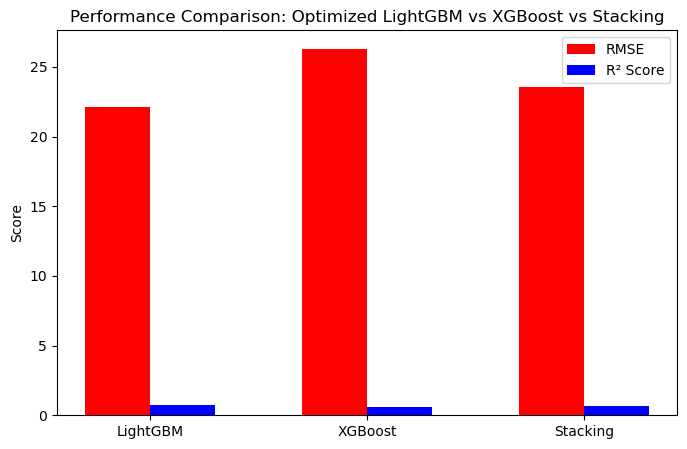

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor


# Load data
df = pd.read_csv("final Data All Exipients.csv")
df.columns = df.columns.str.replace(' ', '_')  # Sanitize feature names

# Define features and target
X = df.drop(columns=['DISINTEGRATION_TIME'])
y = df['DISINTEGRATION_TIME']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ====== Feature Selection using LightGBM Importance ======
importance_model = lgb.LGBMRegressor()
importance_model.fit(X_train, y_train)
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importance_model.feature_importances_})
important_features = feature_importances[feature_importances['importance'] > 0.005]['feature'].tolist()
X_train, X_test = X_train[important_features], X_test[important_features]

# ====== Feature Engineering: Interaction Terms ======
top_features = feature_importances.sort_values(by='importance', ascending=False)['feature'].tolist()[:5]
for i in range(len(top_features)):
    for j in range(i + 1, len(top_features)):
        X_train[f'{top_features[i]}_x_{top_features[j]}'] = X_train[top_features[i]] * X_train[top_features[j]]
        X_test[f'{top_features[i]}_x_{top_features[j]}'] = X_test[top_features[i]] * X_test[top_features[j]]

# ====== Optuna Hyperparameter Optimization ======
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 300, 700),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 31, 127),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 20),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 0.9),
        'subsample': trial.suggest_float('subsample', 0.7, 0.9),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 0.1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 0.1),
        'random_state': 42
    }
    model = lgb.LGBMRegressor(**params, verbose=-1)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_squared_error(y_test, preds, squared=False)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)
best_params = study.best_params

# Train Optimized LightGBM
lgbm_best = lgb.LGBMRegressor(**best_params, random_state=42)
lgbm_best.fit(X_train, y_train)
y_pred_lgbm = lgbm_best.predict(X_test)

# Train Optimized XGBoost
xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# ====== Stacking LightGBM + XGBoost ======
stacked_preds = (y_pred_lgbm + y_pred_xgb) / 2

# ====== Performance Evaluation ======
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.4f}, R²: {r2:.4f}")
    return rmse, r2

evaluate_model(y_test, y_pred_lgbm, "Optimized LightGBM")
evaluate_model(y_test, y_pred_xgb, "XGBoost")
evaluate_model(y_test, stacked_preds, "Stacking (Avg)")

# ====== Performance Visualization ======
models = ['LightGBM', 'XGBoost', 'Stacking']
rmse_values = [
    np.sqrt(mean_squared_error(y_test, y_pred_lgbm)),
    np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
    np.sqrt(mean_squared_error(y_test, stacked_preds))
]
r2_values = [
    r2_score(y_test, y_pred_lgbm),
    r2_score(y_test, y_pred_xgb),
    r2_score(y_test, stacked_preds)
]

plt.figure(figsize=(8, 5))
x = np.arange(len(models))
width = 0.3

plt.bar(x - width/2, rmse_values, width, label='RMSE', color='red')
plt.bar(x + width/2, r2_values, width, label='R² Score', color='blue')
plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Performance Comparison: Optimized LightGBM vs XGBoost vs Stacking")
plt.legend()
plt.show()


Selecting Important Features...


<Figure size 1000x600 with 0 Axes>

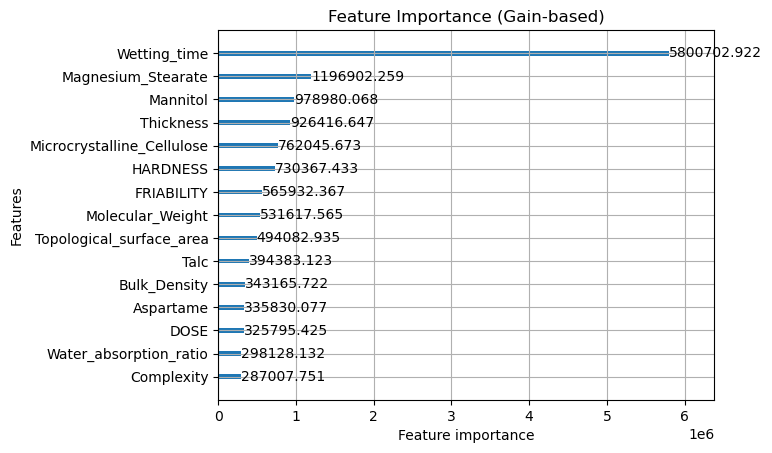

[I 2025-02-02 22:26:52,643] A new study created in memory with name: no-name-56739b3b-0eb1-4c60-b0d1-a47dfa140efe


Optimizing Hyperparameters...


Hyperparameter Tuning Progress:   0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:26:54,209] Trial 0 finished with value: 29.47349910023383 and parameters: {'n_estimators': 1992, 'learning_rate': 0.009101682353459985, 'num_leaves': 201, 'max_depth': 3, 'min_child_samples': 14, 'subsample': 0.7744907346891735, 'colsample_bytree': 0.8500389793820653, 'reg_alpha': 1.3526443711938128, 'reg_lambda': 0.08513341956107913}. Best is trial 0 with value: 29.47349910023383.
Hyperparameter Tuning Progress:   1%|          | 1/100 [00:01<02:29,  1.52s/it]

Did not meet early stopping. Best iteration is:
[1991]	valid_0's rmse: 29.4735
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:26:55,627] Trial 1 finished with value: 26.93364254094858 and parameters: {'n_estimators': 1691, 'learning_rate': 0.08498875290586434, 'num_leaves': 510, 'max_depth': 9, 'min_child_samples': 31, 'subsample': 0.7627729041414277, 'colsample_bytree': 0.9141800291666218, 'reg_alpha': 3.0157673243502235e-08, 'reg_lambda': 0.26247860696783726}. Best is trial 1 with value: 26.93364254094858.
Hyperparameter Tuning Progress:   2%|▏         | 2/100 [00:02<02:22,  1.46s/it]

Early stopping, best iteration is:
[627]	valid_0's rmse: 26.9336
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:26:56,670] Trial 2 finished with value: 36.08647036014719 and parameters: {'n_estimators': 872, 'learning_rate': 0.001215031394030178, 'num_leaves': 256, 'max_depth': 11, 'min_child_samples': 87, 'subsample': 0.7784988790012214, 'colsample_bytree': 0.8823709163935809, 'reg_alpha': 0.0016597241623365865, 'reg_lambda': 1.8007550035882116e-08}. Best is trial 1 with value: 26.93364254094858.
Hyperparameter Tuning Progress:   3%|▎         | 3/100 [00:03<02:03,  1.27s/it]

Did not meet early stopping. Best iteration is:
[872]	valid_0's rmse: 36.0865
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:26:57,635] Trial 3 finished with value: 33.60484869256466 and parameters: {'n_estimators': 661, 'learning_rate': 0.0024784891451530076, 'num_leaves': 61, 'max_depth': 9, 'min_child_samples': 66, 'subsample': 0.9919029915650776, 'colsample_bytree': 0.7812983919667713, 'reg_alpha': 1.9482503733988188e-05, 'reg_lambda': 9.967409809409683e-09}. Best is trial 1 with value: 26.93364254094858.
Hyperparameter Tuning Progress:   4%|▍         | 4/100 [00:04<01:50,  1.15s/it]

Did not meet early stopping. Best iteration is:
[661]	valid_0's rmse: 33.6048
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:26:59,326] Trial 4 finished with value: 31.65323022170897 and parameters: {'n_estimators': 1099, 'learning_rate': 0.0029572309225774328, 'num_leaves': 294, 'max_depth': 7, 'min_child_samples': 63, 'subsample': 0.666140106680335, 'colsample_bytree': 0.702631550225686, 'reg_alpha': 6.853752863551204e-07, 'reg_lambda': 0.012671171838427354}. Best is trial 1 with value: 26.93364254094858.
Hyperparameter Tuning Progress:   5%|▌         | 5/100 [00:06<02:07,  1.34s/it]

Did not meet early stopping. Best iteration is:
[1099]	valid_0's rmse: 31.6532
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:26:59,928] Trial 5 finished with value: 37.56235494292048 and parameters: {'n_estimators': 631, 'learning_rate': 0.0011676712799289853, 'num_leaves': 272, 'max_depth': 4, 'min_child_samples': 82, 'subsample': 0.7798012356884219, 'colsample_bytree': 0.7905213914337721, 'reg_alpha': 1.0589810326321282e-09, 'reg_lambda': 3.65075487204096e-05}. Best is trial 1 with value: 26.93364254094858.
Hyperparameter Tuning Progress:   6%|▌         | 6/100 [00:07<01:42,  1.09s/it]

Did not meet early stopping. Best iteration is:
[631]	valid_0's rmse: 37.5624
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:27:01,226] Trial 6 finished with value: 27.09190353894109 and parameters: {'n_estimators': 863, 'learning_rate': 0.017664379629504113, 'num_leaves': 429, 'max_depth': 6, 'min_child_samples': 22, 'subsample': 0.8769288765362047, 'colsample_bytree': 0.7571997229771968, 'reg_alpha': 2.549470746596467e-08, 'reg_lambda': 3.7829012656728773e-07}. Best is trial 1 with value: 26.93364254094858.
Hyperparameter Tuning Progress:   7%|▋         | 7/100 [00:08<01:47,  1.16s/it]

Did not meet early stopping. Best iteration is:
[863]	valid_0's rmse: 27.0919
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:27:02,319] Trial 7 finished with value: 30.99277939790018 and parameters: {'n_estimators': 856, 'learning_rate': 0.012495837228808456, 'num_leaves': 362, 'max_depth': 7, 'min_child_samples': 80, 'subsample': 0.981246135513785, 'colsample_bytree': 0.8399413268558209, 'reg_alpha': 6.367429369056918e-07, 'reg_lambda': 0.7979144314430849}. Best is trial 1 with value: 26.93364254094858.
Hyperparameter Tuning Progress:   8%|▊         | 8/100 [00:09<01:44,  1.14s/it]

Did not meet early stopping. Best iteration is:
[856]	valid_0's rmse: 30.9928
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1379]	valid_0's rmse: 27.2984


[I 2025-02-02 22:27:06,215] Trial 8 finished with value: 27.298408757551663 and parameters: {'n_estimators': 1379, 'learning_rate': 0.006045213464610767, 'num_leaves': 482, 'max_depth': 11, 'min_child_samples': 24, 'subsample': 0.8986668925580645, 'colsample_bytree': 0.9408010601500005, 'reg_alpha': 0.33103484003054734, 'reg_lambda': 1.0529751018691e-05}. Best is trial 1 with value: 26.93364254094858.
Hyperparameter Tuning Progress:   9%|▉         | 9/100 [00:13<03:02,  2.00s/it]

Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:27:08,204] Trial 9 finished with value: 33.10055236578744 and parameters: {'n_estimators': 1478, 'learning_rate': 0.0012504377262065717, 'num_leaves': 36, 'max_depth': 7, 'min_child_samples': 59, 'subsample': 0.7169180695948038, 'colsample_bytree': 0.6485790075766107, 'reg_alpha': 7.704720885904578, 'reg_lambda': 0.016229241594929836}. Best is trial 1 with value: 26.93364254094858.
Hyperparameter Tuning Progress:  10%|█         | 10/100 [00:15<02:59,  2.00s/it]

Did not meet early stopping. Best iteration is:
[1478]	valid_0's rmse: 33.1006
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:27:09,233] Trial 10 finished with value: 26.875868367502335 and parameters: {'n_estimators': 1792, 'learning_rate': 0.07885065027490727, 'num_leaves': 501, 'max_depth': 9, 'min_child_samples': 39, 'subsample': 0.6250890889183537, 'colsample_bytree': 0.9830173849466899, 'reg_alpha': 0.002170315710302886, 'reg_lambda': 2.475614847318401}. Best is trial 10 with value: 26.875868367502335.
Hyperparameter Tuning Progress:  11%|█         | 11/100 [00:16<02:31,  1.70s/it]

Early stopping, best iteration is:
[412]	valid_0's rmse: 26.8759
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:27:10,255] Trial 11 finished with value: 26.29880603756789 and parameters: {'n_estimators': 1801, 'learning_rate': 0.09013115101653393, 'num_leaves': 506, 'max_depth': 9, 'min_child_samples': 38, 'subsample': 0.6478838975075372, 'colsample_bytree': 0.9961490958402671, 'reg_alpha': 0.0030287808492282923, 'reg_lambda': 8.118824685221316}. Best is trial 11 with value: 26.29880603756789.
Hyperparameter Tuning Progress:  12%|█▏        | 12/100 [00:17<02:11,  1.49s/it]

Early stopping, best iteration is:
[436]	valid_0's rmse: 26.2988
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:27:11,273] Trial 12 finished with value: 27.08120508696173 and parameters: {'n_estimators': 1933, 'learning_rate': 0.08952093819690371, 'num_leaves': 402, 'max_depth': 9, 'min_child_samples': 41, 'subsample': 0.6205930790011145, 'colsample_bytree': 0.998151424673448, 'reg_alpha': 0.0026916100320321873, 'reg_lambda': 3.661447175423549}. Best is trial 11 with value: 26.29880603756789.
Hyperparameter Tuning Progress:  13%|█▎        | 13/100 [00:18<01:57,  1.35s/it]

Early stopping, best iteration is:
[462]	valid_0's rmse: 27.0812
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1325]	valid_0's rmse: 26.2016


[I 2025-02-02 22:27:15,716] Trial 13 finished with value: 26.201571909411374 and parameters: {'n_estimators': 1668, 'learning_rate': 0.03566789152022061, 'num_leaves': 445, 'max_depth': 12, 'min_child_samples': 45, 'subsample': 0.6062361462485507, 'colsample_bytree': 0.9924299215619048, 'reg_alpha': 0.01203068597026277, 'reg_lambda': 8.19685996221277}. Best is trial 13 with value: 26.201571909411374.
Hyperparameter Tuning Progress:  14%|█▍        | 14/100 [00:23<03:16,  2.28s/it]

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1582]	valid_0's rmse: 25.8371


[I 2025-02-02 22:27:21,659] Trial 14 finished with value: 25.83706081995368 and parameters: {'n_estimators': 1588, 'learning_rate': 0.03377746518252257, 'num_leaves': 366, 'max_depth': 12, 'min_child_samples': 44, 'subsample': 0.6787727824756428, 'colsample_bytree': 0.9623073997720695, 'reg_alpha': 0.039313672593498085, 'reg_lambda': 0.0008282138328763705}. Best is trial 14 with value: 25.83706081995368.
Hyperparameter Tuning Progress:  15%|█▌        | 15/100 [00:28<04:47,  3.39s/it]

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1550]	valid_0's rmse: 25.6651


[I 2025-02-02 22:27:25,910] Trial 15 finished with value: 25.665111915124054 and parameters: {'n_estimators': 1559, 'learning_rate': 0.03285810856919194, 'num_leaves': 341, 'max_depth': 12, 'min_child_samples': 48, 'subsample': 0.7101911810081679, 'colsample_bytree': 0.9388472519347052, 'reg_alpha': 0.07503827941989466, 'reg_lambda': 0.00042396602382435445}. Best is trial 15 with value: 25.665111915124054.
Hyperparameter Tuning Progress:  16%|█▌        | 16/100 [00:33<05:06,  3.65s/it]

Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:27:29,309] Trial 16 finished with value: 25.473319946636344 and parameters: {'n_estimators': 1506, 'learning_rate': 0.03096927277095109, 'num_leaves': 351, 'max_depth': 12, 'min_child_samples': 52, 'subsample': 0.708078185006117, 'colsample_bytree': 0.9302137037962888, 'reg_alpha': 0.11045828579751249, 'reg_lambda': 0.0002408561059202491}. Best is trial 16 with value: 25.473319946636344.
Hyperparameter Tuning Progress:  17%|█▋        | 17/100 [00:36<04:56,  3.57s/it]

Did not meet early stopping. Best iteration is:
[1434]	valid_0's rmse: 25.4733
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:27:30,820] Trial 17 finished with value: 28.476643044489762 and parameters: {'n_estimators': 1225, 'learning_rate': 0.031071250903091364, 'num_leaves': 177, 'max_depth': 11, 'min_child_samples': 100, 'subsample': 0.7162914647180825, 'colsample_bytree': 0.9227988119879076, 'reg_alpha': 0.202715478402571, 'reg_lambda': 0.0004710024761686892}. Best is trial 16 with value: 25.473319946636344.
Hyperparameter Tuning Progress:  18%|█▊        | 18/100 [00:38<04:02,  2.95s/it]

Did not meet early stopping. Best iteration is:
[1225]	valid_0's rmse: 28.4766
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:27:32,992] Trial 18 finished with value: 26.170922170569934 and parameters: {'n_estimators': 1360, 'learning_rate': 0.02264016741972984, 'num_leaves': 328, 'max_depth': 10, 'min_child_samples': 54, 'subsample': 0.8640395865340091, 'colsample_bytree': 0.8790820882425703, 'reg_alpha': 4.5904891674938855e-05, 'reg_lambda': 0.0013031248618689318}. Best is trial 16 with value: 25.473319946636344.
Hyperparameter Tuning Progress:  19%|█▉        | 19/100 [00:40<03:40,  2.72s/it]

Did not meet early stopping. Best iteration is:
[1360]	valid_0's rmse: 26.1709
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:27:35,232] Trial 19 finished with value: 25.757458585573236 and parameters: {'n_estimators': 1118, 'learning_rate': 0.04218617832147708, 'num_leaves': 199, 'max_depth': 12, 'min_child_samples': 53, 'subsample': 0.8265935959631556, 'colsample_bytree': 0.8406253637286208, 'reg_alpha': 0.0002889586307680688, 'reg_lambda': 1.7255245938055478e-06}. Best is trial 16 with value: 25.473319946636344.
Hyperparameter Tuning Progress:  20%|██        | 20/100 [00:42<03:25,  2.57s/it]

Did not meet early stopping. Best iteration is:
[1111]	valid_0's rmse: 25.7575
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:27:36,643] Trial 20 finished with value: 27.628139136739758 and parameters: {'n_estimators': 1504, 'learning_rate': 0.05332626773269455, 'num_leaves': 130, 'max_depth': 5, 'min_child_samples': 70, 'subsample': 0.7077129885576756, 'colsample_bytree': 0.7239620527951065, 'reg_alpha': 9.046064647535474, 'reg_lambda': 3.681873391318412e-07}. Best is trial 16 with value: 25.473319946636344.
Hyperparameter Tuning Progress:  21%|██        | 21/100 [00:43<02:55,  2.23s/it]

Did not meet early stopping. Best iteration is:
[1498]	valid_0's rmse: 27.6281
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:27:38,896] Trial 21 finished with value: 25.298630416910918 and parameters: {'n_estimators': 1107, 'learning_rate': 0.057035280280648366, 'num_leaves': 225, 'max_depth': 12, 'min_child_samples': 52, 'subsample': 0.8134828266583651, 'colsample_bytree': 0.8486361195887085, 'reg_alpha': 0.0001677565631261983, 'reg_lambda': 6.314484195565773e-06}. Best is trial 21 with value: 25.298630416910918.
Hyperparameter Tuning Progress:  22%|██▏       | 22/100 [00:46<02:54,  2.23s/it]

Did not meet early stopping. Best iteration is:
[1073]	valid_0's rmse: 25.2986
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:27:40,959] Trial 22 finished with value: 25.229906952505708 and parameters: {'n_estimators': 1189, 'learning_rate': 0.054521994462945735, 'num_leaves': 245, 'max_depth': 11, 'min_child_samples': 53, 'subsample': 0.8315111815525824, 'colsample_bytree': 0.8915573464776337, 'reg_alpha': 0.03252540848188242, 'reg_lambda': 8.898925153284109e-05}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  23%|██▎       | 23/100 [00:48<02:48,  2.18s/it]

Early stopping, best iteration is:
[1053]	valid_0's rmse: 25.2299
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:27:42,525] Trial 23 finished with value: 26.740065556229876 and parameters: {'n_estimators': 1050, 'learning_rate': 0.05545974534458463, 'num_leaves': 240, 'max_depth': 10, 'min_child_samples': 72, 'subsample': 0.8351661510969214, 'colsample_bytree': 0.899205062831837, 'reg_alpha': 0.00018578332932253777, 'reg_lambda': 9.413924933321539e-06}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  24%|██▍       | 24/100 [00:49<02:31,  2.00s/it]

Did not meet early stopping. Best iteration is:
[1025]	valid_0's rmse: 26.7401
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:27:44,528] Trial 24 finished with value: 26.162969129976908 and parameters: {'n_estimators': 1343, 'learning_rate': 0.017906645543066254, 'num_leaves': 124, 'max_depth': 10, 'min_child_samples': 55, 'subsample': 0.9325906805205866, 'colsample_bytree': 0.8139767712614696, 'reg_alpha': 0.021755525919215802, 'reg_lambda': 8.884327841093449e-05}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  25%|██▌       | 25/100 [00:51<02:29,  2.00s/it]

Did not meet early stopping. Best iteration is:
[1342]	valid_0's rmse: 26.163
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:27:45,873] Trial 25 finished with value: 26.41649880350499 and parameters: {'n_estimators': 1223, 'learning_rate': 0.056822387854501, 'num_leaves': 301, 'max_depth': 11, 'min_child_samples': 33, 'subsample': 0.823713630400635, 'colsample_bytree': 0.8666976722754915, 'reg_alpha': 3.6498327016753145e-06, 'reg_lambda': 0.004888466701578551}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  26%|██▌       | 26/100 [00:53<02:13,  1.80s/it]

Early stopping, best iteration is:
[550]	valid_0's rmse: 26.4165
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:27:47,462] Trial 26 finished with value: 27.18298609243484 and parameters: {'n_estimators': 966, 'learning_rate': 0.02212233885770144, 'num_leaves': 220, 'max_depth': 12, 'min_child_samples': 60, 'subsample': 0.7457212731320286, 'colsample_bytree': 0.8209821708382032, 'reg_alpha': 0.7905581093460374, 'reg_lambda': 2.464880242318267e-06}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  27%|██▋       | 27/100 [00:54<02:06,  1.74s/it]

Did not meet early stopping. Best iteration is:
[963]	valid_0's rmse: 27.183
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:27:49,698] Trial 27 finished with value: 25.488650977092185 and parameters: {'n_estimators': 1265, 'learning_rate': 0.05690162779057549, 'num_leaves': 158, 'max_depth': 11, 'min_child_samples': 51, 'subsample': 0.9260213204057838, 'colsample_bytree': 0.9559340133616455, 'reg_alpha': 0.0003703451182276766, 'reg_lambda': 4.348061228732313e-05}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  28%|██▊       | 28/100 [00:57<02:15,  1.89s/it]

Did not meet early stopping. Best iteration is:
[1262]	valid_0's rmse: 25.4887
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:27:50,435] Trial 28 finished with value: 31.20837550667852 and parameters: {'n_estimators': 508, 'learning_rate': 0.010056011259581632, 'num_leaves': 299, 'max_depth': 8, 'min_child_samples': 72, 'subsample': 0.803459342318068, 'colsample_bytree': 0.8991844458879741, 'reg_alpha': 1.1568891205318148e-05, 'reg_lambda': 6.79276420258404e-08}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  29%|██▉       | 29/100 [00:57<01:49,  1.54s/it]

Did not meet early stopping. Best iteration is:
[508]	valid_0's rmse: 31.2084
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:27:52,546] Trial 29 finished with value: 29.16325945126274 and parameters: {'n_estimators': 1023, 'learning_rate': 0.006062231986148816, 'num_leaves': 232, 'max_depth': 10, 'min_child_samples': 33, 'subsample': 0.8577178019657021, 'colsample_bytree': 0.853679627844044, 'reg_alpha': 1.7504472992632485, 'reg_lambda': 0.06978755837718152}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  30%|███       | 30/100 [00:59<01:59,  1.71s/it]

Did not meet early stopping. Best iteration is:
[1021]	valid_0's rmse: 29.1633
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:27:54,618] Trial 30 finished with value: 26.641627068887015 and parameters: {'n_estimators': 1428, 'learning_rate': 0.021807601354170973, 'num_leaves': 399, 'max_depth': 12, 'min_child_samples': 10, 'subsample': 0.7475930781209521, 'colsample_bytree': 0.7659885415585806, 'reg_alpha': 0.00896495569575911, 'reg_lambda': 1.6213133748010433e-09}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  31%|███       | 31/100 [01:01<02:05,  1.82s/it]

Early stopping, best iteration is:
[581]	valid_0's rmse: 26.6416
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:27:56,589] Trial 31 finished with value: 25.584256787221896 and parameters: {'n_estimators': 1273, 'learning_rate': 0.06206809616025082, 'num_leaves': 162, 'max_depth': 11, 'min_child_samples': 51, 'subsample': 0.9155228757003111, 'colsample_bytree': 0.9527568591053303, 'reg_alpha': 0.00033928181796703344, 'reg_lambda': 3.6565318345553416e-05}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  32%|███▏      | 32/100 [01:03<02:06,  1.87s/it]

Early stopping, best iteration is:
[1044]	valid_0's rmse: 25.5843
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:27:58,530] Trial 32 finished with value: 25.429497789522532 and parameters: {'n_estimators': 1165, 'learning_rate': 0.04748452126257699, 'num_leaves': 98, 'max_depth': 11, 'min_child_samples': 57, 'subsample': 0.9676933115506896, 'colsample_bytree': 0.9127059173848506, 'reg_alpha': 0.0005652406994631491, 'reg_lambda': 0.0001271187269516698}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  33%|███▎      | 33/100 [01:05<02:06,  1.89s/it]

Did not meet early stopping. Best iteration is:
[1163]	valid_0's rmse: 25.4295
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:00,317] Trial 33 finished with value: 25.3387366420545 and parameters: {'n_estimators': 1155, 'learning_rate': 0.041663159090084306, 'num_leaves': 127, 'max_depth': 10, 'min_child_samples': 57, 'subsample': 0.9523828698424697, 'colsample_bytree': 0.9132803235618833, 'reg_alpha': 0.14053891563347737, 'reg_lambda': 0.00015520752111422025}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  34%|███▍      | 34/100 [01:07<02:02,  1.86s/it]

Did not meet early stopping. Best iteration is:
[1145]	valid_0's rmse: 25.3387
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:02,153] Trial 34 finished with value: 26.812041952951173 and parameters: {'n_estimators': 1176, 'learning_rate': 0.04427717176571914, 'num_leaves': 89, 'max_depth': 10, 'min_child_samples': 67, 'subsample': 0.9641422851932107, 'colsample_bytree': 0.9024124470796759, 'reg_alpha': 0.0008293879209108659, 'reg_lambda': 6.068765531352438e-06}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  35%|███▌      | 35/100 [01:09<02:00,  1.85s/it]

Did not meet early stopping. Best iteration is:
[1173]	valid_0's rmse: 26.812
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:03,318] Trial 35 finished with value: 26.199627078761882 and parameters: {'n_estimators': 952, 'learning_rate': 0.06904601908350712, 'num_leaves': 98, 'max_depth': 8, 'min_child_samples': 59, 'subsample': 0.954693021703251, 'colsample_bytree': 0.8708075852803431, 'reg_alpha': 5.748940014839417e-05, 'reg_lambda': 0.0029545607250030335}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  36%|███▌      | 36/100 [01:10<01:45,  1.65s/it]

Early stopping, best iteration is:
[702]	valid_0's rmse: 26.1996
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:04,081] Trial 36 finished with value: 29.114747352350168 and parameters: {'n_estimators': 1090, 'learning_rate': 0.04447798262947099, 'num_leaves': 193, 'max_depth': 3, 'min_child_samples': 64, 'subsample': 0.8899235292552353, 'colsample_bytree': 0.9126660703358849, 'reg_alpha': 0.0069372706695085724, 'reg_lambda': 0.00014957383394452982}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  37%|███▋      | 37/100 [01:11<01:26,  1.38s/it]

Did not meet early stopping. Best iteration is:
[1088]	valid_0's rmse: 29.1147
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:05,476] Trial 37 finished with value: 27.49436034840962 and parameters: {'n_estimators': 1163, 'learning_rate': 0.099790082838594, 'num_leaves': 71, 'max_depth': 11, 'min_child_samples': 76, 'subsample': 0.9527609594743432, 'colsample_bytree': 0.8187262816531609, 'reg_alpha': 3.1628024226172216e-06, 'reg_lambda': 4.6885264875345125e-07}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  38%|███▊      | 38/100 [01:12<01:25,  1.39s/it]

Early stopping, best iteration is:
[892]	valid_0's rmse: 27.4944
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:06,565] Trial 38 finished with value: 27.6178336451275 and parameters: {'n_estimators': 896, 'learning_rate': 0.07020041176062232, 'num_leaves': 136, 'max_depth': 10, 'min_child_samples': 90, 'subsample': 0.9953016908005167, 'colsample_bytree': 0.850751778357634, 'reg_alpha': 1.1322133242333083, 'reg_lambda': 1.3895082595104733e-05}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  39%|███▉      | 39/100 [01:13<01:19,  1.30s/it]

Did not meet early stopping. Best iteration is:
[890]	valid_0's rmse: 27.6178
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:07,595] Trial 39 finished with value: 26.614592271528142 and parameters: {'n_estimators': 796, 'learning_rate': 0.04510315901906911, 'num_leaves': 274, 'max_depth': 8, 'min_child_samples': 59, 'subsample': 0.800136933875752, 'colsample_bytree': 0.8824235875899609, 'reg_alpha': 0.0007242930758630703, 'reg_lambda': 2.5256153707759907e-06}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  40%|████      | 40/100 [01:14<01:12,  1.22s/it]

Did not meet early stopping. Best iteration is:
[796]	valid_0's rmse: 26.6146
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:09,421] Trial 40 finished with value: 26.850709281544823 and parameters: {'n_estimators': 978, 'learning_rate': 0.015798365687290074, 'num_leaves': 37, 'max_depth': 11, 'min_child_samples': 27, 'subsample': 0.7766251892794636, 'colsample_bytree': 0.794836924805589, 'reg_alpha': 2.7655958181438475e-07, 'reg_lambda': 0.01393713647604677}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  41%|████      | 41/100 [01:16<01:22,  1.40s/it]

Did not meet early stopping. Best iteration is:
[974]	valid_0's rmse: 26.8507
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:11,995] Trial 41 finished with value: 26.2833102661669 and parameters: {'n_estimators': 1317, 'learning_rate': 0.027696427315566662, 'num_leaves': 94, 'max_depth': 12, 'min_child_samples': 46, 'subsample': 0.846644702150375, 'colsample_bytree': 0.9247139722907975, 'reg_alpha': 0.09485510589983745, 'reg_lambda': 0.00017700148643627853}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  42%|████▏     | 42/100 [01:19<01:41,  1.75s/it]

Did not meet early stopping. Best iteration is:
[1317]	valid_0's rmse: 26.2833
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:14,428] Trial 42 finished with value: 25.83881858622571 and parameters: {'n_estimators': 1171, 'learning_rate': 0.025984159244802782, 'num_leaves': 247, 'max_depth': 12, 'min_child_samples': 55, 'subsample': 0.9687899301923414, 'colsample_bytree': 0.9735572558771413, 'reg_alpha': 0.250683385167765, 'reg_lambda': 0.00027650016445828054}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  43%|████▎     | 43/100 [01:21<01:51,  1.96s/it]

Did not meet early stopping. Best iteration is:
[1171]	valid_0's rmse: 25.8388
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:16,762] Trial 43 finished with value: 26.21316672212491 and parameters: {'n_estimators': 1419, 'learning_rate': 0.03766497812910954, 'num_leaves': 270, 'max_depth': 11, 'min_child_samples': 62, 'subsample': 0.9033960362936675, 'colsample_bytree': 0.9361086615204076, 'reg_alpha': 0.04491543429539788, 'reg_lambda': 6.742018699600892e-05}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  44%|████▍     | 44/100 [01:24<01:55,  2.07s/it]

Did not meet early stopping. Best iteration is:
[1406]	valid_0's rmse: 26.2132
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:18,446] Trial 44 finished with value: 25.738485232524827 and parameters: {'n_estimators': 1102, 'learning_rate': 0.0728563167050865, 'num_leaves': 219, 'max_depth': 11, 'min_child_samples': 50, 'subsample': 0.8777441489217982, 'colsample_bytree': 0.88940638581133, 'reg_alpha': 2.671284509582037, 'reg_lambda': 2.119962030212022e-05}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  45%|████▌     | 45/100 [01:25<01:47,  1.95s/it]

Early stopping, best iteration is:
[873]	valid_0's rmse: 25.7385
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:19,770] Trial 45 finished with value: 29.302863096871825 and parameters: {'n_estimators': 748, 'learning_rate': 0.01310969489205454, 'num_leaves': 115, 'max_depth': 10, 'min_child_samples': 42, 'subsample': 0.9400358230421036, 'colsample_bytree': 0.9090985095299475, 'reg_alpha': 0.535195165479261, 'reg_lambda': 0.0015543179588663834}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  46%|████▌     | 46/100 [01:27<01:35,  1.76s/it]

Did not meet early stopping. Best iteration is:
[747]	valid_0's rmse: 29.3029
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:21,691] Trial 46 finished with value: 32.61918677271057 and parameters: {'n_estimators': 1283, 'learning_rate': 0.001791241735434545, 'num_leaves': 152, 'max_depth': 12, 'min_child_samples': 66, 'subsample': 0.7563013289165438, 'colsample_bytree': 0.9281382446942438, 'reg_alpha': 0.0044794832877262545, 'reg_lambda': 0.03735797084089053}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  47%|████▋     | 47/100 [01:28<01:36,  1.81s/it]

Did not meet early stopping. Best iteration is:
[1283]	valid_0's rmse: 32.6192
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:23,572] Trial 47 finished with value: 30.3727007295332 and parameters: {'n_estimators': 1042, 'learning_rate': 0.0045389771025391564, 'num_leaves': 324, 'max_depth': 9, 'min_child_samples': 39, 'subsample': 0.8081677431546502, 'colsample_bytree': 0.8662189511253896, 'reg_alpha': 0.016503668791868265, 'reg_lambda': 0.004598097196257279}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  48%|████▊     | 48/100 [01:30<01:35,  1.83s/it]

Did not meet early stopping. Best iteration is:
[1042]	valid_0's rmse: 30.3727
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:25,379] Trial 48 finished with value: 26.831328788808435 and parameters: {'n_estimators': 1620, 'learning_rate': 0.048960302585023575, 'num_leaves': 57, 'max_depth': 6, 'min_child_samples': 46, 'subsample': 0.682075084711033, 'colsample_bytree': 0.9755136143408041, 'reg_alpha': 0.0008661887977200252, 'reg_lambda': 5.533214248796458e-06}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  49%|████▉     | 49/100 [01:32<01:33,  1.83s/it]

Did not meet early stopping. Best iteration is:
[1609]	valid_0's rmse: 26.8313
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1729]	valid_0's rmse: 25.3502


[I 2025-02-02 22:28:28,696] Trial 49 finished with value: 25.35024449710374 and parameters: {'n_estimators': 1731, 'learning_rate': 0.028265287121661903, 'num_leaves': 376, 'max_depth': 11, 'min_child_samples': 56, 'subsample': 0.9840736945427504, 'colsample_bytree': 0.8337016506987502, 'reg_alpha': 0.11094566781888528, 'reg_lambda': 0.0007930712054572941}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  50%|█████     | 50/100 [01:36<01:53,  2.27s/it]

Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:30,577] Trial 50 finished with value: 25.28679481117195 and parameters: {'n_estimators': 1797, 'learning_rate': 0.0807515906176741, 'num_leaves': 184, 'max_depth': 11, 'min_child_samples': 57, 'subsample': 0.9811723238320172, 'colsample_bytree': 0.64622723796204, 'reg_alpha': 3.730236455284021, 'reg_lambda': 0.29386803891572005}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  51%|█████     | 51/100 [01:37<01:45,  2.15s/it]

Early stopping, best iteration is:
[1224]	valid_0's rmse: 25.2868
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:31,637] Trial 51 finished with value: 25.698552752282342 and parameters: {'n_estimators': 1791, 'learning_rate': 0.08235683927110621, 'num_leaves': 194, 'max_depth': 11, 'min_child_samples': 58, 'subsample': 0.9838026094986455, 'colsample_bytree': 0.6042820246967292, 'reg_alpha': 4.478570819352131, 'reg_lambda': 6.086936593283475e-07}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  52%|█████▏    | 52/100 [01:38<01:27,  1.83s/it]

Early stopping, best iteration is:
[608]	valid_0's rmse: 25.6986
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:33,049] Trial 52 finished with value: 25.435785886918296 and parameters: {'n_estimators': 1833, 'learning_rate': 0.06775260181627955, 'num_leaves': 263, 'max_depth': 9, 'min_child_samples': 57, 'subsample': 0.9769707003181992, 'colsample_bytree': 0.6714006420426866, 'reg_alpha': 1.5741380645492315e-09, 'reg_lambda': 0.11162594223082414}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  53%|█████▎    | 53/100 [01:40<01:20,  1.70s/it]

Early stopping, best iteration is:
[1031]	valid_0's rmse: 25.4358
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:35,200] Trial 53 finished with value: 26.2677392689555 and parameters: {'n_estimators': 1943, 'learning_rate': 0.03849660030151953, 'num_leaves': 177, 'max_depth': 10, 'min_child_samples': 62, 'subsample': 0.9396346772628452, 'colsample_bytree': 0.838024132189661, 'reg_alpha': 0.19610639003819968, 'reg_lambda': 0.0005054270611426007}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  54%|█████▍    | 54/100 [01:42<01:24,  1.84s/it]

Early stopping, best iteration is:
[1454]	valid_0's rmse: 26.2677
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:36,604] Trial 54 finished with value: 25.823022923045144 and parameters: {'n_estimators': 1664, 'learning_rate': 0.05133992051334069, 'num_leaves': 215, 'max_depth': 11, 'min_child_samples': 48, 'subsample': 0.9913539279690902, 'colsample_bytree': 0.7347245543954725, 'reg_alpha': 0.04394322082664553, 'reg_lambda': 0.28608530487445855}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  55%|█████▌    | 55/100 [01:43<01:16,  1.71s/it]

Early stopping, best iteration is:
[893]	valid_0's rmse: 25.823
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:37,424] Trial 55 finished with value: 26.53256658187077 and parameters: {'n_estimators': 1883, 'learning_rate': 0.08692183856132792, 'num_leaves': 467, 'max_depth': 12, 'min_child_samples': 69, 'subsample': 0.9973946390609802, 'colsample_bytree': 0.8316214912819828, 'reg_alpha': 4.136538752541587, 'reg_lambda': 8.937343745693525e-05}. Best is trial 22 with value: 25.229906952505708.
Hyperparameter Tuning Progress:  56%|█████▌    | 56/100 [01:44<01:03,  1.44s/it]

Early stopping, best iteration is:
[509]	valid_0's rmse: 26.5326
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:39,548] Trial 56 finished with value: 25.14440964413991 and parameters: {'n_estimators': 1713, 'learning_rate': 0.028138447226952048, 'num_leaves': 148, 'max_depth': 11, 'min_child_samples': 55, 'subsample': 0.9562705197820502, 'colsample_bytree': 0.6687917379305347, 'reg_alpha': 0.6806564239121707, 'reg_lambda': 1.5747656791445968}. Best is trial 56 with value: 25.14440964413991.
Hyperparameter Tuning Progress:  57%|█████▋    | 57/100 [01:46<01:10,  1.65s/it]

Did not meet early stopping. Best iteration is:
[1709]	valid_0's rmse: 25.1444
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:42,199] Trial 57 finished with value: 26.13534805155591 and parameters: {'n_estimators': 2000, 'learning_rate': 0.0277861410633576, 'num_leaves': 174, 'max_depth': 10, 'min_child_samples': 63, 'subsample': 0.914389483811639, 'colsample_bytree': 0.6349924121258445, 'reg_alpha': 0.6629122384165933, 'reg_lambda': 0.5992140662050278}. Best is trial 56 with value: 25.14440964413991.
Hyperparameter Tuning Progress:  58%|█████▊    | 58/100 [01:49<01:21,  1.95s/it]

Early stopping, best iteration is:
[1879]	valid_0's rmse: 26.1353
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:43,622] Trial 58 finished with value: 26.34526243587407 and parameters: {'n_estimators': 1706, 'learning_rate': 0.03695492341050599, 'num_leaves': 281, 'max_depth': 9, 'min_child_samples': 36, 'subsample': 0.9543572351359275, 'colsample_bytree': 0.6650623634369295, 'reg_alpha': 0.36645038765513904, 'reg_lambda': 1.3858332589866227}. Best is trial 56 with value: 25.14440964413991.
Hyperparameter Tuning Progress:  59%|█████▉    | 59/100 [01:50<01:13,  1.79s/it]

Early stopping, best iteration is:
[908]	valid_0's rmse: 26.3453
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:46,177] Trial 59 finished with value: 26.187368528228802 and parameters: {'n_estimators': 1731, 'learning_rate': 0.018557473347658435, 'num_leaves': 146, 'max_depth': 12, 'min_child_samples': 44, 'subsample': 0.8830552488098277, 'colsample_bytree': 0.6943446371403718, 'reg_alpha': 0.026490535641181534, 'reg_lambda': 2.623991389722689}. Best is trial 56 with value: 25.14440964413991.
Hyperparameter Tuning Progress:  60%|██████    | 60/100 [01:53<01:20,  2.02s/it]

Did not meet early stopping. Best iteration is:
[1728]	valid_0's rmse: 26.1874
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:48,489] Trial 60 finished with value: 25.355744314867355 and parameters: {'n_estimators': 1764, 'learning_rate': 0.032203360856694105, 'num_leaves': 382, 'max_depth': 11, 'min_child_samples': 54, 'subsample': 0.9445528834625808, 'colsample_bytree': 0.6009964271310735, 'reg_alpha': 0.14087170537678426, 'reg_lambda': 0.2688576720191473}. Best is trial 56 with value: 25.14440964413991.
Hyperparameter Tuning Progress:  61%|██████    | 61/100 [01:55<01:22,  2.11s/it]

Did not meet early stopping. Best iteration is:
[1759]	valid_0's rmse: 25.3557
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:50,691] Trial 61 finished with value: 25.24257187729886 and parameters: {'n_estimators': 1756, 'learning_rate': 0.033374223034597666, 'num_leaves': 404, 'max_depth': 11, 'min_child_samples': 54, 'subsample': 0.9784589595483835, 'colsample_bytree': 0.6160340903886574, 'reg_alpha': 0.14431657822679644, 'reg_lambda': 0.3011254724903248}. Best is trial 56 with value: 25.14440964413991.
Hyperparameter Tuning Progress:  62%|██████▏   | 62/100 [01:57<01:21,  2.14s/it]

Did not meet early stopping. Best iteration is:
[1749]	valid_0's rmse: 25.2426
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1857]	valid_0's rmse: 25.5216


[I 2025-02-02 22:28:53,165] Trial 62 finished with value: 25.52159936038763 and parameters: {'n_estimators': 1857, 'learning_rate': 0.025162519716953605, 'num_leaves': 433, 'max_depth': 11, 'min_child_samples': 51, 'subsample': 0.9766506677209527, 'colsample_bytree': 0.6238089537307677, 'reg_alpha': 1.3590717815854394, 'reg_lambda': 0.9108059504803924}. Best is trial 56 with value: 25.14440964413991.
Hyperparameter Tuning Progress:  63%|██████▎   | 63/100 [02:00<01:22,  2.24s/it]

Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:54,650] Trial 63 finished with value: 25.695131176818617 and parameters: {'n_estimators': 1557, 'learning_rate': 0.05749166491900531, 'num_leaves': 420, 'max_depth': 10, 'min_child_samples': 49, 'subsample': 0.7883430110599305, 'colsample_bytree': 0.6197504569874418, 'reg_alpha': 0.06478695691513824, 'reg_lambda': 0.12640575758125036}. Best is trial 56 with value: 25.14440964413991.
Hyperparameter Tuning Progress:  64%|██████▍   | 64/100 [02:01<01:12,  2.01s/it]

Early stopping, best iteration is:
[1137]	valid_0's rmse: 25.6951
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:55,598] Trial 64 finished with value: 25.20076060931207 and parameters: {'n_estimators': 1918, 'learning_rate': 0.09904416638129399, 'num_leaves': 465, 'max_depth': 12, 'min_child_samples': 55, 'subsample': 0.925556551580169, 'colsample_bytree': 0.6547517787468788, 'reg_alpha': 8.676460064101686, 'reg_lambda': 9.644451388991952}. Best is trial 56 with value: 25.14440964413991.
Hyperparameter Tuning Progress:  65%|██████▌   | 65/100 [02:02<00:59,  1.69s/it]

Early stopping, best iteration is:
[498]	valid_0's rmse: 25.2008
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:56,742] Trial 65 finished with value: 25.71405777936825 and parameters: {'n_estimators': 1901, 'learning_rate': 0.09497625449984416, 'num_leaves': 511, 'max_depth': 12, 'min_child_samples': 53, 'subsample': 0.9222155345205578, 'colsample_bytree': 0.6554965118140187, 'reg_alpha': 8.804821126349806, 'reg_lambda': 9.085767800831835}. Best is trial 56 with value: 25.14440964413991.
Hyperparameter Tuning Progress:  66%|██████▌   | 66/100 [02:04<00:51,  1.53s/it]

Early stopping, best iteration is:
[504]	valid_0's rmse: 25.7141
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:57,741] Trial 66 finished with value: 26.536321352723867 and parameters: {'n_estimators': 1952, 'learning_rate': 0.07953028607495234, 'num_leaves': 482, 'max_depth': 12, 'min_child_samples': 61, 'subsample': 0.8997285304395839, 'colsample_bytree': 0.6466402530286502, 'reg_alpha': 2.805333458924348, 'reg_lambda': 3.1108140145748906}. Best is trial 56 with value: 25.14440964413991.
Hyperparameter Tuning Progress:  67%|██████▋   | 67/100 [02:05<00:45,  1.37s/it]

Early stopping, best iteration is:
[443]	valid_0's rmse: 26.5363
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:28:59,697] Trial 67 finished with value: 25.594448211022172 and parameters: {'n_estimators': 1617, 'learning_rate': 0.06380932805535498, 'num_leaves': 209, 'max_depth': 12, 'min_child_samples': 48, 'subsample': 0.8662687775779844, 'colsample_bytree': 0.7009149106126082, 'reg_alpha': 0.4097769273368192, 'reg_lambda': 4.952561272134236}. Best is trial 56 with value: 25.14440964413991.
Hyperparameter Tuning Progress:  68%|██████▊   | 68/100 [02:07<00:49,  1.55s/it]

Early stopping, best iteration is:
[1065]	valid_0's rmse: 25.5944
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:00,584] Trial 68 finished with value: 26.633787315134985 and parameters: {'n_estimators': 1830, 'learning_rate': 0.07853098410403375, 'num_leaves': 232, 'max_depth': 11, 'min_child_samples': 42, 'subsample': 0.9619190887842701, 'colsample_bytree': 0.6829665229144705, 'reg_alpha': 1.7562173483151744, 'reg_lambda': 0.4421392855388471}. Best is trial 56 with value: 25.14440964413991.
Hyperparameter Tuning Progress:  69%|██████▉   | 69/100 [02:07<00:41,  1.35s/it]

Early stopping, best iteration is:
[482]	valid_0's rmse: 26.6338
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:02,781] Trial 69 finished with value: 26.132287385332766 and parameters: {'n_estimators': 1768, 'learning_rate': 0.04052618481298551, 'num_leaves': 115, 'max_depth': 12, 'min_child_samples': 65, 'subsample': 0.9308240296333596, 'colsample_bytree': 0.7260526254340417, 'reg_alpha': 4.183243364456029, 'reg_lambda': 1.446242648258177}. Best is trial 56 with value: 25.14440964413991.
Hyperparameter Tuning Progress:  70%|███████   | 70/100 [02:10<00:48,  1.60s/it]

Early stopping, best iteration is:
[1554]	valid_0's rmse: 26.1323
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:03,799] Trial 70 finished with value: 26.792583360966663 and parameters: {'n_estimators': 1221, 'learning_rate': 0.09909341885764515, 'num_leaves': 465, 'max_depth': 10, 'min_child_samples': 73, 'subsample': 0.8235306395209279, 'colsample_bytree': 0.6372580990058222, 'reg_alpha': 0.8494962221909609, 'reg_lambda': 0.0439516711195438}. Best is trial 56 with value: 25.14440964413991.
Hyperparameter Tuning Progress:  71%|███████   | 71/100 [02:11<00:41,  1.43s/it]

Early stopping, best iteration is:
[789]	valid_0's rmse: 26.7926
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:05,375] Trial 71 finished with value: 25.207459469990898 and parameters: {'n_estimators': 1888, 'learning_rate': 0.060610911688368026, 'num_leaves': 413, 'max_depth': 11, 'min_child_samples': 56, 'subsample': 0.9866840012463488, 'colsample_bytree': 0.6197107540849527, 'reg_alpha': 0.11208443535706718, 'reg_lambda': 4.58752672191296}. Best is trial 56 with value: 25.14440964413991.
Hyperparameter Tuning Progress:  72%|███████▏  | 72/100 [02:12<00:41,  1.47s/it]

Early stopping, best iteration is:
[1006]	valid_0's rmse: 25.2075
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:07,181] Trial 72 finished with value: 25.225395842789606 and parameters: {'n_estimators': 1900, 'learning_rate': 0.06248325260388882, 'num_leaves': 451, 'max_depth': 11, 'min_child_samples': 54, 'subsample': 0.9480166066299393, 'colsample_bytree': 0.614311406677058, 'reg_alpha': 9.767154784404205, 'reg_lambda': 9.517195948954424e-08}. Best is trial 56 with value: 25.14440964413991.
Hyperparameter Tuning Progress:  73%|███████▎  | 73/100 [02:14<00:42,  1.57s/it]

Early stopping, best iteration is:
[1266]	valid_0's rmse: 25.2254
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:08,655] Trial 73 finished with value: 24.971492159681578 and parameters: {'n_estimators': 1907, 'learning_rate': 0.059591196632504284, 'num_leaves': 452, 'max_depth': 11, 'min_child_samples': 53, 'subsample': 0.9995139556490367, 'colsample_bytree': 0.6179359103506411, 'reg_alpha': 7.822329640401604, 'reg_lambda': 1.098784118938208e-07}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  74%|███████▍  | 74/100 [02:15<00:40,  1.54s/it]

Early stopping, best iteration is:
[1013]	valid_0's rmse: 24.9715
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:10,325] Trial 74 finished with value: 25.018380321168873 and parameters: {'n_estimators': 1903, 'learning_rate': 0.06244754676386404, 'num_leaves': 442, 'max_depth': 11, 'min_child_samples': 54, 'subsample': 0.9734165874725965, 'colsample_bytree': 0.6165016359574613, 'reg_alpha': 5.85266674268556, 'reg_lambda': 7.741145624188377e-08}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  75%|███████▌  | 75/100 [02:17<00:39,  1.58s/it]

Early stopping, best iteration is:
[1187]	valid_0's rmse: 25.0184
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:12,045] Trial 75 finished with value: 25.129654772795476 and parameters: {'n_estimators': 1918, 'learning_rate': 0.06020485186501175, 'num_leaves': 448, 'max_depth': 11, 'min_child_samples': 53, 'subsample': 0.9738075203157682, 'colsample_bytree': 0.6139460380432167, 'reg_alpha': 8.027905477018619, 'reg_lambda': 3.0327989678731026e-08}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  76%|███████▌  | 76/100 [02:19<00:38,  1.62s/it]

Early stopping, best iteration is:
[1134]	valid_0's rmse: 25.1297
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:13,868] Trial 76 finished with value: 25.881256859978155 and parameters: {'n_estimators': 1917, 'learning_rate': 0.062189954891960116, 'num_leaves': 449, 'max_depth': 11, 'min_child_samples': 46, 'subsample': 0.9699867073408126, 'colsample_bytree': 0.6298865449350586, 'reg_alpha': 8.9146310378199, 'reg_lambda': 2.4124169545456613e-08}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  77%|███████▋  | 77/100 [02:21<00:38,  1.68s/it]

Early stopping, best iteration is:
[943]	valid_0's rmse: 25.8813
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:15,754] Trial 77 finished with value: 25.535269717178142 and parameters: {'n_estimators': 1953, 'learning_rate': 0.049990918632608385, 'num_leaves': 487, 'max_depth': 10, 'min_child_samples': 49, 'subsample': 0.9975579733755462, 'colsample_bytree': 0.6091204472555818, 'reg_alpha': 5.518087697548172, 'reg_lambda': 9.839716890422701e-08}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  78%|███████▊  | 78/100 [02:23<00:38,  1.74s/it]

Early stopping, best iteration is:
[1213]	valid_0's rmse: 25.5353
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:16,680] Trial 78 finished with value: 27.01795023172075 and parameters: {'n_estimators': 1867, 'learning_rate': 0.06097859830014098, 'num_leaves': 452, 'max_depth': 6, 'min_child_samples': 61, 'subsample': 0.9439610529103863, 'colsample_bytree': 0.6585580232019638, 'reg_alpha': 2.27474515725316, 'reg_lambda': 4.198952635756291e-09}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  79%|███████▉  | 79/100 [02:23<00:31,  1.50s/it]

Early stopping, best iteration is:
[899]	valid_0's rmse: 27.018
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:17,878] Trial 79 finished with value: 25.001115817766866 and parameters: {'n_estimators': 1836, 'learning_rate': 0.07133355918939742, 'num_leaves': 429, 'max_depth': 11, 'min_child_samples': 52, 'subsample': 0.9117158079319193, 'colsample_bytree': 0.614564047307378, 'reg_alpha': 1.0859272501488157, 'reg_lambda': 1.226363180330199e-07}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  80%|████████  | 80/100 [02:25<00:28,  1.41s/it]

Early stopping, best iteration is:
[791]	valid_0's rmse: 25.0011
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:19,286] Trial 80 finished with value: 26.005033548984702 and parameters: {'n_estimators': 1990, 'learning_rate': 0.07374448397420812, 'num_leaves': 419, 'max_depth': 11, 'min_child_samples': 44, 'subsample': 0.9151032173614221, 'colsample_bytree': 0.613519775727642, 'reg_alpha': 1.2033073271371493, 'reg_lambda': 1.3632940598819283e-07}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  81%|████████  | 81/100 [02:26<00:26,  1.41s/it]

Early stopping, best iteration is:
[904]	valid_0's rmse: 26.005
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:20,463] Trial 81 finished with value: 25.46189052315099 and parameters: {'n_estimators': 1842, 'learning_rate': 0.08803845192274047, 'num_leaves': 437, 'max_depth': 11, 'min_child_samples': 52, 'subsample': 0.9600190357785672, 'colsample_bytree': 0.6405952093009355, 'reg_alpha': 8.519045502544273, 'reg_lambda': 1.0073289019994262e-08}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  82%|████████▏ | 82/100 [02:27<00:24,  1.34s/it]

Early stopping, best iteration is:
[736]	valid_0's rmse: 25.4619
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:22,008] Trial 82 finished with value: 25.485270079674915 and parameters: {'n_estimators': 1903, 'learning_rate': 0.052595282034418336, 'num_leaves': 466, 'max_depth': 10, 'min_child_samples': 55, 'subsample': 0.9893048284644284, 'colsample_bytree': 0.6253401192437227, 'reg_alpha': 2.0025376379926496, 'reg_lambda': 4.0483006203145316e-08}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  83%|████████▎ | 83/100 [02:29<00:23,  1.40s/it]

Early stopping, best iteration is:
[1061]	valid_0's rmse: 25.4853
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:22,620] Trial 83 finished with value: 27.486672734386556 and parameters: {'n_estimators': 1971, 'learning_rate': 0.07232006911227516, 'num_leaves': 489, 'max_depth': 5, 'min_child_samples': 59, 'subsample': 0.9298342159002603, 'colsample_bytree': 0.6746226622371968, 'reg_alpha': 0.7441866325709282, 'reg_lambda': 8.287505293545699e-07}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  84%|████████▍ | 84/100 [02:29<00:18,  1.16s/it]

Early stopping, best iteration is:
[659]	valid_0's rmse: 27.4867
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:23,940] Trial 84 finished with value: 25.293470923949656 and parameters: {'n_estimators': 1907, 'learning_rate': 0.06581395850081499, 'num_leaves': 415, 'max_depth': 11, 'min_child_samples': 52, 'subsample': 0.9468394467360468, 'colsample_bytree': 0.609616703622733, 'reg_alpha': 5.556058462255483, 'reg_lambda': 1.928377073768927e-07}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  85%|████████▌ | 85/100 [02:31<00:18,  1.21s/it]

Early stopping, best iteration is:
[891]	valid_0's rmse: 25.2935
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:25,492] Trial 85 finished with value: 25.917873352133228 and parameters: {'n_estimators': 1863, 'learning_rate': 0.0564443472311382, 'num_leaves': 456, 'max_depth': 12, 'min_child_samples': 47, 'subsample': 0.905092099786433, 'colsample_bytree': 0.6289408596925943, 'reg_alpha': 0.3111389115686858, 'reg_lambda': 4.1927636420649935e-08}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  86%|████████▌ | 86/100 [02:32<00:18,  1.31s/it]

Early stopping, best iteration is:
[982]	valid_0's rmse: 25.9179
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:27,235] Trial 86 finished with value: 25.663578986451366 and parameters: {'n_estimators': 1809, 'learning_rate': 0.049457763265448935, 'num_leaves': 394, 'max_depth': 11, 'min_child_samples': 55, 'subsample': 0.9683662151501738, 'colsample_bytree': 0.6536446252824317, 'reg_alpha': 9.968707771675124, 'reg_lambda': 2.335266440011551e-07}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  87%|████████▋ | 87/100 [02:34<00:18,  1.44s/it]

Early stopping, best iteration is:
[1040]	valid_0's rmse: 25.6636
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:28,561] Trial 87 finished with value: 25.761435921461363 and parameters: {'n_estimators': 1929, 'learning_rate': 0.0884482769793591, 'num_leaves': 477, 'max_depth': 12, 'min_child_samples': 59, 'subsample': 0.936825927709221, 'colsample_bytree': 0.6175317172160754, 'reg_alpha': 1.254075196365298, 'reg_lambda': 2.955401480994964e-09}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  88%|████████▊ | 88/100 [02:35<00:16,  1.41s/it]

Early stopping, best iteration is:
[699]	valid_0's rmse: 25.7614
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:31,000] Trial 88 finished with value: 25.36845204427389 and parameters: {'n_estimators': 1677, 'learning_rate': 0.042611357942092816, 'num_leaves': 499, 'max_depth': 10, 'min_child_samples': 50, 'subsample': 0.8914939319270481, 'colsample_bytree': 0.6380412874262147, 'reg_alpha': 2.4093506494389216, 'reg_lambda': 1.08359468212994e-08}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  89%|████████▉ | 89/100 [02:38<00:18,  1.72s/it]

Early stopping, best iteration is:
[1451]	valid_0's rmse: 25.3685
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:32,878] Trial 89 finished with value: 25.981197508483422 and parameters: {'n_estimators': 1974, 'learning_rate': 0.07291257962034328, 'num_leaves': 440, 'max_depth': 11, 'min_child_samples': 18, 'subsample': 0.9578137373741344, 'colsample_bytree': 0.6819429918001317, 'reg_alpha': 0.5386358052079624, 'reg_lambda': 1.734221289778683e-08}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  90%|█████████ | 90/100 [02:40<00:17,  1.76s/it]

Early stopping, best iteration is:
[958]	valid_0's rmse: 25.9812
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:34,159] Trial 90 finished with value: 26.90411673250562 and parameters: {'n_estimators': 1875, 'learning_rate': 0.06309361874344094, 'num_leaves': 423, 'max_depth': 12, 'min_child_samples': 67, 'subsample': 0.9234358912560534, 'colsample_bytree': 0.6458812697630409, 'reg_alpha': 3.1424456008469255, 'reg_lambda': 5.997685493392412e-08}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  91%|█████████ | 91/100 [02:41<00:14,  1.62s/it]

Early stopping, best iteration is:
[906]	valid_0's rmse: 26.9041
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1773]	valid_0's rmse: 25.0654


[I 2025-02-02 22:29:36,552] Trial 91 finished with value: 25.065430042714247 and parameters: {'n_estimators': 1811, 'learning_rate': 0.03328915014966779, 'num_leaves': 405, 'max_depth': 11, 'min_child_samples': 54, 'subsample': 0.9750028209658239, 'colsample_bytree': 0.6021909089138018, 'reg_alpha': 4.859753846634262, 'reg_lambda': 5.8884361563897585}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  92%|█████████▏| 92/100 [02:43<00:14,  1.85s/it]

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1800]	valid_0's rmse: 32.7581


[I 2025-02-02 22:29:38,993] Trial 92 finished with value: 32.75810342636556 and parameters: {'n_estimators': 1800, 'learning_rate': 0.0010225373653009442, 'num_leaves': 406, 'max_depth': 11, 'min_child_samples': 52, 'subsample': 0.9734119343544687, 'colsample_bytree': 0.6060066071617698, 'reg_alpha': 5.58163590761981, 'reg_lambda': 5.485366706632792}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  93%|█████████▎| 93/100 [02:46<00:14,  2.03s/it]

Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:41,002] Trial 93 finished with value: 25.243795029451583 and parameters: {'n_estimators': 1827, 'learning_rate': 0.046939016163071806, 'num_leaves': 352, 'max_depth': 11, 'min_child_samples': 57, 'subsample': 0.9878369234305903, 'colsample_bytree': 0.6258641853140784, 'reg_alpha': 0.9897487467085798, 'reg_lambda': 1.2845108760038409e-06}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  94%|█████████▍| 94/100 [02:48<00:12,  2.02s/it]

Early stopping, best iteration is:
[1296]	valid_0's rmse: 25.2438
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1929]	valid_0's rmse: 27.5187


[I 2025-02-02 22:29:43,759] Trial 94 finished with value: 27.518721054730467 and parameters: {'n_estimators': 1929, 'learning_rate': 0.007163405489734891, 'num_leaves': 462, 'max_depth': 10, 'min_child_samples': 54, 'subsample': 0.9989890279290504, 'colsample_bytree': 0.6002946789125039, 'reg_alpha': 5.483649771344315, 'reg_lambda': 2.88176955457866e-07}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  95%|█████████▌| 95/100 [02:51<00:11,  2.24s/it]

Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:45,579] Trial 95 finished with value: 25.993928836883875 and parameters: {'n_estimators': 1720, 'learning_rate': 0.05395992434813278, 'num_leaves': 431, 'max_depth': 11, 'min_child_samples': 64, 'subsample': 0.963782976836013, 'colsample_bytree': 0.6155393053093247, 'reg_alpha': 1.69166438311572, 'reg_lambda': 1.3789380692858826}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  96%|█████████▌| 96/100 [02:52<00:08,  2.12s/it]

Early stopping, best iteration is:
[1188]	valid_0's rmse: 25.9939
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:46,890] Trial 96 finished with value: 26.184900925654304 and parameters: {'n_estimators': 1884, 'learning_rate': 0.07959531519119253, 'num_leaves': 444, 'max_depth': 12, 'min_child_samples': 60, 'subsample': 0.9534682973943951, 'colsample_bytree': 0.6327470293037756, 'reg_alpha': 2.7758551366979765, 'reg_lambda': 5.905282936752789e-09}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  97%|█████████▋| 97/100 [02:54<00:05,  1.87s/it]

Early stopping, best iteration is:
[700]	valid_0's rmse: 26.1849
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:48,827] Trial 97 finished with value: 25.290302396663545 and parameters: {'n_estimators': 1768, 'learning_rate': 0.05966019102415014, 'num_leaves': 390, 'max_depth': 11, 'min_child_samples': 50, 'subsample': 0.9790402540987744, 'colsample_bytree': 0.7777443339085335, 'reg_alpha': 0.5000738422493294, 'reg_lambda': 1.2176880837282243e-09}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  98%|█████████▊| 98/100 [02:56<00:03,  1.89s/it]

Early stopping, best iteration is:
[1043]	valid_0's rmse: 25.2903
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1956]	valid_0's rmse: 29.1023


[I 2025-02-02 22:29:52,204] Trial 98 finished with value: 29.10232415354913 and parameters: {'n_estimators': 1956, 'learning_rate': 0.0031339428675696804, 'num_leaves': 477, 'max_depth': 11, 'min_child_samples': 56, 'subsample': 0.9466720348157529, 'colsample_bytree': 0.6581077631770258, 'reg_alpha': 6.263240174111817, 'reg_lambda': 2.2153042675839337e-08}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress:  99%|█████████▉| 99/100 [02:59<00:02,  2.34s/it]

Training until validation scores don't improve for 100 rounds


[I 2025-02-02 22:29:53,431] Trial 99 finished with value: 28.466373356443412 and parameters: {'n_estimators': 1825, 'learning_rate': 0.034710750940105076, 'num_leaves': 372, 'max_depth': 3, 'min_child_samples': 44, 'subsample': 0.7314646779923369, 'colsample_bytree': 0.642387461123458, 'reg_alpha': 0.29964371152196845, 'reg_lambda': 9.849356277255547}. Best is trial 73 with value: 24.971492159681578.
Hyperparameter Tuning Progress: 100%|██████████| 100/100 [03:00<00:00,  1.81s/it]

Did not meet early stopping. Best iteration is:
[1822]	valid_0's rmse: 28.4664
Training Final Model...
Training until validation scores don't improve for 100 rounds


Early stopping, best iteration is:
[1013]	valid_0's rmse: 24.9715	valid_0's l2: 623.575
Final Model - RMSE: 24.9715, R²: 0.6604


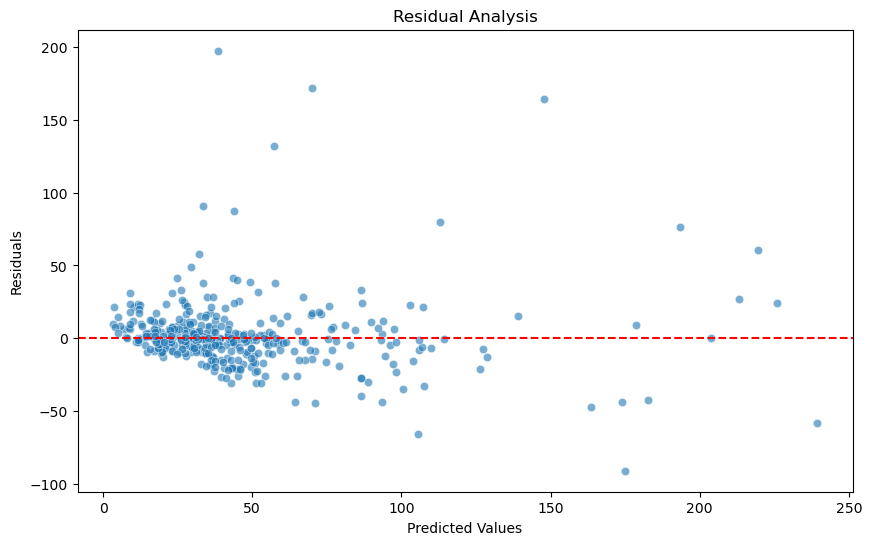

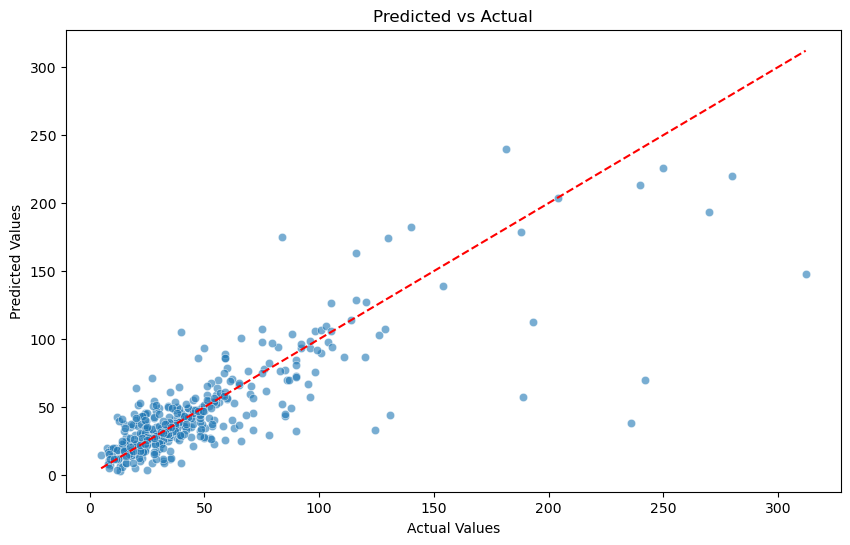

Model training and evaluation complete.


In [35]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import early_stopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm  # Progress bar

# ========================
# 1. Load and Prepare Data
# ========================

df = pd.read_csv("final Data All Exipients.csv")
df.columns = df.columns.str.replace(' ', '_')  # Standardize column names

# Define features and target
X = df.drop(columns=['DISINTEGRATION_TIME'])
y = df['DISINTEGRATION_TIME']

# Split dataset with stratification to preserve target distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=pd.qcut(y, q=5)
)

# =======================================
# 2. Feature Selection Using LightGBM
# =======================================

print("Selecting Important Features...")
importance_model = lgb.LGBMRegressor()
importance_model.fit(X_train, y_train)

# Extract feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Select important features based on threshold
important_features = feature_importance_df[feature_importance_df['Importance'] > 5]['Feature'].tolist()
X_train, X_test = X_train[important_features], X_test[important_features]

# Feature Importance Plot
plt.figure(figsize=(10, 6))
lgb.plot_importance(importance_model, max_num_features=15, importance_type='gain')
plt.title('Feature Importance (Gain-based)')
plt.show()

# =======================================
# 3. Feature Engineering: Interaction Terms
# =======================================

def create_interaction_features(X_df, top_features):
    """Generate interaction features using the most important variables."""
    X_enhanced = X_df.copy()
    for i in range(len(top_features)):
        for j in range(i + 1, len(top_features)):
            X_enhanced[f'{top_features[i]}_x_{top_features[j]}'] = (
                X_df[top_features[i]] * X_df[top_features[j]]
            )
    return X_enhanced

# Select top 5 features for interaction
top_features = feature_importance_df.head(5)['Feature'].tolist()
X_train = create_interaction_features(X_train, top_features)
X_test = create_interaction_features(X_test, top_features)

# =======================================
# 4. Hyperparameter Optimization with Optuna
# =======================================

print("Optimizing Hyperparameters...")

def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 31, 511),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 10.0, log=True)
    }
    model = lgb.LGBMRegressor(**params)
    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='rmse',
        callbacks=[early_stopping(stopping_rounds=100)]
    )
    val_preds = model.predict(X_test, num_iteration=model.best_iteration_)
    return mean_squared_error(y_test, val_preds, squared=False)

study = optuna.create_study(direction='minimize')
for _ in tqdm(range(100), desc="Hyperparameter Tuning Progress"):
    study.optimize(objective, n_trials=1)

best_params = study.best_params

# =======================================
# 5. Final Model Training & Evaluation
# =======================================

print("Training Final Model...")
final_model = lgb.LGBMRegressor(**best_params)
final_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='rmse',
    callbacks=[early_stopping(stopping_rounds=100)]
)

# Predictions & Evaluation
preds = final_model.predict(X_test, num_iteration=final_model.best_iteration_)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)
print(f"Final Model - RMSE: {rmse:.4f}, R²: {r2:.4f}")

# ================================
# 6. Performance Visualization
# ================================

# Residual Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x=preds, y=y_test - preds, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

# Predicted vs Actual Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual')
plt.show()

print("Model training and evaluation complete.")


Loading dataset...
Selecting Important Features...


<Figure size 1000x600 with 0 Axes>

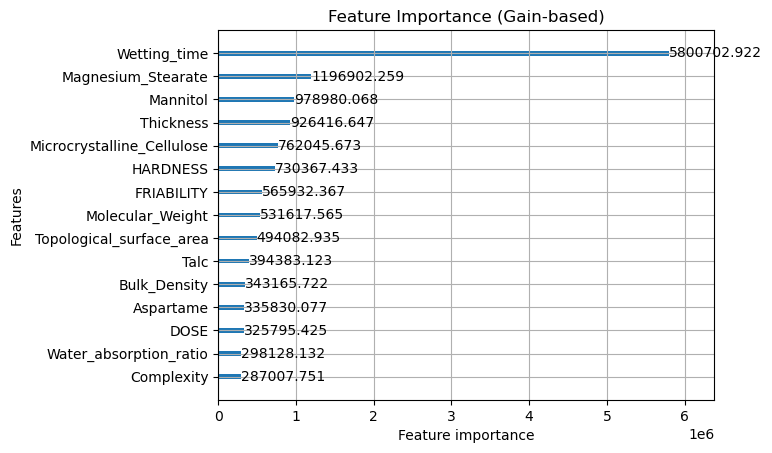

[I 2025-02-02 23:06:35,329] A new study created in memory with name: no-name-9959756c-9fca-469d-8ec6-401fa748108a


Optimizing Hyperparameters...


Hyperparameter Tuning Progress:   0%|          | 0/50 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:06:36,049] Trial 0 finished with value: 28.321164386091223 and parameters: {'n_estimators': 960, 'learning_rate': 0.03535585024885911, 'num_leaves': 149, 'max_depth': 3, 'min_child_samples': 20, 'subsample': 0.9193284894507008, 'colsample_bytree': 0.9947150057801931, 'reg_alpha': 1.0225886311466999e-07, 'reg_lambda': 0.007155191418224536}. Best is trial 0 with value: 28.321164386091223.
Hyperparameter Tuning Progress:   2%|▏         | 1/50 [00:00<00:35,  1.39it/s]

Did not meet early stopping. Best iteration is:
[960]	valid_0's rmse: 28.3212
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:06:36,919] Trial 1 finished with value: 27.066125990743927 and parameters: {'n_estimators': 1182, 'learning_rate': 0.0706702841542966, 'num_leaves': 129, 'max_depth': 5, 'min_child_samples': 38, 'subsample': 0.699230902719616, 'colsample_bytree': 0.7562698831140207, 'reg_alpha': 2.5711827560131223e-09, 'reg_lambda': 0.008513311507621581}. Best is trial 1 with value: 27.066125990743927.
Hyperparameter Tuning Progress:   4%|▍         | 2/50 [00:01<00:38,  1.24it/s]

Early stopping, best iteration is:
[619]	valid_0's rmse: 27.0661
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:06:38,575] Trial 2 finished with value: 30.831059415011406 and parameters: {'n_estimators': 710, 'learning_rate': 0.01413105119566113, 'num_leaves': 461, 'max_depth': 9, 'min_child_samples': 82, 'subsample': 0.8032313446512684, 'colsample_bytree': 0.9717342735192446, 'reg_alpha': 1.90876990196996e-05, 'reg_lambda': 2.5411538595243637}. Best is trial 1 with value: 27.066125990743927.
Hyperparameter Tuning Progress:   6%|▌         | 3/50 [00:03<00:56,  1.19s/it]

Did not meet early stopping. Best iteration is:
[710]	valid_0's rmse: 30.8311
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:06:41,313] Trial 3 finished with value: 29.359232783825906 and parameters: {'n_estimators': 913, 'learning_rate': 0.009588334748603268, 'num_leaves': 150, 'max_depth': 11, 'min_child_samples': 42, 'subsample': 0.6553823590994026, 'colsample_bytree': 0.9347053205752771, 'reg_alpha': 0.0210592081215196, 'reg_lambda': 9.982389368369132}. Best is trial 1 with value: 27.066125990743927.
Hyperparameter Tuning Progress:   8%|▊         | 4/50 [00:05<01:22,  1.80s/it]

Did not meet early stopping. Best iteration is:
[910]	valid_0's rmse: 29.3592
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:06:42,142] Trial 4 finished with value: 30.239973218405304 and parameters: {'n_estimators': 1063, 'learning_rate': 0.014406220502102066, 'num_leaves': 223, 'max_depth': 3, 'min_child_samples': 33, 'subsample': 0.9486477997146971, 'colsample_bytree': 0.6453770903176518, 'reg_alpha': 0.0001082181881591442, 'reg_lambda': 3.041881550561895e-08}. Best is trial 1 with value: 27.066125990743927.
Hyperparameter Tuning Progress:  10%|█         | 5/50 [00:06<01:05,  1.45s/it]

Did not meet early stopping. Best iteration is:
[1063]	valid_0's rmse: 30.24
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:06:43,924] Trial 5 finished with value: 29.53944475604613 and parameters: {'n_estimators': 1425, 'learning_rate': 0.015189590137238291, 'num_leaves': 275, 'max_depth': 7, 'min_child_samples': 90, 'subsample': 0.9193865763243652, 'colsample_bytree': 0.8374596737842757, 'reg_alpha': 0.00013256253627181913, 'reg_lambda': 0.8646316514931438}. Best is trial 1 with value: 27.066125990743927.
Hyperparameter Tuning Progress:  12%|█▏        | 6/50 [00:08<01:08,  1.56s/it]

Did not meet early stopping. Best iteration is:
[1425]	valid_0's rmse: 29.5394
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:06:45,852] Trial 6 finished with value: 35.408447276283674 and parameters: {'n_estimators': 574, 'learning_rate': 0.0013709974759309185, 'num_leaves': 175, 'max_depth': 12, 'min_child_samples': 41, 'subsample': 0.7785651162052143, 'colsample_bytree': 0.8611013395438272, 'reg_alpha': 0.00046266632635647264, 'reg_lambda': 6.1743034897435e-07}. Best is trial 1 with value: 27.066125990743927.
Hyperparameter Tuning Progress:  14%|█▍        | 7/50 [00:10<01:12,  1.68s/it]

Did not meet early stopping. Best iteration is:
[574]	valid_0's rmse: 35.4084
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1644]	valid_0's rmse: 28.6115


[I 2025-02-02 23:06:49,147] Trial 7 finished with value: 28.611480555067548 and parameters: {'n_estimators': 1646, 'learning_rate': 0.006346813249430538, 'num_leaves': 333, 'max_depth': 8, 'min_child_samples': 62, 'subsample': 0.6942679728169447, 'colsample_bytree': 0.6701662147954063, 'reg_alpha': 1.207297703488903e-09, 'reg_lambda': 0.17463710161722928}. Best is trial 1 with value: 27.066125990743927.
Hyperparameter Tuning Progress:  16%|█▌        | 8/50 [00:13<01:32,  2.20s/it]

Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:06:52,260] Trial 8 finished with value: 27.208693157271 and parameters: {'n_estimators': 1368, 'learning_rate': 0.019231870322826687, 'num_leaves': 87, 'max_depth': 10, 'min_child_samples': 61, 'subsample': 0.9426055815916567, 'colsample_bytree': 0.7799848466845629, 'reg_alpha': 7.489073610422425e-06, 'reg_lambda': 0.055663845574268116}. Best is trial 1 with value: 27.066125990743927.
Hyperparameter Tuning Progress:  18%|█▊        | 9/50 [00:16<01:41,  2.48s/it]

Did not meet early stopping. Best iteration is:
[1365]	valid_0's rmse: 27.2087
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1889]	valid_0's rmse: 29.1791


[I 2025-02-02 23:06:57,799] Trial 9 finished with value: 29.17913180003932 and parameters: {'n_estimators': 1889, 'learning_rate': 0.0020599604012551064, 'num_leaves': 109, 'max_depth': 12, 'min_child_samples': 29, 'subsample': 0.7600125875712878, 'colsample_bytree': 0.8523966088087115, 'reg_alpha': 0.005608715562939017, 'reg_lambda': 0.00703168187254763}. Best is trial 1 with value: 27.066125990743927.
Hyperparameter Tuning Progress:  20%|██        | 10/50 [00:22<02:17,  3.43s/it]

Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:06:59,038] Trial 10 finished with value: 27.534288092532183 and parameters: {'n_estimators': 1257, 'learning_rate': 0.09940133299587445, 'num_leaves': 388, 'max_depth': 6, 'min_child_samples': 17, 'subsample': 0.6056316984166543, 'colsample_bytree': 0.7447116131913443, 'reg_alpha': 2.3596056839410857, 'reg_lambda': 5.605499440035684e-05}. Best is trial 1 with value: 27.066125990743927.
Hyperparameter Tuning Progress:  22%|██▏       | 11/50 [00:23<01:47,  2.76s/it]

Early stopping, best iteration is:
[390]	valid_0's rmse: 27.5343
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:07:00,169] Trial 11 finished with value: 26.932910451269446 and parameters: {'n_estimators': 1469, 'learning_rate': 0.08226889010826614, 'num_leaves': 48, 'max_depth': 6, 'min_child_samples': 63, 'subsample': 0.8369158270831031, 'colsample_bytree': 0.7539399248596718, 'reg_alpha': 1.6420291500300714e-07, 'reg_lambda': 0.0005945153872302416}. Best is trial 11 with value: 26.932910451269446.
Hyperparameter Tuning Progress:  24%|██▍       | 12/50 [00:24<01:25,  2.26s/it]

Early stopping, best iteration is:
[693]	valid_0's rmse: 26.9329
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:07:01,095] Trial 12 finished with value: 27.985226095699808 and parameters: {'n_estimators': 1602, 'learning_rate': 0.09309310841805422, 'num_leaves': 32, 'max_depth': 5, 'min_child_samples': 70, 'subsample': 0.848249667714198, 'colsample_bytree': 0.7086316355345733, 'reg_alpha': 3.18985790370679e-09, 'reg_lambda': 8.673981967438338e-05}. Best is trial 11 with value: 26.932910451269446.
Hyperparameter Tuning Progress:  26%|██▌       | 13/50 [00:25<01:08,  1.86s/it]

Early stopping, best iteration is:
[764]	valid_0's rmse: 27.9852
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:07:03,367] Trial 13 finished with value: 26.744674508261937 and parameters: {'n_estimators': 1634, 'learning_rate': 0.04058336517934796, 'num_leaves': 47, 'max_depth': 5, 'min_child_samples': 44, 'subsample': 0.7169726126985292, 'colsample_bytree': 0.6120357749337139, 'reg_alpha': 1.7310500358716588e-07, 'reg_lambda': 0.0008397733203769794}. Best is trial 13 with value: 26.744674508261937.
Hyperparameter Tuning Progress:  28%|██▊       | 14/50 [00:28<01:11,  1.98s/it]

Did not meet early stopping. Best iteration is:
[1548]	valid_0's rmse: 26.7447
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:07:04,879] Trial 14 finished with value: 26.58963003833923 and parameters: {'n_estimators': 1964, 'learning_rate': 0.036097499839030656, 'num_leaves': 31, 'max_depth': 5, 'min_child_samples': 50, 'subsample': 0.8205435419639046, 'colsample_bytree': 0.6102754301899632, 'reg_alpha': 4.749290473110579e-07, 'reg_lambda': 4.379335213216332e-06}. Best is trial 14 with value: 26.58963003833923.
Hyperparameter Tuning Progress:  30%|███       | 15/50 [00:29<01:04,  1.84s/it]

Early stopping, best iteration is:
[1244]	valid_0's rmse: 26.5896
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:07:06,700] Trial 15 finished with value: 26.603875470337915 and parameters: {'n_estimators': 1936, 'learning_rate': 0.03626842479316733, 'num_leaves': 236, 'max_depth': 5, 'min_child_samples': 50, 'subsample': 0.7248291903605455, 'colsample_bytree': 0.6029462160435893, 'reg_alpha': 2.1028534824887342e-07, 'reg_lambda': 1.9270998384933783e-06}. Best is trial 14 with value: 26.58963003833923.
Hyperparameter Tuning Progress:  32%|███▏      | 16/50 [00:31<01:02,  1.84s/it]

Early stopping, best iteration is:
[1283]	valid_0's rmse: 26.6039
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:07:08,113] Trial 16 finished with value: 27.166706577163353 and parameters: {'n_estimators': 1922, 'learning_rate': 0.035379575478522426, 'num_leaves': 502, 'max_depth': 4, 'min_child_samples': 51, 'subsample': 0.8656338860439203, 'colsample_bytree': 0.6004575392314294, 'reg_alpha': 2.0451907034610906e-06, 'reg_lambda': 2.36566289931767e-06}. Best is trial 14 with value: 26.58963003833923.
Hyperparameter Tuning Progress:  34%|███▍      | 17/50 [00:32<00:56,  1.71s/it]

Early stopping, best iteration is:
[1646]	valid_0's rmse: 27.1667
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:07:10,288] Trial 17 finished with value: 31.088322412513197 and parameters: {'n_estimators': 1765, 'learning_rate': 0.004898760689058912, 'num_leaves': 240, 'max_depth': 7, 'min_child_samples': 75, 'subsample': 0.990794933854614, 'colsample_bytree': 0.6720319976042931, 'reg_alpha': 3.501317398084393e-08, 'reg_lambda': 3.1838020901455475e-09}. Best is trial 14 with value: 26.58963003833923.
Hyperparameter Tuning Progress:  36%|███▌      | 18/50 [00:34<00:59,  1.85s/it]

Did not meet early stopping. Best iteration is:
[1764]	valid_0's rmse: 31.0883
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:07:11,888] Trial 18 finished with value: 27.171885266282967 and parameters: {'n_estimators': 1808, 'learning_rate': 0.025670050462937345, 'num_leaves': 335, 'max_depth': 4, 'min_child_samples': 53, 'subsample': 0.7377676657848865, 'colsample_bytree': 0.7006647572354476, 'reg_alpha': 1.2736481591890684e-06, 'reg_lambda': 2.6621744128974463e-06}. Best is trial 14 with value: 26.58963003833923.
Hyperparameter Tuning Progress:  38%|███▊      | 19/50 [00:36<00:54,  1.77s/it]

Did not meet early stopping. Best iteration is:
[1801]	valid_0's rmse: 27.1719
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:07:13,158] Trial 19 finished with value: 26.065797674782534 and parameters: {'n_estimators': 1992, 'learning_rate': 0.05045381516395086, 'num_leaves': 411, 'max_depth': 8, 'min_child_samples': 24, 'subsample': 0.6515828354137206, 'colsample_bytree': 0.6386825416886122, 'reg_alpha': 3.6522550979845825e-08, 'reg_lambda': 1.4962154461476042e-07}. Best is trial 19 with value: 26.065797674782534.
Hyperparameter Tuning Progress:  40%|████      | 20/50 [00:37<00:48,  1.62s/it]

Early stopping, best iteration is:
[649]	valid_0's rmse: 26.0658
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:07:14,355] Trial 20 finished with value: 26.69569957653927 and parameters: {'n_estimators': 1985, 'learning_rate': 0.05450152448113663, 'num_leaves': 418, 'max_depth': 8, 'min_child_samples': 10, 'subsample': 0.630352861762661, 'colsample_bytree': 0.6441198981661922, 'reg_alpha': 8.53495117232865e-09, 'reg_lambda': 9.332743657668905e-08}. Best is trial 19 with value: 26.065797674782534.
Hyperparameter Tuning Progress:  42%|████▏     | 21/50 [00:39<00:43,  1.49s/it]

Early stopping, best iteration is:
[402]	valid_0's rmse: 26.6957
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:07:15,621] Trial 21 finished with value: 26.330293446625515 and parameters: {'n_estimators': 1978, 'learning_rate': 0.050382997522927006, 'num_leaves': 308, 'max_depth': 9, 'min_child_samples': 27, 'subsample': 0.6595518381107272, 'colsample_bytree': 0.629520458860977, 'reg_alpha': 7.013124687562516e-07, 'reg_lambda': 9.313277473579156e-06}. Best is trial 19 with value: 26.065797674782534.
Hyperparameter Tuning Progress:  44%|████▍     | 22/50 [00:40<00:39,  1.43s/it]

Early stopping, best iteration is:
[615]	valid_0's rmse: 26.3303
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1659]	valid_0's rmse: 26.2194


[I 2025-02-02 23:07:18,843] Trial 22 finished with value: 26.219449512019533 and parameters: {'n_estimators': 1756, 'learning_rate': 0.02574993724246457, 'num_leaves': 324, 'max_depth': 9, 'min_child_samples': 28, 'subsample': 0.6586236054119067, 'colsample_bytree': 0.645726278532206, 'reg_alpha': 1.3883764666214578e-06, 'reg_lambda': 2.73370030065715e-05}. Best is trial 19 with value: 26.065797674782534.
Hyperparameter Tuning Progress:  46%|████▌     | 23/50 [00:43<00:53,  1.96s/it]

Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:07:20,391] Trial 23 finished with value: 26.844324535886365 and parameters: {'n_estimators': 1783, 'learning_rate': 0.06180824860742926, 'num_leaves': 320, 'max_depth': 9, 'min_child_samples': 25, 'subsample': 0.6634128913750391, 'colsample_bytree': 0.7150519597459524, 'reg_alpha': 1.934961515414783e-08, 'reg_lambda': 3.1978449184439614e-05}. Best is trial 19 with value: 26.065797674782534.
Hyperparameter Tuning Progress:  48%|████▊     | 24/50 [00:45<00:47,  1.84s/it]

Early stopping, best iteration is:
[616]	valid_0's rmse: 26.8443
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:07:22,394] Trial 24 finished with value: 26.054051355402063 and parameters: {'n_estimators': 1767, 'learning_rate': 0.052085491795249864, 'num_leaves': 387, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.6551373098228225, 'colsample_bytree': 0.6493219810665644, 'reg_alpha': 1.0446618924196504e-05, 'reg_lambda': 1.0185126537854748e-07}. Best is trial 24 with value: 26.054051355402063.
Hyperparameter Tuning Progress:  50%|█████     | 25/50 [00:47<00:47,  1.89s/it]

Early stopping, best iteration is:
[673]	valid_0's rmse: 26.0541
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:07:24,412] Trial 25 finished with value: 26.287069878665935 and parameters: {'n_estimators': 1548, 'learning_rate': 0.023322980319510474, 'num_leaves': 390, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.6008071877049376, 'colsample_bytree': 0.6760198606795527, 'reg_alpha': 9.053715334834244e-06, 'reg_lambda': 3.606586761629621e-09}. Best is trial 24 with value: 26.054051355402063.
Hyperparameter Tuning Progress:  52%|█████▏    | 26/50 [00:49<00:46,  1.93s/it]

Early stopping, best iteration is:
[783]	valid_0's rmse: 26.2871
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:07:27,097] Trial 26 finished with value: 26.022683528545066 and parameters: {'n_estimators': 1739, 'learning_rate': 0.025575649042764, 'num_leaves': 374, 'max_depth': 11, 'min_child_samples': 19, 'subsample': 0.6819447657587204, 'colsample_bytree': 0.8050581807069792, 'reg_alpha': 0.0011720027558851525, 'reg_lambda': 2.162667055737134e-07}. Best is trial 26 with value: 26.022683528545066.
Hyperparameter Tuning Progress:  54%|█████▍    | 27/50 [00:51<00:49,  2.15s/it]

Early stopping, best iteration is:
[1118]	valid_0's rmse: 26.0227
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1827]	valid_0's rmse: 26.8103


[I 2025-02-02 23:07:32,072] Trial 27 finished with value: 26.810250669216764 and parameters: {'n_estimators': 1832, 'learning_rate': 0.00930121715403001, 'num_leaves': 432, 'max_depth': 11, 'min_child_samples': 19, 'subsample': 0.6331733783310151, 'colsample_bytree': 0.8969513893213097, 'reg_alpha': 0.0022257982788836065, 'reg_lambda': 9.803171276771337e-08}. Best is trial 26 with value: 26.022683528545066.
Hyperparameter Tuning Progress:  56%|█████▌    | 28/50 [00:56<01:06,  3.00s/it]

Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:07:34,926] Trial 28 finished with value: 26.637454836386855 and parameters: {'n_estimators': 1684, 'learning_rate': 0.05280178686709121, 'num_leaves': 372, 'max_depth': 11, 'min_child_samples': 10, 'subsample': 0.6912729280909946, 'colsample_bytree': 0.7948431716520731, 'reg_alpha': 0.08991040511923334, 'reg_lambda': 1.5176549364776518e-08}. Best is trial 26 with value: 26.022683528545066.
Hyperparameter Tuning Progress:  58%|█████▊    | 29/50 [00:59<01:02,  2.96s/it]

Early stopping, best iteration is:
[869]	valid_0's rmse: 26.6375
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:07:37,019] Trial 29 finished with value: 26.299002013341873 and parameters: {'n_estimators': 1528, 'learning_rate': 0.02738001647451953, 'num_leaves': 488, 'max_depth': 10, 'min_child_samples': 23, 'subsample': 0.6296092901580739, 'colsample_bytree': 0.8210215140894082, 'reg_alpha': 0.44830434254007484, 'reg_lambda': 2.8234237671988156e-07}. Best is trial 26 with value: 26.022683528545066.
Hyperparameter Tuning Progress:  60%|██████    | 30/50 [01:01<00:53,  2.70s/it]

Early stopping, best iteration is:
[798]	valid_0's rmse: 26.299
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1694]	valid_0's rmse: 26.1645


[I 2025-02-02 23:07:40,254] Trial 30 finished with value: 26.164515642291928 and parameters: {'n_estimators': 1698, 'learning_rate': 0.018165407685304565, 'num_leaves': 433, 'max_depth': 10, 'min_child_samples': 34, 'subsample': 0.7520982421993322, 'colsample_bytree': 0.7315861278043254, 'reg_alpha': 0.0005171270426827282, 'reg_lambda': 9.893615971602196e-09}. Best is trial 26 with value: 26.022683528545066.
Hyperparameter Tuning Progress:  62%|██████▏   | 31/50 [01:04<00:54,  2.86s/it]

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1721]	valid_0's rmse: 25.8128


[I 2025-02-02 23:07:44,229] Trial 31 finished with value: 25.812848824292363 and parameters: {'n_estimators': 1723, 'learning_rate': 0.018286690166240224, 'num_leaves': 439, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.7535569370038494, 'colsample_bytree': 0.7282450865104602, 'reg_alpha': 0.001170080138938558, 'reg_lambda': 1.2261101407700753e-08}. Best is trial 31 with value: 25.812848824292363.
Hyperparameter Tuning Progress:  64%|██████▍   | 32/50 [01:08<00:57,  3.19s/it]

Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:07:46,076] Trial 32 finished with value: 26.41267463265173 and parameters: {'n_estimators': 1863, 'learning_rate': 0.046209573453671306, 'num_leaves': 466, 'max_depth': 11, 'min_child_samples': 14, 'subsample': 0.6725021223462256, 'colsample_bytree': 0.7775367550472698, 'reg_alpha': 0.0023549519202246114, 'reg_lambda': 6.840519832191286e-08}. Best is trial 31 with value: 25.812848824292363.
Hyperparameter Tuning Progress:  66%|██████▌   | 33/50 [01:10<00:47,  2.79s/it]

Early stopping, best iteration is:
[454]	valid_0's rmse: 26.4127
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:07:47,680] Trial 33 finished with value: 26.083485881185773 and parameters: {'n_estimators': 1279, 'learning_rate': 0.07009759276805579, 'num_leaves': 360, 'max_depth': 12, 'min_child_samples': 19, 'subsample': 0.705975510259985, 'colsample_bytree': 0.6913822749531807, 'reg_alpha': 2.4118103776229247e-05, 'reg_lambda': 1.0818838714533533e-09}. Best is trial 31 with value: 25.812848824292363.
Hyperparameter Tuning Progress:  68%|██████▊   | 34/50 [01:12<00:38,  2.43s/it]

Early stopping, best iteration is:
[587]	valid_0's rmse: 26.0835
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1732]	valid_0's rmse: 26.6775


[I 2025-02-02 23:07:50,912] Trial 34 finished with value: 26.67749227881247 and parameters: {'n_estimators': 1735, 'learning_rate': 0.010949550762979788, 'num_leaves': 406, 'max_depth': 8, 'min_child_samples': 22, 'subsample': 0.7833679270839939, 'colsample_bytree': 0.8116503743730339, 'reg_alpha': 0.032941597770121164, 'reg_lambda': 2.864469863839982e-07}. Best is trial 31 with value: 25.812848824292363.
Hyperparameter Tuning Progress:  70%|███████   | 35/50 [01:15<00:40,  2.67s/it]

Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:07:52,722] Trial 35 finished with value: 27.20169145463773 and parameters: {'n_estimators': 893, 'learning_rate': 0.02082685945937707, 'num_leaves': 465, 'max_depth': 10, 'min_child_samples': 31, 'subsample': 0.6817253086065207, 'colsample_bytree': 0.7248329173237954, 'reg_alpha': 0.0006639801440404428, 'reg_lambda': 2.8923451757534326e-08}. Best is trial 31 with value: 25.812848824292363.
Hyperparameter Tuning Progress:  72%|███████▏  | 36/50 [01:17<00:33,  2.41s/it]

Did not meet early stopping. Best iteration is:
[885]	valid_0's rmse: 27.2017
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:07:54,734] Trial 36 finished with value: 26.26512917323028 and parameters: {'n_estimators': 1052, 'learning_rate': 0.03185467455912979, 'num_leaves': 278, 'max_depth': 11, 'min_child_samples': 38, 'subsample': 0.6339539664347343, 'colsample_bytree': 0.7691433433813012, 'reg_alpha': 7.89493795097653e-05, 'reg_lambda': 6.396954561627517e-07}. Best is trial 31 with value: 25.812848824292363.
Hyperparameter Tuning Progress:  74%|███████▍  | 37/50 [01:19<00:29,  2.29s/it]

Did not meet early stopping. Best iteration is:
[1033]	valid_0's rmse: 26.2651
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:07:56,591] Trial 37 finished with value: 30.954793635625972 and parameters: {'n_estimators': 1545, 'learning_rate': 0.00623401952561781, 'num_leaves': 358, 'max_depth': 9, 'min_child_samples': 98, 'subsample': 0.7215570936946942, 'colsample_bytree': 0.8989427180840541, 'reg_alpha': 5.027382735185704e-05, 'reg_lambda': 6.3873285720874305e-09}. Best is trial 31 with value: 25.812848824292363.
Hyperparameter Tuning Progress:  76%|███████▌  | 38/50 [01:21<00:25,  2.16s/it]

Did not meet early stopping. Best iteration is:
[1545]	valid_0's rmse: 30.9548
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1862]	valid_0's rmse: 26.7068


[I 2025-02-02 23:07:59,433] Trial 38 finished with value: 26.706772451294327 and parameters: {'n_estimators': 1864, 'learning_rate': 0.012650262397278867, 'num_leaves': 445, 'max_depth': 7, 'min_child_samples': 16, 'subsample': 0.7512332342000614, 'colsample_bytree': 0.6589476021273691, 'reg_alpha': 0.00814337074013643, 'reg_lambda': 1.0849110251470264e-09}. Best is trial 31 with value: 25.812848824292363.
Hyperparameter Tuning Progress:  78%|███████▊  | 39/50 [01:24<00:26,  2.37s/it]

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1407]	valid_0's rmse: 26.3489


[I 2025-02-02 23:08:02,485] Trial 39 finished with value: 26.348898677895306 and parameters: {'n_estimators': 1415, 'learning_rate': 0.017234391759463986, 'num_leaves': 482, 'max_depth': 12, 'min_child_samples': 34, 'subsample': 0.7879786262977034, 'colsample_bytree': 0.6883298970526994, 'reg_alpha': 0.00021099797526406388, 'reg_lambda': 5.613899257521817e-07}. Best is trial 31 with value: 25.812848824292363.
Hyperparameter Tuning Progress:  80%|████████  | 40/50 [01:27<00:25,  2.57s/it]

Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:08:03,544] Trial 40 finished with value: 26.75689524375825 and parameters: {'n_estimators': 770, 'learning_rate': 0.06912389362250859, 'num_leaves': 404, 'max_depth': 8, 'min_child_samples': 22, 'subsample': 0.6978710683461704, 'colsample_bytree': 0.7428900312826797, 'reg_alpha': 5.955816212232504e-06, 'reg_lambda': 3.633517801506821e-08}. Best is trial 31 with value: 25.812848824292363.
Hyperparameter Tuning Progress:  82%|████████▏ | 41/50 [01:28<00:19,  2.12s/it]

Early stopping, best iteration is:
[464]	valid_0's rmse: 26.7569
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:08:05,537] Trial 41 finished with value: 25.596295872097553 and parameters: {'n_estimators': 1226, 'learning_rate': 0.07233830970640726, 'num_leaves': 377, 'max_depth': 12, 'min_child_samples': 19, 'subsample': 0.7097847654483845, 'colsample_bytree': 0.6896595582354234, 'reg_alpha': 5.056539417117881e-05, 'reg_lambda': 1.486038731936523e-09}. Best is trial 41 with value: 25.596295872097553.
Hyperparameter Tuning Progress:  84%|████████▍ | 42/50 [01:30<00:16,  2.08s/it]

Early stopping, best iteration is:
[729]	valid_0's rmse: 25.5963
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:08:07,250] Trial 42 finished with value: 26.564111788931577 and parameters: {'n_estimators': 1147, 'learning_rate': 0.04380280807393224, 'num_leaves': 294, 'max_depth': 12, 'min_child_samples': 13, 'subsample': 0.645720908021697, 'colsample_bytree': 0.6274121805517906, 'reg_alpha': 0.0018272236347297683, 'reg_lambda': 3.202262742289358e-09}. Best is trial 41 with value: 25.596295872097553.
Hyperparameter Tuning Progress:  86%|████████▌ | 43/50 [01:31<00:13,  1.97s/it]

Early stopping, best iteration is:
[465]	valid_0's rmse: 26.5641
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:08:08,933] Trial 43 finished with value: 26.16169845678213 and parameters: {'n_estimators': 1162, 'learning_rate': 0.07660884819031531, 'num_leaves': 353, 'max_depth': 11, 'min_child_samples': 18, 'subsample': 0.6791488316991933, 'colsample_bytree': 0.6642972469870739, 'reg_alpha': 0.00020516509403529324, 'reg_lambda': 1.600665970526986e-08}. Best is trial 41 with value: 25.596295872097553.
Hyperparameter Tuning Progress:  88%|████████▊ | 44/50 [01:33<00:11,  1.88s/it]

Early stopping, best iteration is:
[539]	valid_0's rmse: 26.1617
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:08:11,284] Trial 44 finished with value: 25.888586926694998 and parameters: {'n_estimators': 1332, 'learning_rate': 0.03102441934870525, 'num_leaves': 380, 'max_depth': 10, 'min_child_samples': 26, 'subsample': 0.7614823045784038, 'colsample_bytree': 0.6371147041370755, 'reg_alpha': 0.046785100256071785, 'reg_lambda': 2.2293506121067505e-07}. Best is trial 41 with value: 25.596295872097553.
Hyperparameter Tuning Progress:  90%|█████████ | 45/50 [01:35<00:10,  2.02s/it]

Early stopping, best iteration is:
[1077]	valid_0's rmse: 25.8886
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:08:13,907] Trial 45 finished with value: 26.511549354153725 and parameters: {'n_estimators': 1381, 'learning_rate': 0.02857674886278175, 'num_leaves': 376, 'max_depth': 10, 'min_child_samples': 39, 'subsample': 0.7634362276732004, 'colsample_bytree': 0.837164763490966, 'reg_alpha': 0.08767079128553518, 'reg_lambda': 4.043726875945655e-08}. Best is trial 41 with value: 25.596295872097553.
Hyperparameter Tuning Progress:  92%|█████████▏| 46/50 [01:38<00:08,  2.20s/it]

Early stopping, best iteration is:
[1273]	valid_0's rmse: 26.5115
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1333]	valid_0's rmse: 26.5823


[I 2025-02-02 23:08:17,325] Trial 46 finished with value: 26.582332488088724 and parameters: {'n_estimators': 1333, 'learning_rate': 0.01424118306852228, 'num_leaves': 197, 'max_depth': 11, 'min_child_samples': 30, 'subsample': 0.7364210835311208, 'colsample_bytree': 0.9577773794451567, 'reg_alpha': 1.2672029337264434, 'reg_lambda': 0.00044245430007484133}. Best is trial 41 with value: 25.596295872097553.
Hyperparameter Tuning Progress:  94%|█████████▍| 47/50 [01:41<00:07,  2.57s/it]

Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:08:19,931] Trial 47 finished with value: 28.878147216862605 and parameters: {'n_estimators': 1014, 'learning_rate': 0.008452960011448397, 'num_leaves': 450, 'max_depth': 12, 'min_child_samples': 44, 'subsample': 0.8086531416455502, 'colsample_bytree': 0.6877317031906542, 'reg_alpha': 0.01165767029351599, 'reg_lambda': 1.090749461830578e-06}. Best is trial 41 with value: 25.596295872097553.
Hyperparameter Tuning Progress:  96%|█████████▌| 48/50 [01:44<00:05,  2.58s/it]

Did not meet early stopping. Best iteration is:
[1014]	valid_0's rmse: 28.8781
Training until validation scores don't improve for 100 rounds


[I 2025-02-02 23:08:21,676] Trial 48 finished with value: 26.783977441613004 and parameters: {'n_estimators': 502, 'learning_rate': 0.020231992747943305, 'num_leaves': 381, 'max_depth': 10, 'min_child_samples': 10, 'subsample': 0.7722863385363846, 'colsample_bytree': 0.7606886948098343, 'reg_alpha': 2.8961457766076455e-05, 'reg_lambda': 1.026524184164278e-05}. Best is trial 41 with value: 25.596295872097553.
Hyperparameter Tuning Progress:  98%|█████████▊| 49/50 [01:46<00:02,  2.33s/it]

Did not meet early stopping. Best iteration is:
[489]	valid_0's rmse: 26.784
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1473]	valid_0's rmse: 27.6413


[I 2025-02-02 23:08:27,430] Trial 49 finished with value: 27.641325448068628 and parameters: {'n_estimators': 1474, 'learning_rate': 0.0032311673215502834, 'num_leaves': 342, 'max_depth': 11, 'min_child_samples': 16, 'subsample': 0.8753066648676897, 'colsample_bytree': 0.7920104269125866, 'reg_alpha': 0.0502091617611108, 'reg_lambda': 2.503893569292596e-07}. Best is trial 41 with value: 25.596295872097553.
Hyperparameter Tuning Progress: 100%|██████████| 50/50 [01:52<00:00,  2.24s/it]


Training Final Model...
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[729]	valid_0's rmse: 25.5963	valid_0's l2: 655.17
Final Model - RMSE: 25.5963, R²: 0.6432


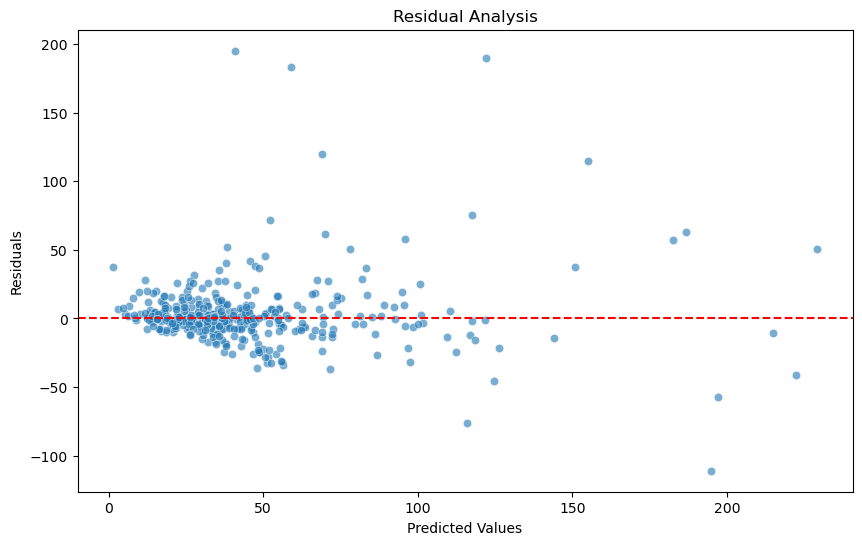

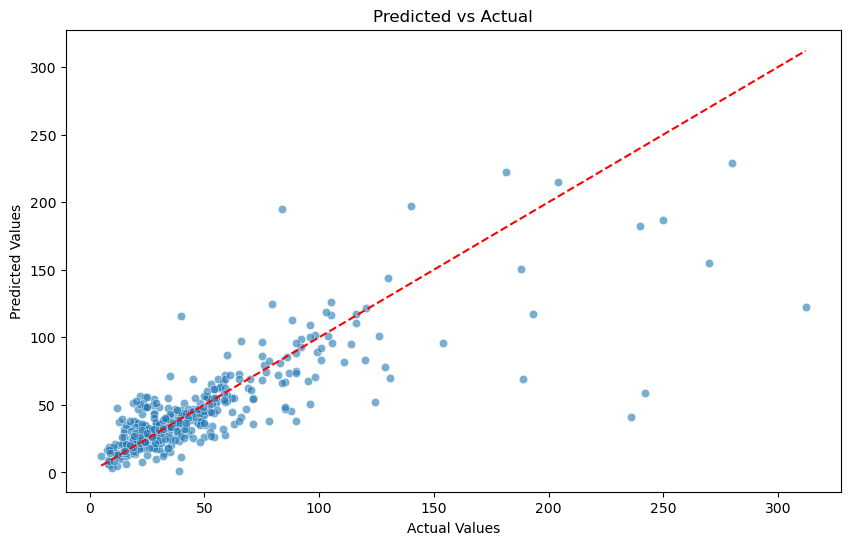

Model training and evaluation complete.


In [36]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import early_stopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm  # Progress bar

# ========================
# 1. Load and Prepare Data
# ========================

print("Loading dataset...")
df = pd.read_csv("final Data All Exipients.csv")
df.columns = df.columns.str.replace(' ', '_')  # Standardize column names

# Define features and target
X = df.drop(columns=['DISINTEGRATION_TIME'])
y = df['DISINTEGRATION_TIME']

# Split dataset with stratification to preserve target distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=pd.qcut(y, q=5)
)

# =======================================
# 2. Feature Selection Using LightGBM
# =======================================

print("Selecting Important Features...")
importance_model = lgb.LGBMRegressor()
importance_model.fit(X_train, y_train)

# Extract feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Select important features based on threshold
important_features = feature_importance_df[feature_importance_df['Importance'] > 5]['Feature'].tolist()
X_train, X_test = X_train[important_features], X_test[important_features]

# Feature Importance Plot
plt.figure(figsize=(10, 6))
lgb.plot_importance(importance_model, max_num_features=15, importance_type='gain')
plt.title('Feature Importance (Gain-based)')
plt.show()

# =======================================
# 3. Feature Engineering: Interaction Terms
# =======================================

def create_interaction_features(X_df, top_features):
    """Generate interaction features using the most important variables."""
    X_enhanced = X_df.copy()
    for i in range(len(top_features)):
        for j in range(i + 1, len(top_features)):
            X_enhanced[f'{top_features[i]}_x_{top_features[j]}'] = (
                X_df[top_features[i]] * X_df[top_features[j]]
            )
    return X_enhanced

# Select top 5 features for interaction
top_features = feature_importance_df.head(5)['Feature'].tolist()
X_train = create_interaction_features(X_train, top_features)
X_test = create_interaction_features(X_test, top_features)

# =======================================
# 4. Hyperparameter Optimization with Optuna
# =======================================

print("Optimizing Hyperparameters...")

def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 31, 511),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 10.0, log=True)
    }
    model = lgb.LGBMRegressor(**params)
    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='rmse',
        callbacks=[early_stopping(stopping_rounds=100)]
    )
    val_preds = model.predict(X_test, num_iteration=model.best_iteration_)
    return mean_squared_error(y_test, val_preds, squared=False)

study = optuna.create_study(direction='minimize')
for _ in tqdm(range(50), desc="Hyperparameter Tuning Progress"):
    study.optimize(objective, n_trials=1)

best_params = study.best_params

# =======================================
# 5. Final Model Training & Evaluation
# =======================================

print("Training Final Model...")
final_model = lgb.LGBMRegressor(**best_params)
final_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='rmse',
    callbacks=[early_stopping(stopping_rounds=100)]
)

# Predictions & Evaluation
preds = final_model.predict(X_test, num_iteration=final_model.best_iteration_)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)
print(f"Final Model - RMSE: {rmse:.4f}, R²: {r2:.4f}")

# ================================
# 6. Performance Visualization
# ================================

# Residual Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x=preds, y=y_test - preds, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

# Predicted vs Actual Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual')
plt.show()

print("Model training and evaluation complete.")


Selecting Important Features...


[I 2025-02-02 23:12:08,504] A new study created in memory with name: no-name-0e991b32-7bdd-498c-b70f-ffe183b7850a


Optimizing Hyperparameters...


Hyperparameter Tuning Progress: 100%|██████████| 30/30 [00:45<00:00,  1.53s/it]


Training Final Models...

Model Performance Comparison:
                Model       RMSE        MAE        R²
0  Optimized LightGBM  22.402461  12.155053  0.724298
1             XGBoost  25.455970  12.691817  0.644018
2      Stacking (Avg)  23.440106  12.129063  0.698166


<Figure size 1000x600 with 0 Axes>

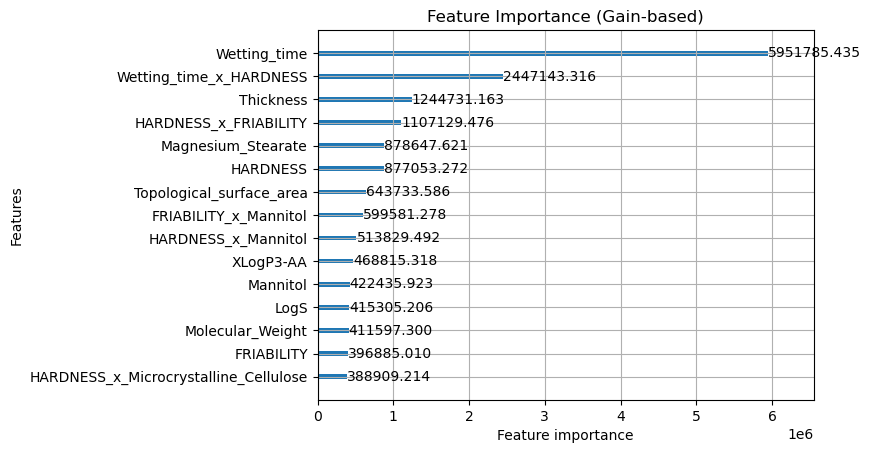

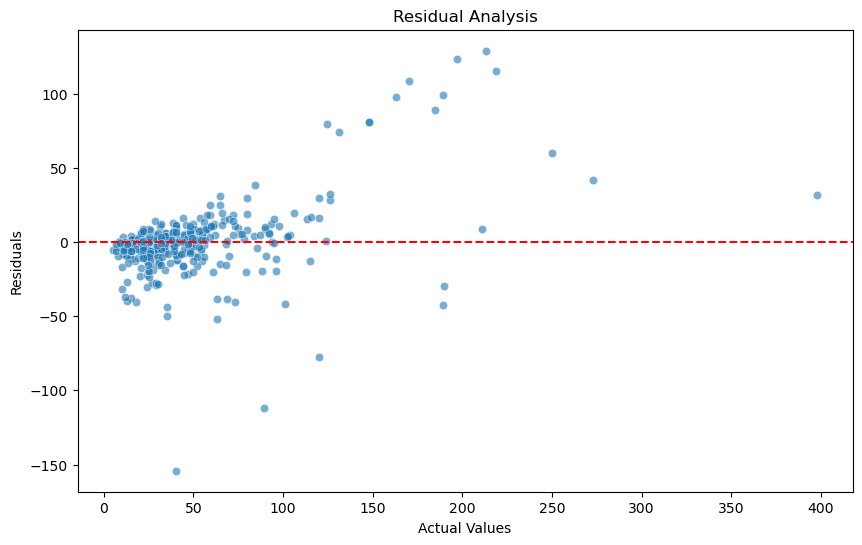

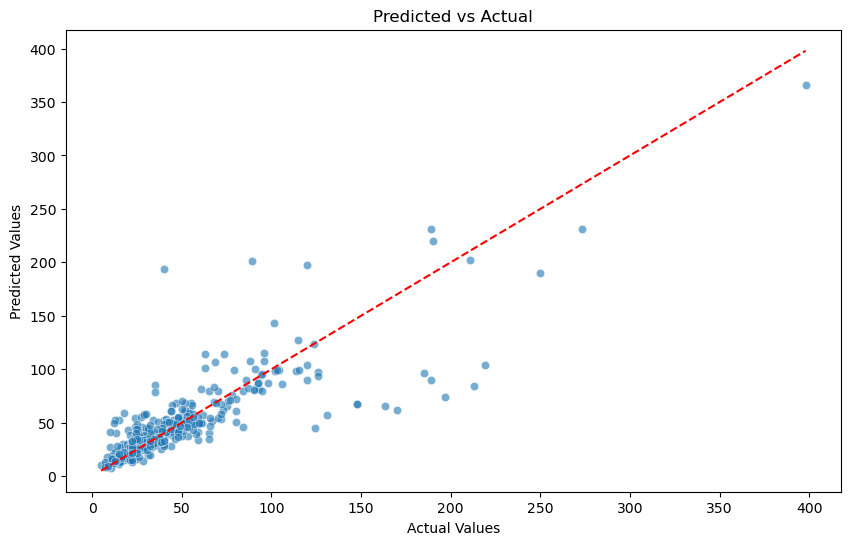

Model training and evaluation complete.


In [37]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tqdm import tqdm  # Progress bar

# ========================
# 1. Load and Prepare Data
# ========================

df = pd.read_csv("final Data All Exipients.csv")
df.columns = df.columns.str.replace(' ', '_')  # Standardize column names

# Define features and target
X = df.drop(columns=['DISINTEGRATION_TIME'])
y = df['DISINTEGRATION_TIME']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =======================================
# 2. Feature Selection Using LightGBM
# =======================================

print("Selecting Important Features...")
importance_model = lgb.LGBMRegressor()
importance_model.fit(X_train, y_train)

# Extract feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Select important features
important_features = feature_importance_df[feature_importance_df['Importance'] > 5]['Feature'].tolist()
X_train, X_test = X_train[important_features], X_test[important_features]

# =======================================
# 3. Feature Engineering: Interaction Terms
# =======================================

def create_interaction_features(X_df, top_features):
    X_enhanced = X_df.copy()
    for i in range(len(top_features)):
        for j in range(i + 1, len(top_features)):
            X_enhanced[f'{top_features[i]}_x_{top_features[j]}'] = (
                X_df[top_features[i]] * X_df[top_features[j]]
            )
    return X_enhanced

# Select top 5 features for interaction
top_features = feature_importance_df.head(5)['Feature'].tolist()
X_train = create_interaction_features(X_train, top_features)
X_test = create_interaction_features(X_test, top_features)

# =======================================
# 4. Hyperparameter Optimization with Optuna
# =======================================

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 31, 127),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 20),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 0.9),
        'subsample': trial.suggest_float('subsample', 0.7, 0.9),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 0.1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 0.1),
        'random_state': 42
    }
    model = lgb.LGBMRegressor(**params, verbose=-1)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_squared_error(y_test, preds, squared=False)

print("Optimizing Hyperparameters...")
study = optuna.create_study(direction='minimize')
for _ in tqdm(range(30), desc="Hyperparameter Tuning Progress"):
    study.optimize(objective, n_trials=1)

best_params = study.best_params

# =======================================
# 5. Train Final Models
# =======================================

print("Training Final Models...")

# LightGBM
lgbm_best = lgb.LGBMRegressor(**best_params, random_state=42)
lgbm_best.fit(X_train, y_train)
y_pred_lgbm = lgbm_best.predict(X_test)

# XGBoost
xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Stacked Model (Average Ensemble)
stacked_preds = (y_pred_lgbm + y_pred_xgb) / 2

# =======================================
# 6. Performance Evaluation
# =======================================

def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return [model_name, rmse, mae, r2]

results = []
results.append(evaluate_model(y_test, y_pred_lgbm, "Optimized LightGBM"))
results.append(evaluate_model(y_test, y_pred_xgb, "XGBoost"))
results.append(evaluate_model(y_test, stacked_preds, "Stacking (Avg)"))

# Print Results Table
print("\nModel Performance Comparison:")
print(pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R²"]))

# =======================================
# 7. Visualization
# =======================================

# Feature Importance Plot
plt.figure(figsize=(10, 6))
lgb.plot_importance(lgbm_best, max_num_features=15, importance_type='gain')
plt.title('Feature Importance (Gain-based)')
plt.show()

# Residual Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test - stacked_preds, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

# Predicted vs Actual Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=stacked_preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual')
plt.show()

print("Model training and evaluation complete.")
